In [ ]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.0                         
year           2023                        
month          04                          
day            21                          
svn rev        84292                       
language       R                           
version.string R version 4.3.0 (2023-04-21)
nickname       Already Tomorrow            

In [ ]:
install.packages('corrplot')
install.packages('ROCR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




In [ ]:
install.packages('skimr')
install.packages('smotefamily')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘FNN’, ‘dbscan’, ‘igraph’




In [ ]:
#Load Libraries
library(ggplot2)
library(readr)
library(data.table)
library(caret)
library(corrplot)
library(ROCR)
library(e1071)
library(skimr)
library(smotefamily)

Loading required package: lattice

corrplot 0.92 loaded



In [ ]:
cd1 = read.csv('/content/creditcard.csv')

In [ ]:
head(cd1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [ ]:
sprintf("Number of rows in dataset: %d", nrow(cd1)) 
sprintf("Number of attributes in dataset: %d", ncol(cd1))

[1] "Number of rows in dataset: 284807"

[1] "Number of attributes in dataset: 31"

In [ ]:
sprintf("Data types of attributes in the dataset:")
table(sapply(cd1, class))

[1] "Data types of attributes in the dataset:"


integer numeric 
      1      30 

In [ ]:
str(cd1)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [ ]:
summary(cd1)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139320   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

In [ ]:
sprintf("Target Class Distribution: 0: Non-Fraudulent, 1: Fraudulent")
table(cd1$Class)

[1] "Target Class Distribution: 0: Non-Fraudulent, 1: Fraudulent"


     0      1 
284315    492 

In [ ]:
sprintf("Percentage Target Class Distribution: 0: Non-Fraudulent, 1: Fraudulent")
table(cd1$Class) / nrow(cd1)

[1] "Percentage Target Class Distribution: 0: Non-Fraudulent, 1: Fraudulent"


          0           1 
0.998272514 0.001727486 

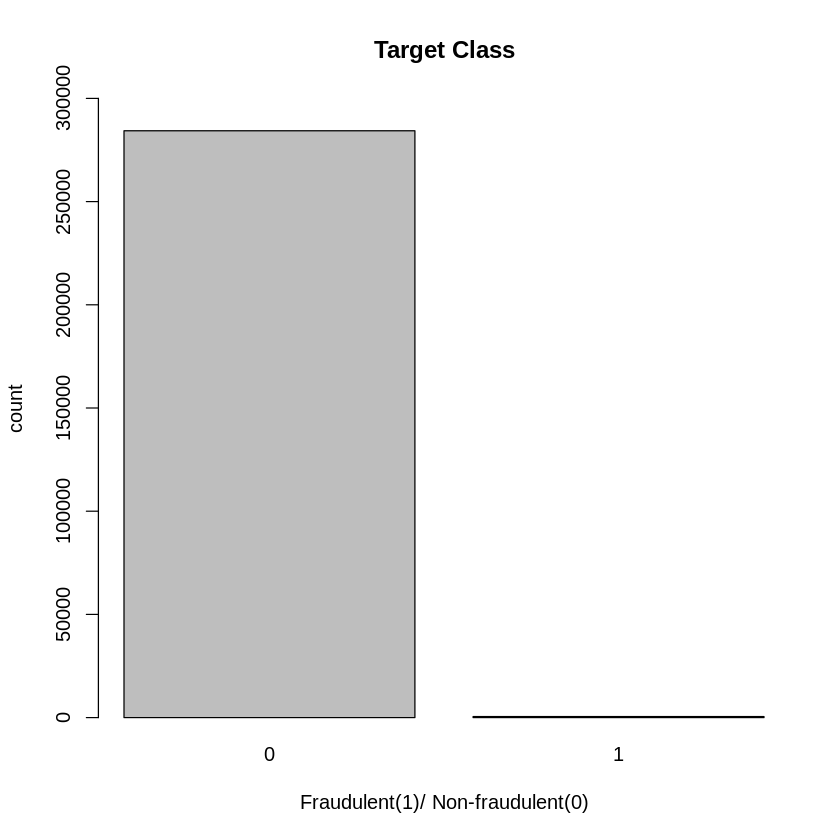

In [ ]:
# Simple Bar Plot
count <- table(cd1$Class)
barplot(count, main="Target Class",xlab="Fraudulent(1)/ Non-fraudulent(0)", ylab='count', ylim= c(0,300000))

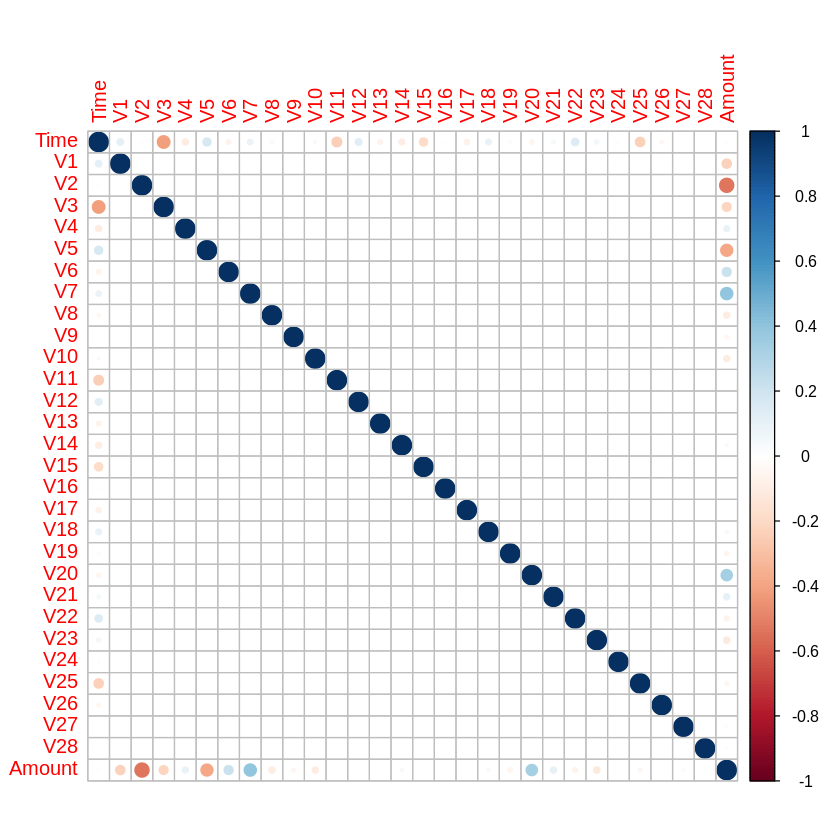

In [ ]:
#Using the corrplot package plot correlations between the predictors
corrplot(cor(cd1[,1:30]))

In [ ]:
#5-number summary of each feature
sapply(cd1[c('Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13')], fivenum)
sapply(cd1[c('V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26')], fivenum)
sapply(cd1[c('V27','V28','Amount')], fivenum)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0.0,-56.4075096,-72.71572756,-48.3255894,-5.68317120,-113.74330671,-26.1605059,-43.55724157,-73.21671846,-13.43406632,-24.58826244,-4.79747346,-18.6837146,-5.79188121
54201.5,-0.9203734,-0.59854991,-0.8903648,-0.84864012,-0.69159707,-0.7682956,-0.55407588,-0.20862974,-0.64309757,-0.53542573,-0.76249420,-0.4055715,-0.64853930
84692.0,0.0181088,0.06548556,0.1798463,-0.01984653,-0.05433583,-0.2741871,0.04010308,0.02235804,-0.05142873,-0.09291738,-0.03275735,0.1400326,-0.01356806
139320.5,1.3156417,0.80372387,1.0271955,0.74334129,0.61192644,0.3985649,0.57043607,0.32734586,0.59713903,0.45392345,0.73959341,0.6182380,0.66250496
172792.0,2.4549300,22.05772899,9.3825584,16.87534403,34.80166588,73.3016255,120.58949395,20.00720837,15.59499461,23.74513612,12.01891318,7.8483921,7.12688296


V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
-19.21432549,-4.49894468,-14.12985452,-25.16279937,-9.498745921,-7.213527430,-54.49772049,-34.83038214,-10.933143698,-44.80773520,-2.83662692,-10.2953971,-2.60455055
-0.42557401,-0.58288428,-0.46803677,-0.48374831,-0.498849799,-0.456298919,-0.21172136,-0.22839495,-0.542350373,-0.16184635,-0.35458614,-0.3171451,-0.32698393
0.05060132,0.04807155,0.06641332,-0.06567575,-0.003636312,0.003734823,-0.06248109,-0.02945017,0.006781943,-0.01119293,0.04097606,0.0165935,-0.05213911
0.49314985,0.64882081,0.52329631,0.39967498,0.500806747,0.458949356,0.13304084,0.18637720,0.528553635,0.14764206,0.43952660,0.3507156,0.24095217
10.52676605,8.87774160,17.31511152,9.25352625,5.041069185,5.591971427,39.42090425,27.20283916,10.503090090,22.52841169,4.58454914,7.5195887,3.51734561


V27,V28,Amount
-22.565679321,-15.43008391,0.000
-0.070839529,-0.05295979,5.600
0.001342146,0.01124383,22.000
0.091045120,0.07827995,77.165
31.612198106,33.84780782,25691.160


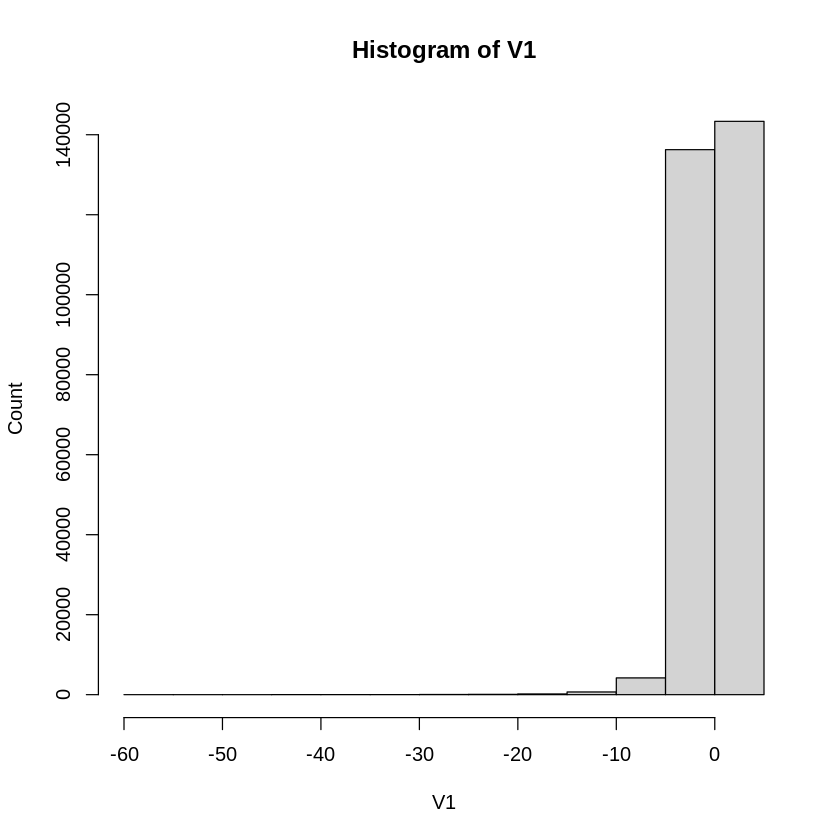

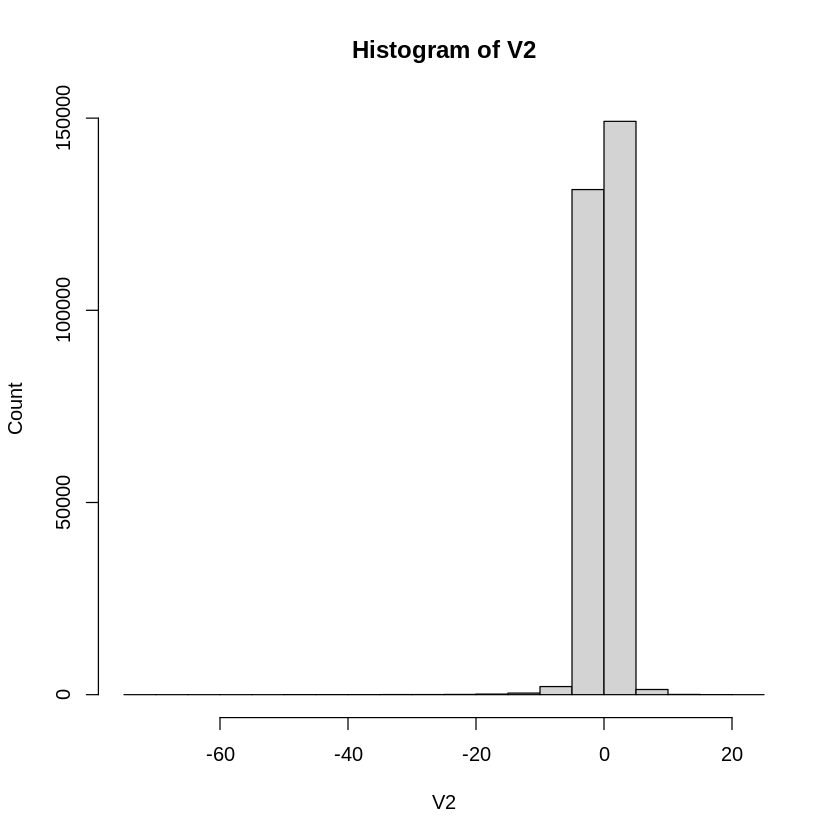

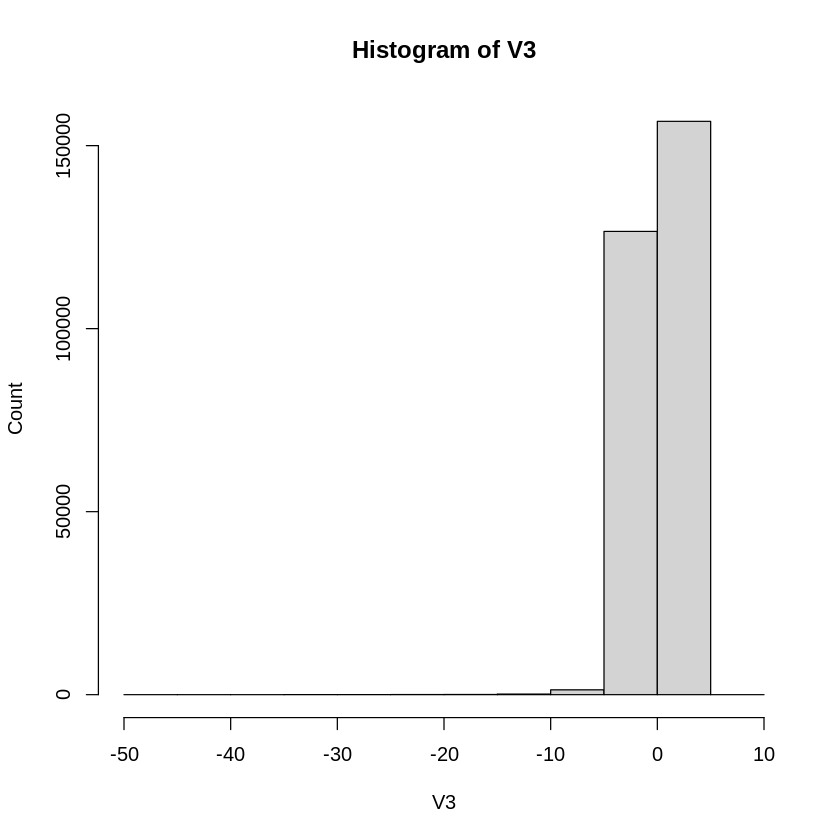

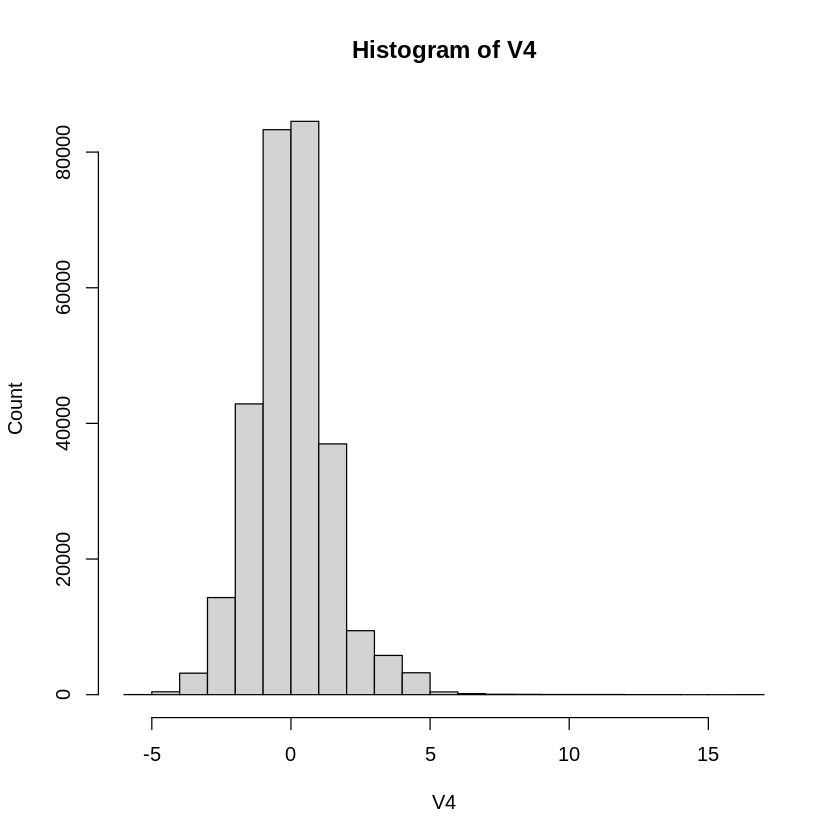

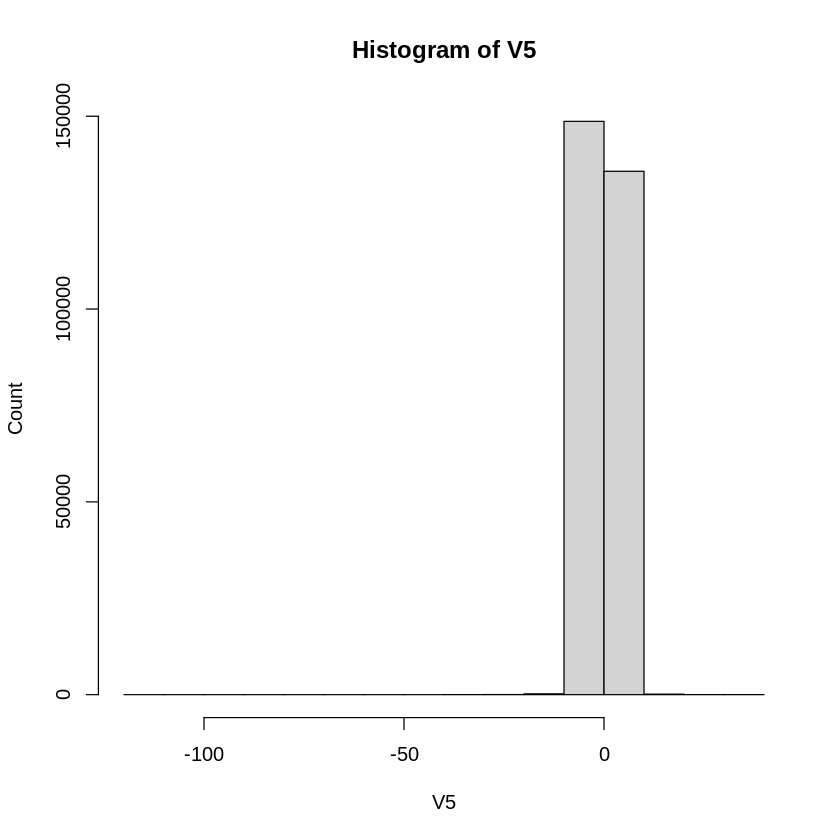

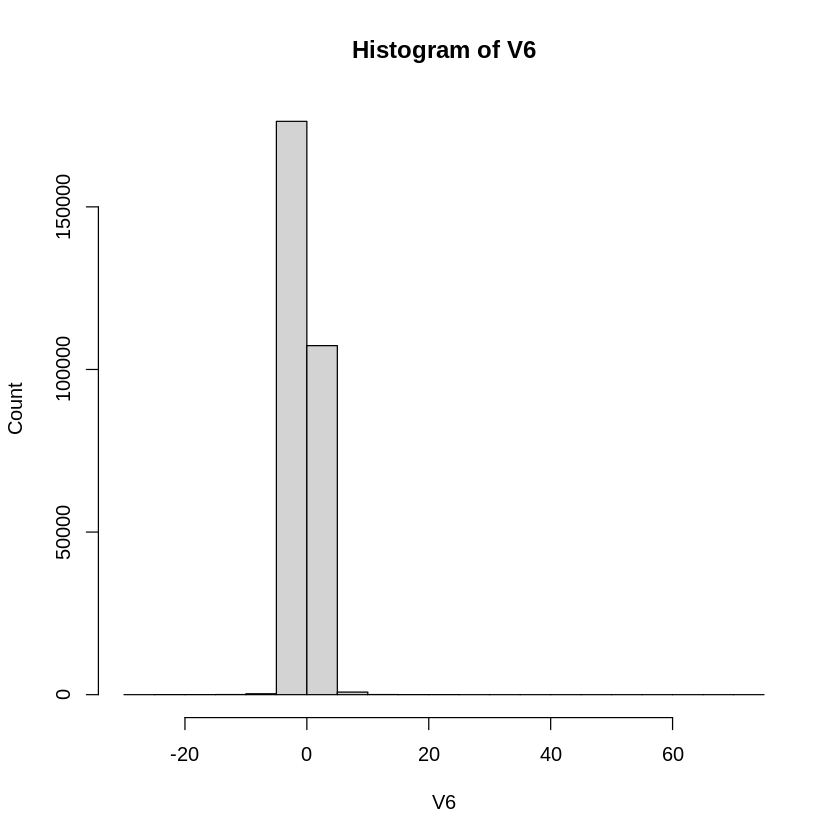

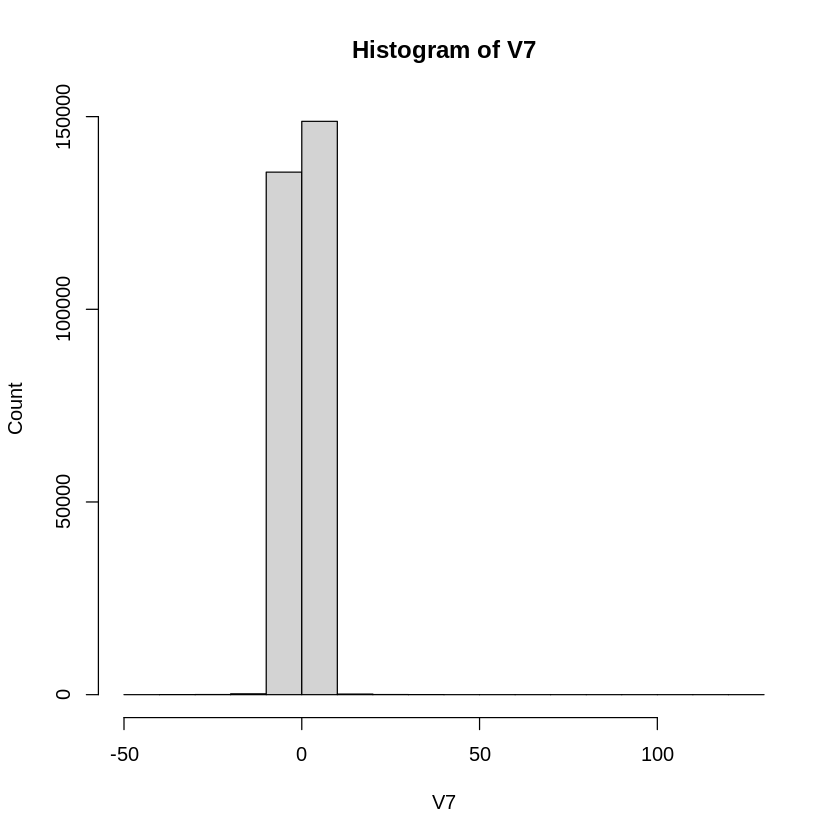

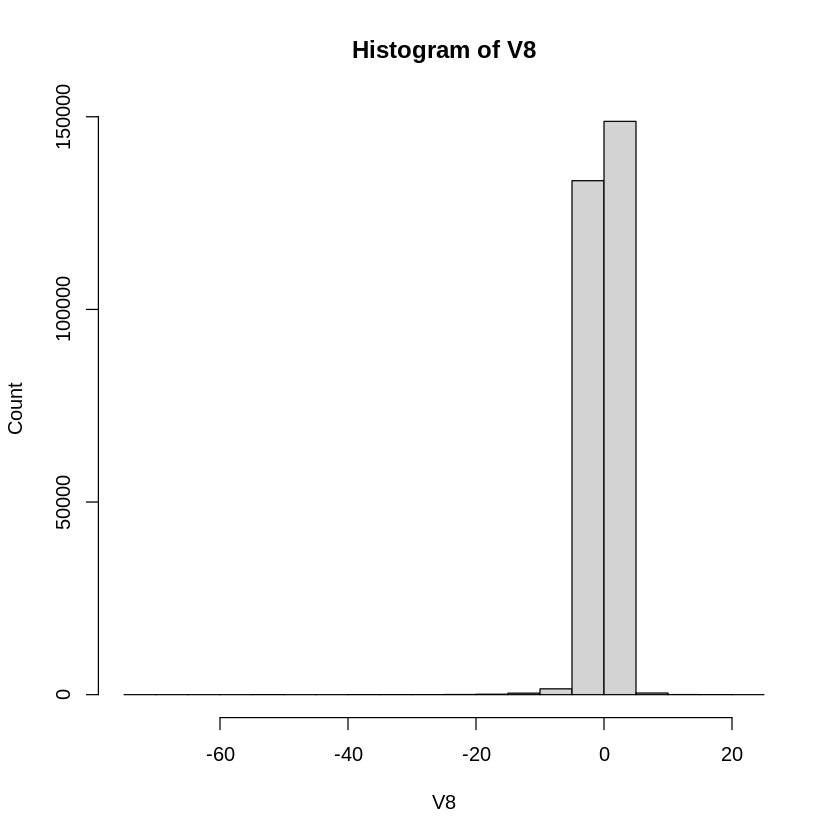

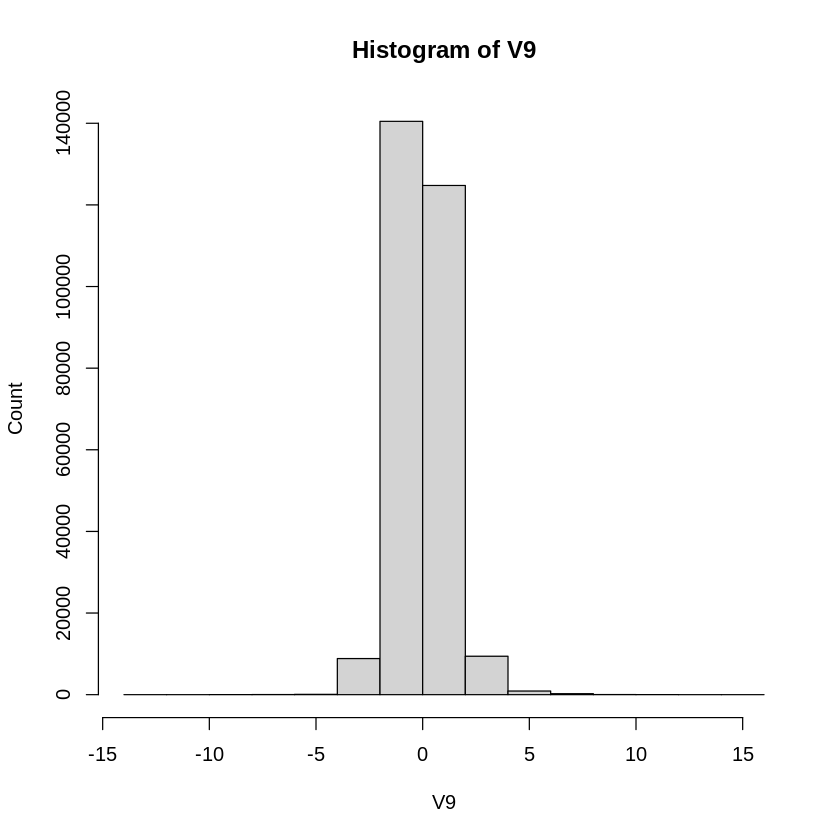

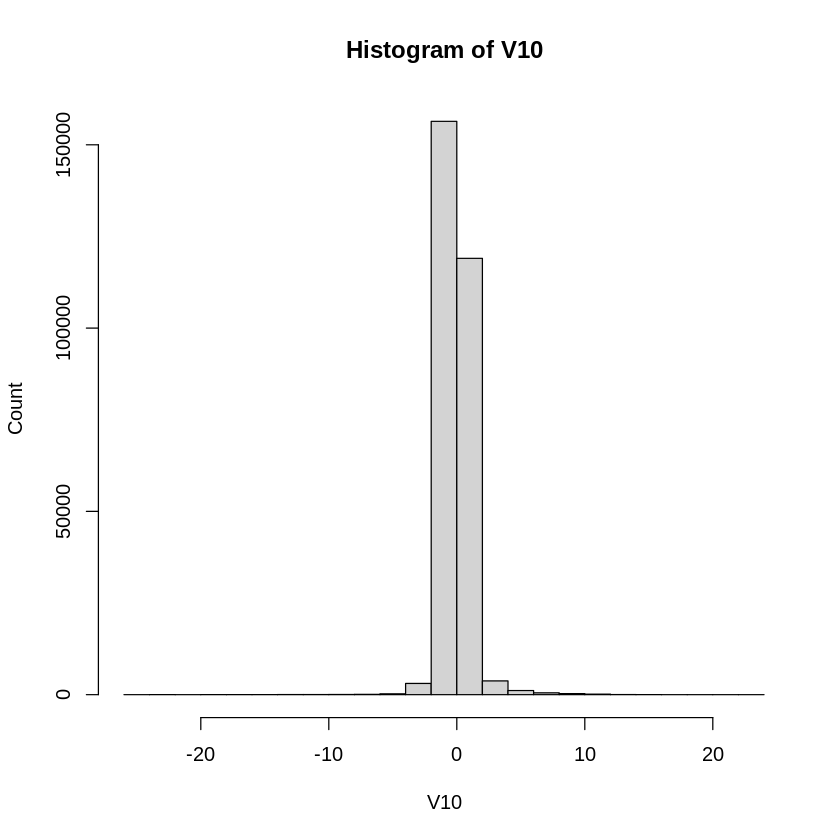

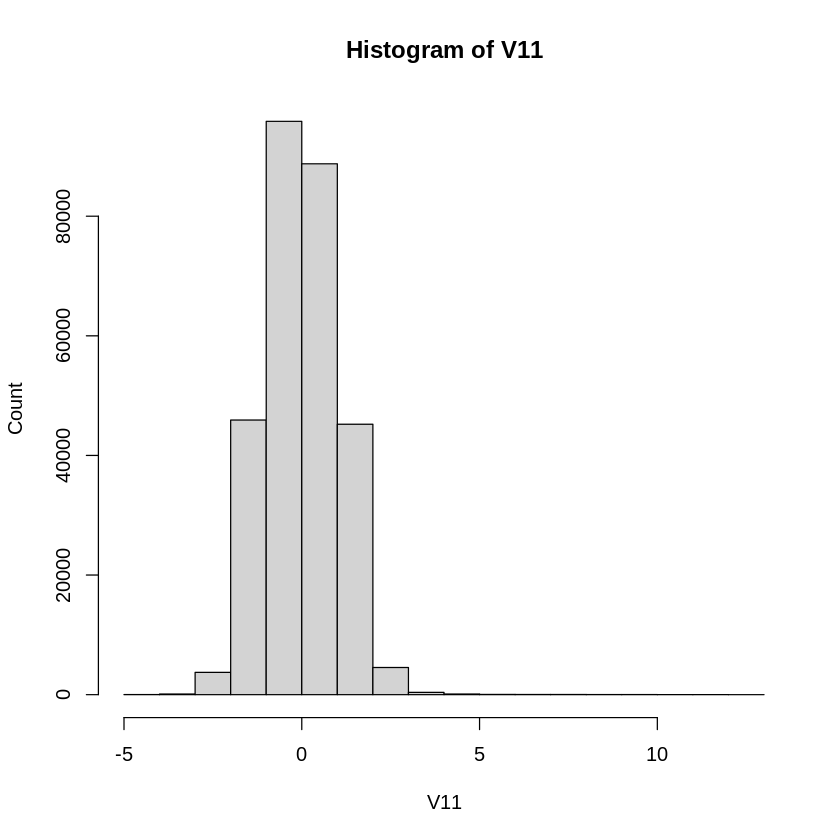

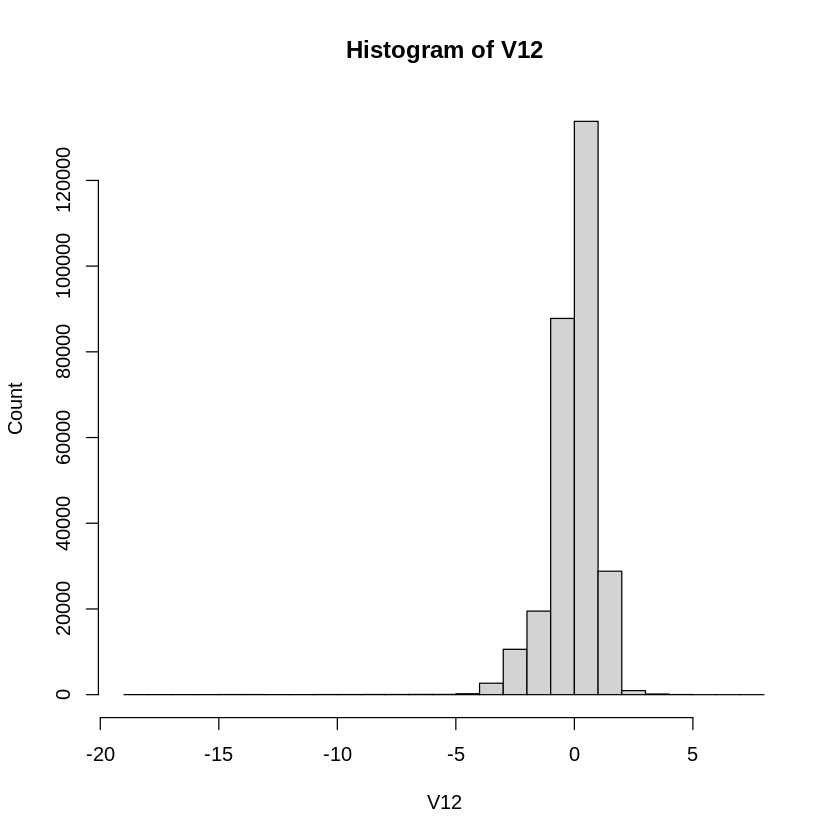

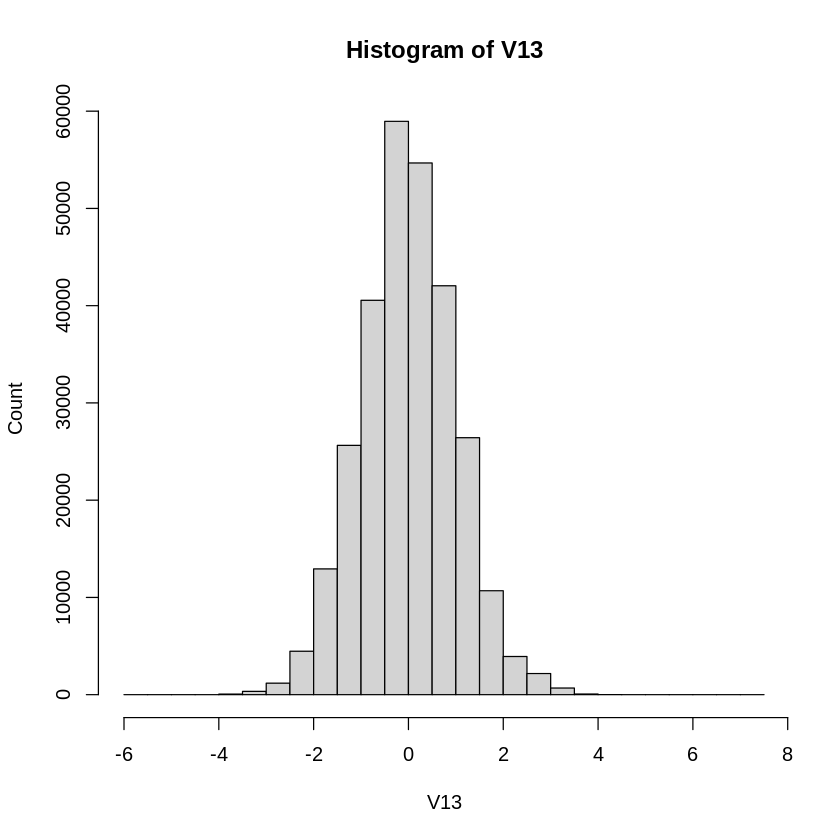

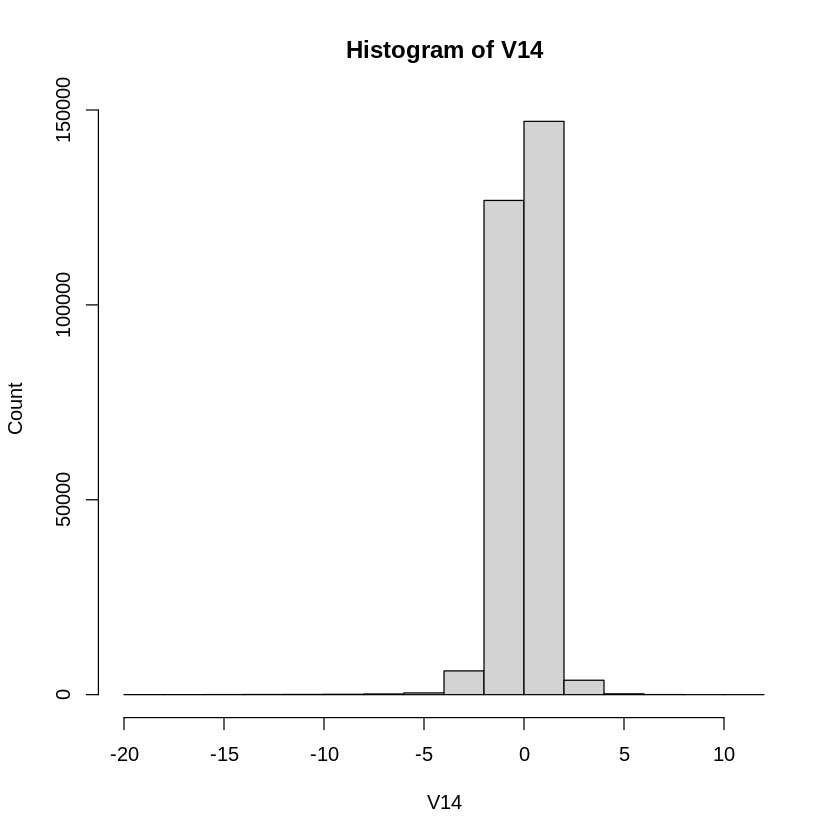

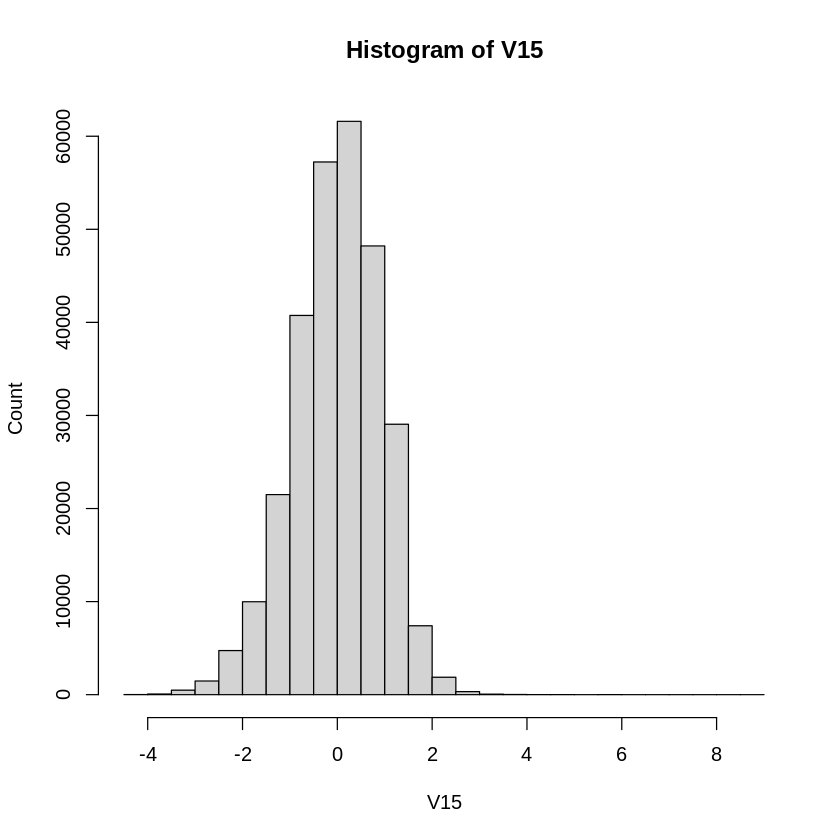

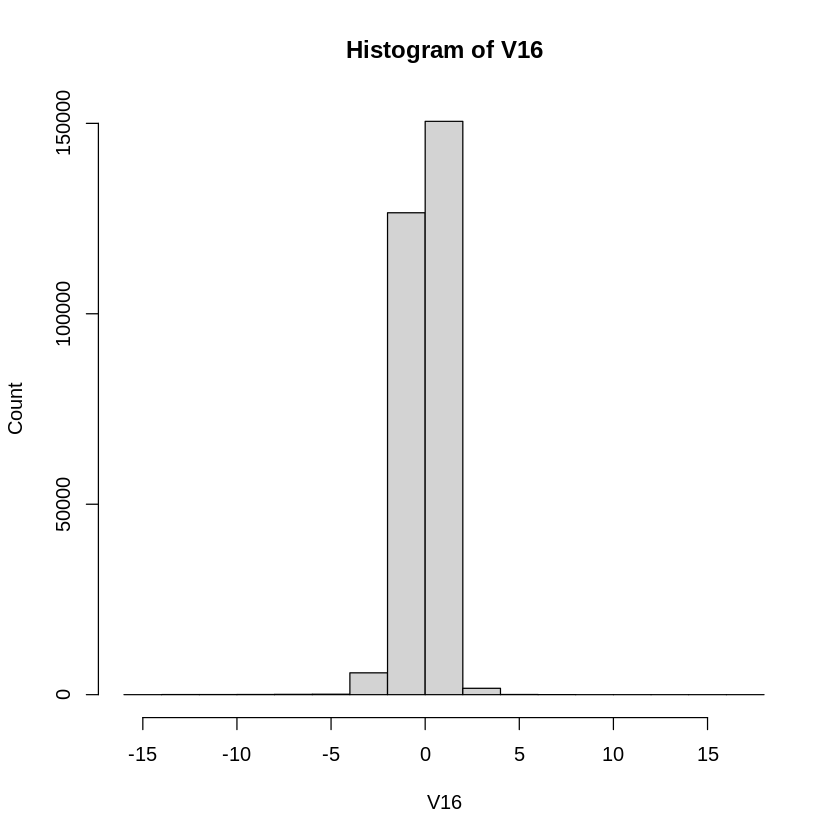

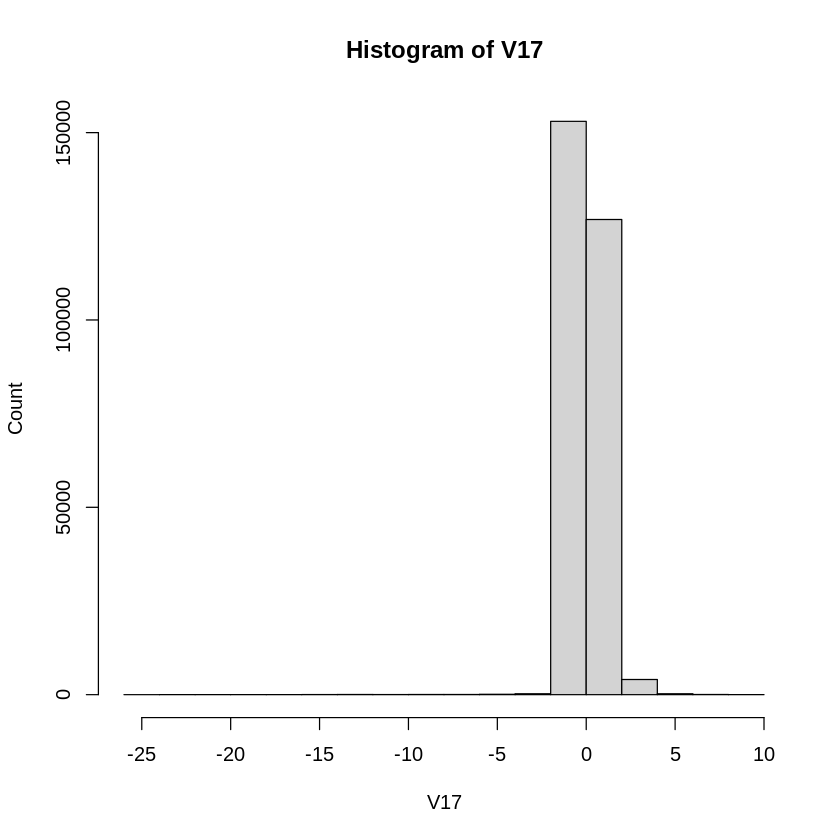

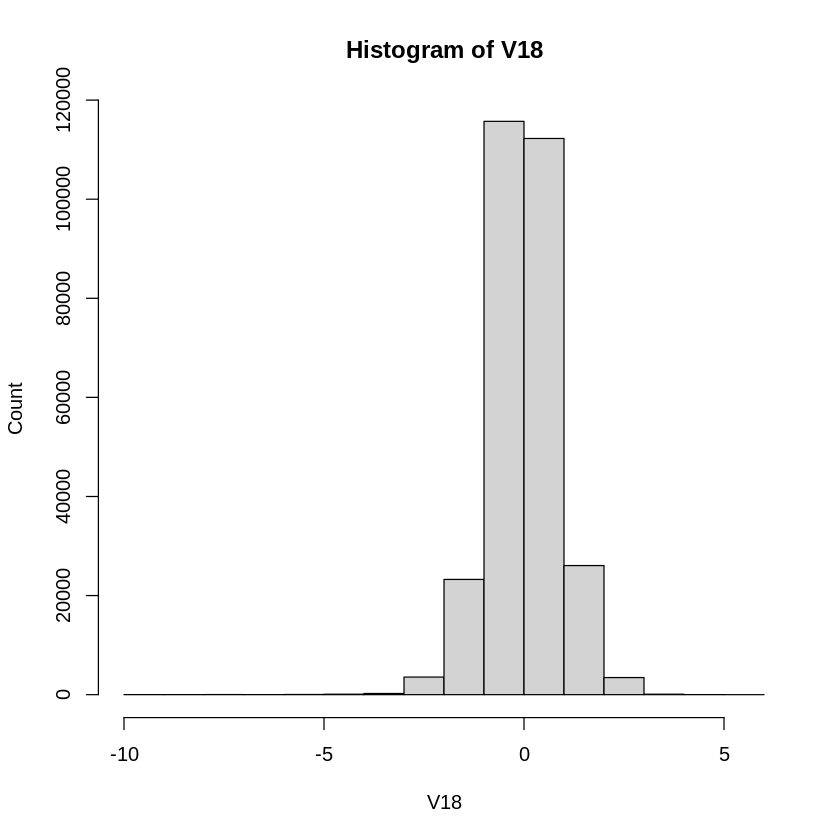

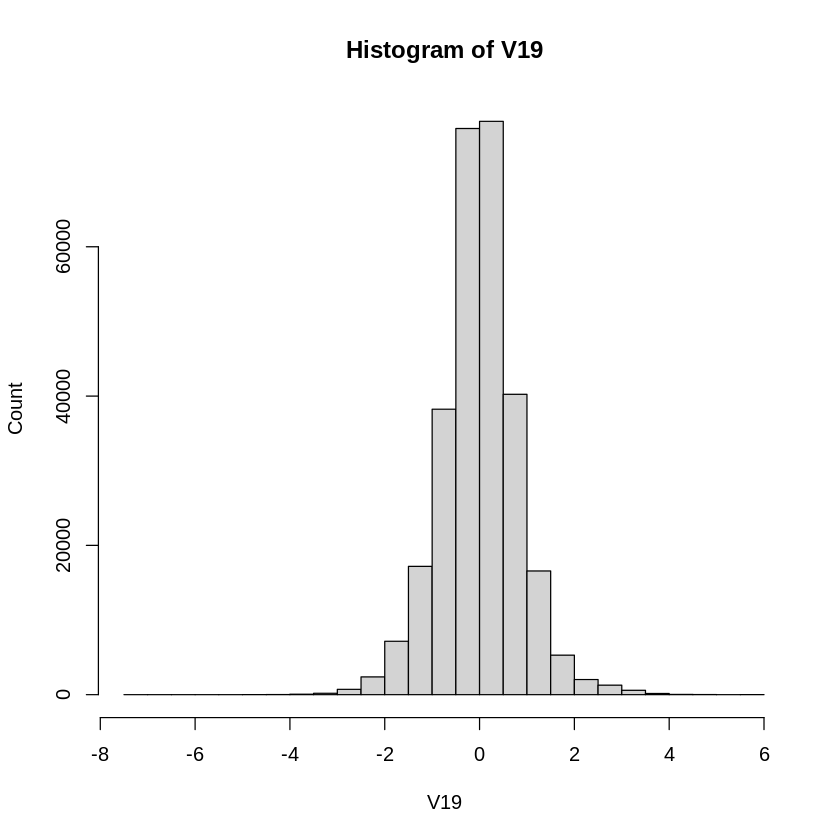

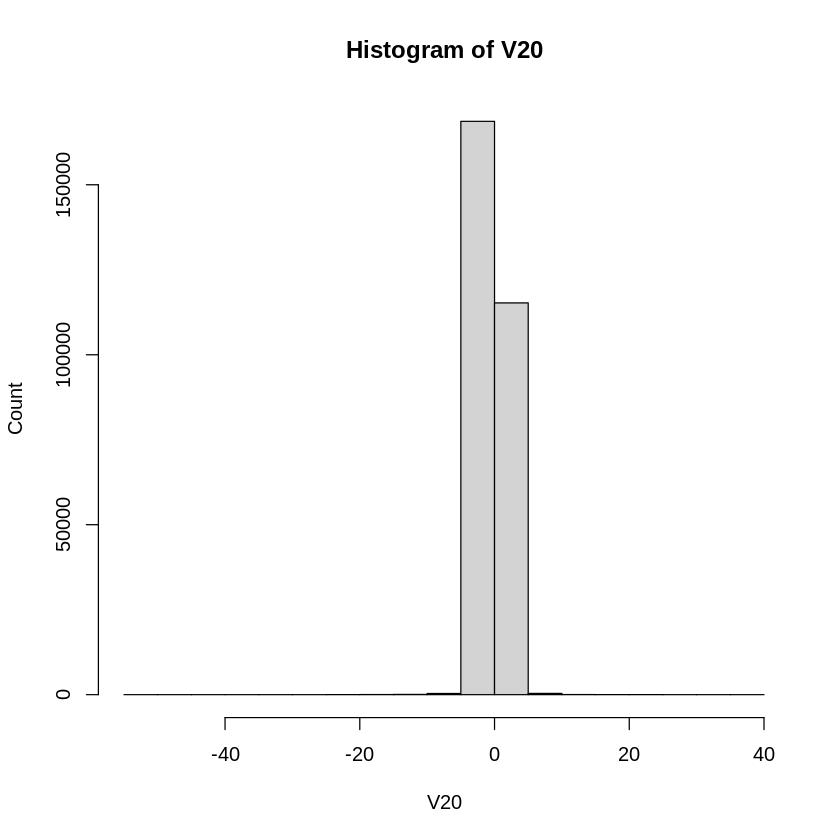

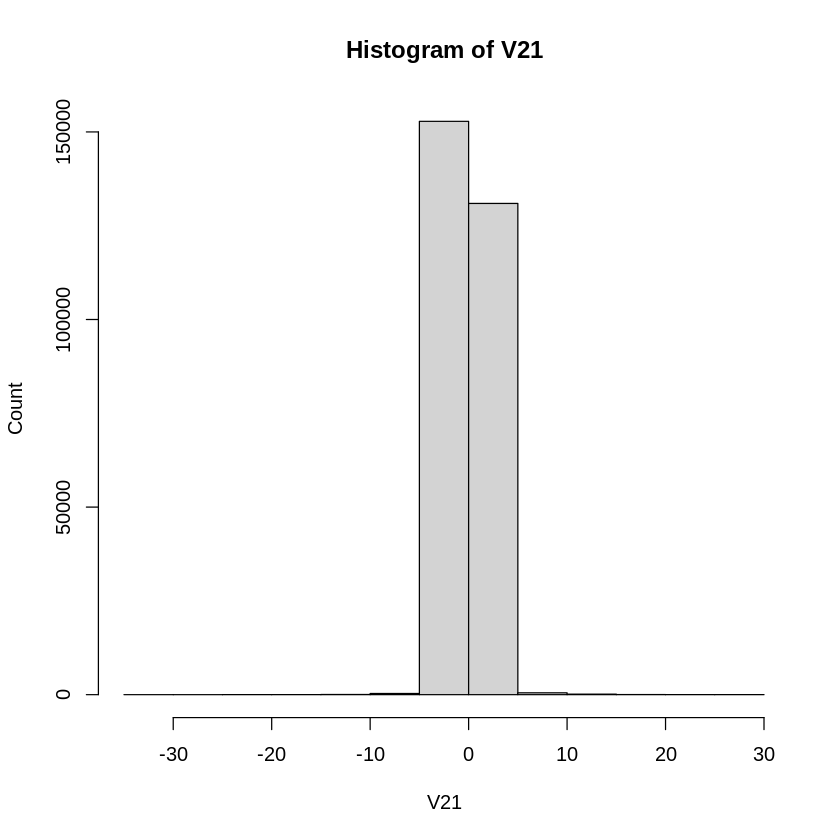

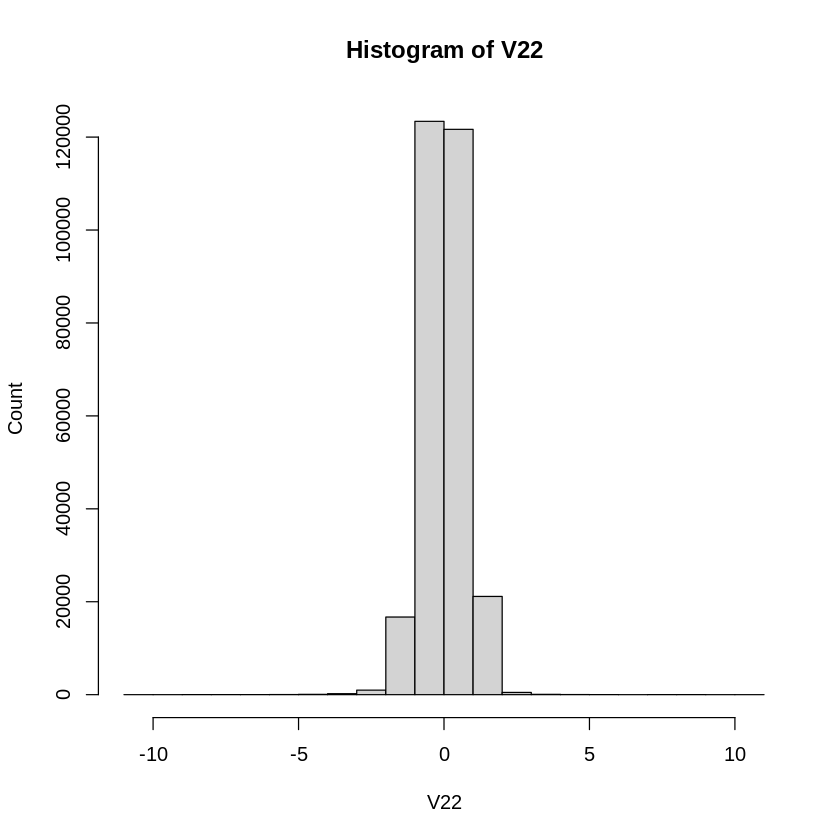

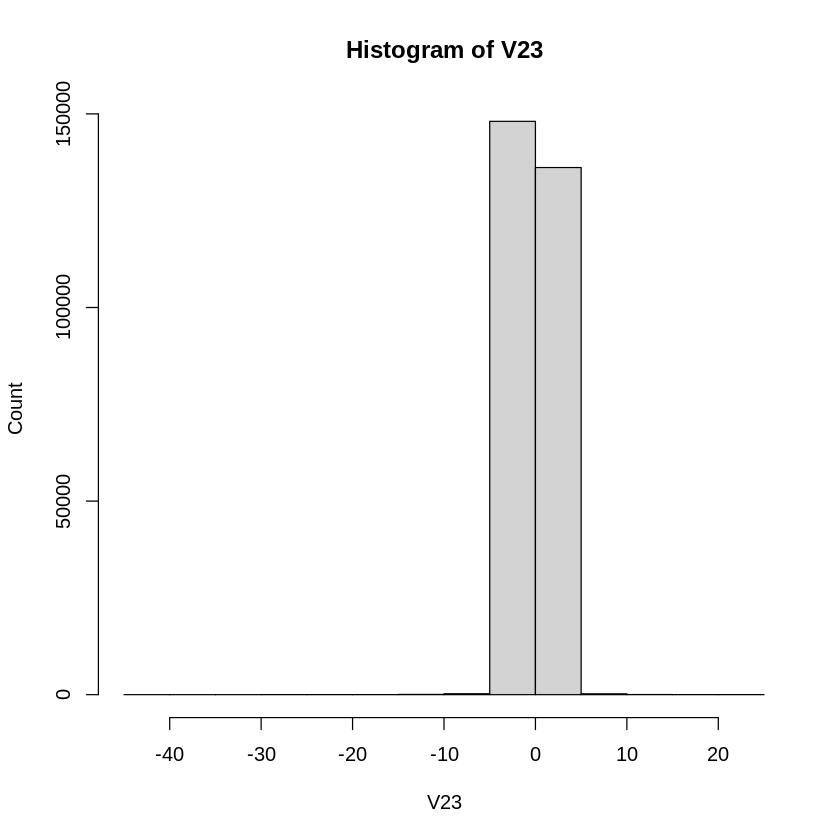

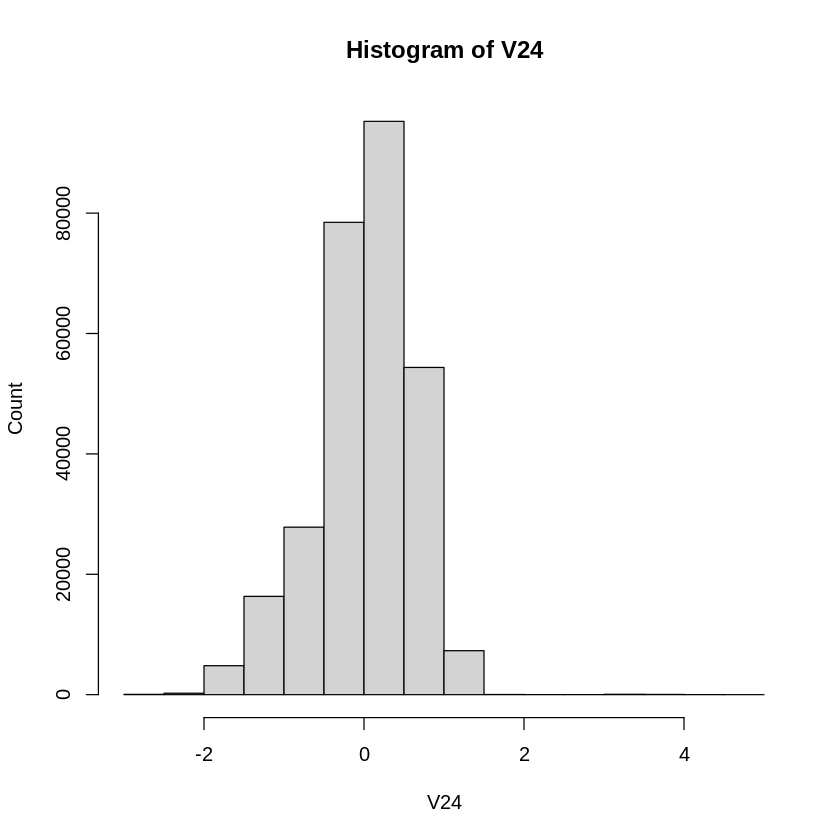

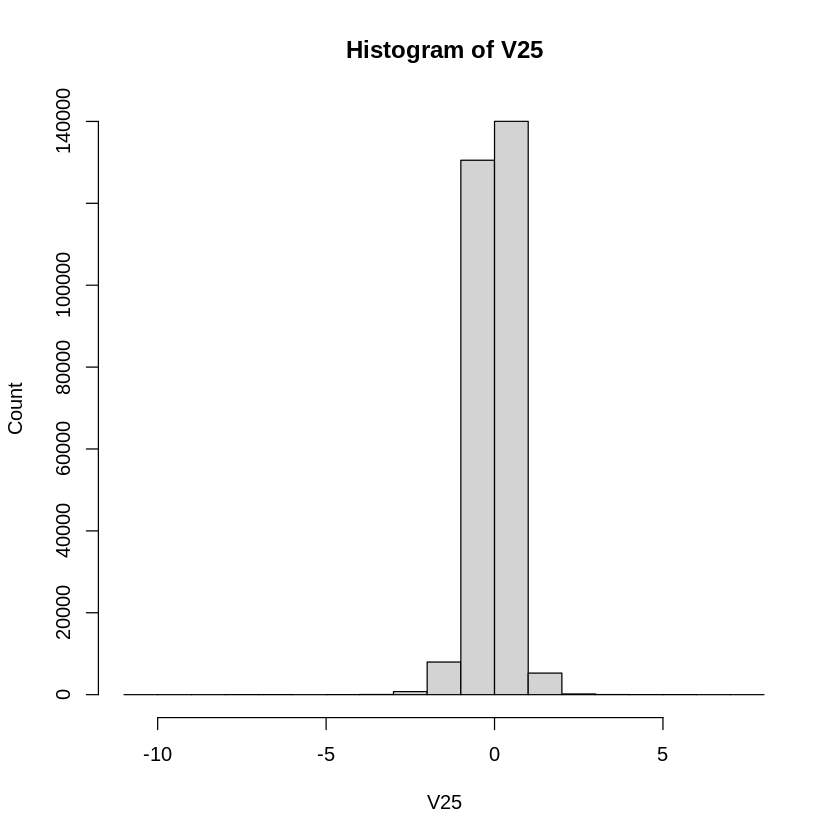

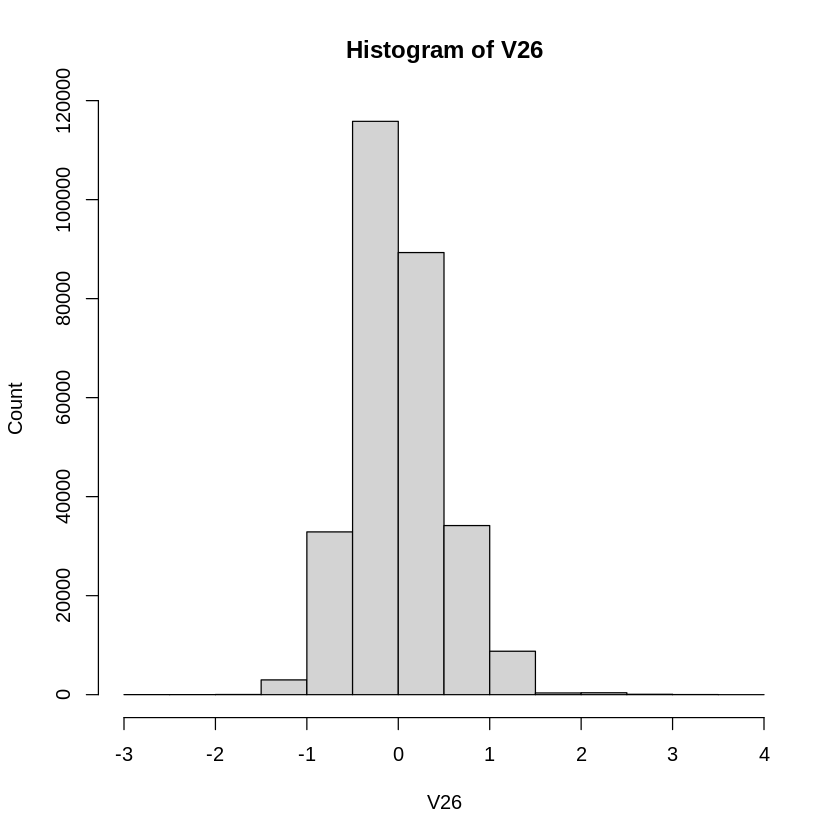

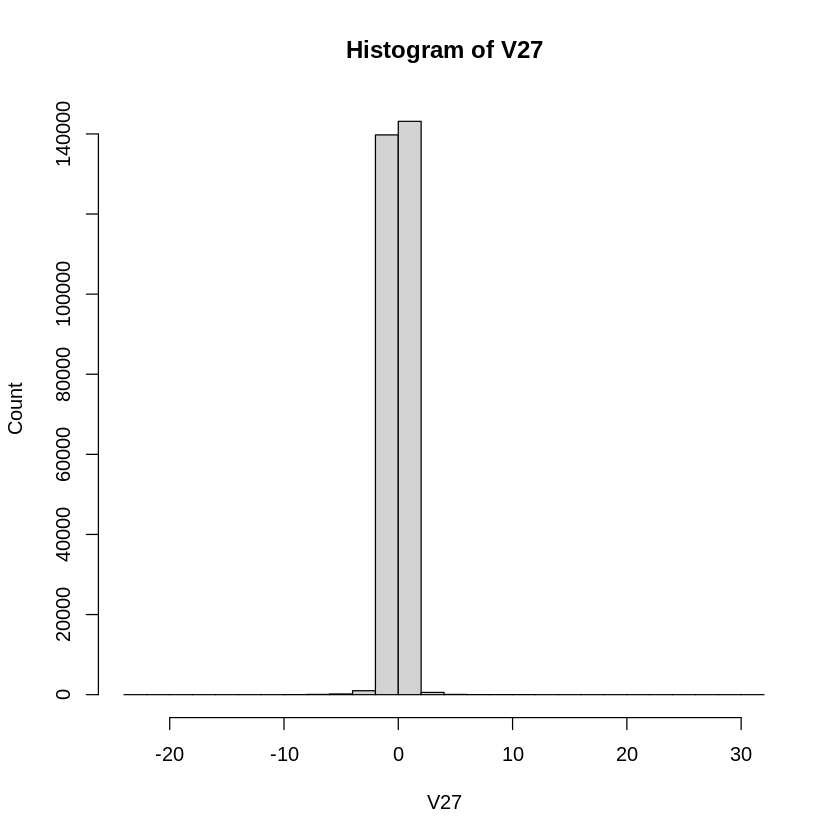

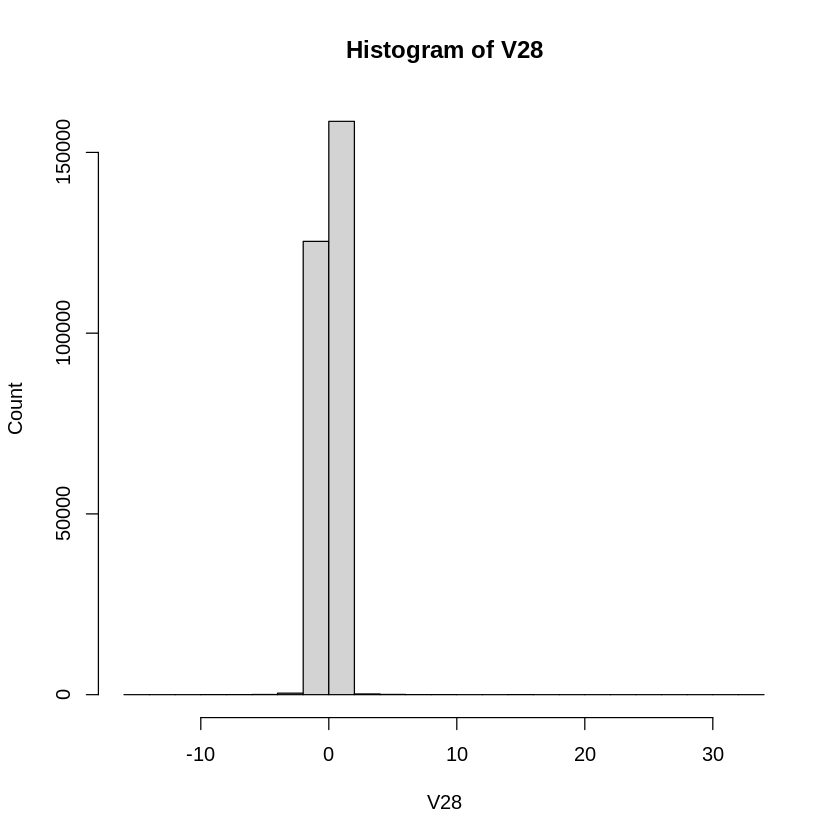

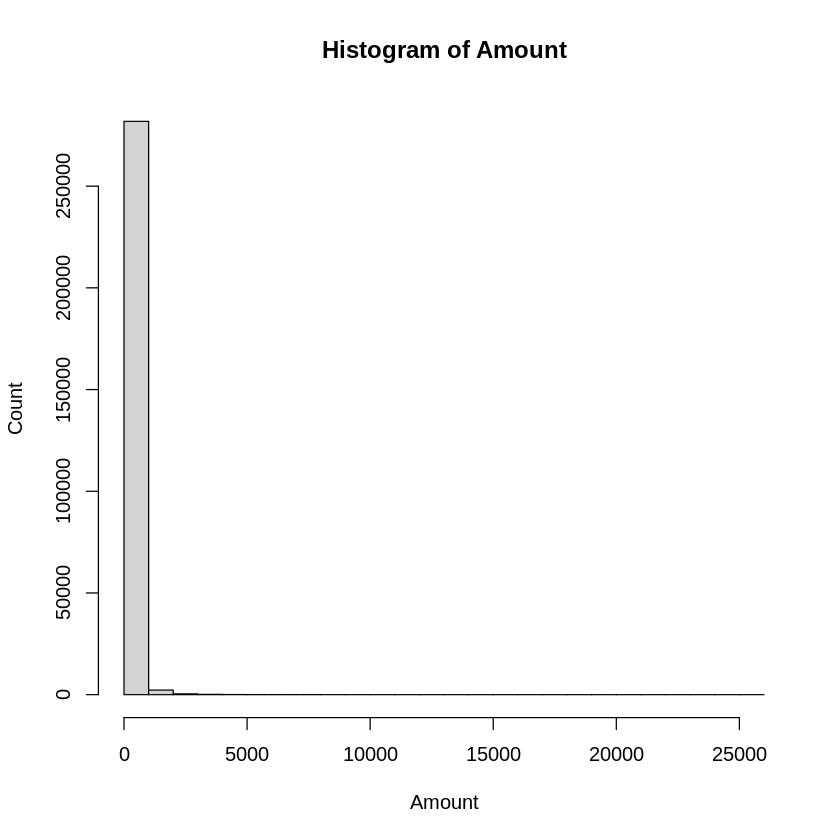

In [ ]:
#Histogram Plot of features
hist(cd1$V1,main='Histogram of V1',xlab='V1',ylab='Count')
hist(cd1$V2,main='Histogram of V2',xlab='V2',ylab='Count')
hist(cd1$V3,main='Histogram of V3',xlab='V3',ylab='Count')
hist(cd1$V4,main='Histogram of V4',xlab='V4',ylab='Count')
hist(cd1$V5,main='Histogram of V5',xlab='V5',ylab='Count')
hist(cd1$V6,main='Histogram of V6',xlab='V6',ylab='Count')
hist(cd1$V7,main='Histogram of V7',xlab='V7',ylab='Count')
hist(cd1$V8,main='Histogram of V8',xlab='V8',ylab='Count')
hist(cd1$V9,main='Histogram of V9',xlab='V9',ylab='Count')
hist(cd1$V10,main='Histogram of V10',xlab='V10',ylab='Count')
hist(cd1$V11,main='Histogram of V11',xlab='V11',ylab='Count')
hist(cd1$V12,main='Histogram of V12',xlab='V12',ylab='Count')
hist(cd1$V13,main='Histogram of V13',xlab='V13',ylab='Count')
hist(cd1$V14,main='Histogram of V14',xlab='V14',ylab='Count')
hist(cd1$V15,main='Histogram of V15',xlab='V15',ylab='Count')
hist(cd1$V16,main='Histogram of V16',xlab='V16',ylab='Count')
hist(cd1$V17,main='Histogram of V17',xlab='V17',ylab='Count')
hist(cd1$V18,main='Histogram of V18',xlab='V18',ylab='Count')
hist(cd1$V19,main='Histogram of V19',xlab='V19',ylab='Count')
hist(cd1$V20,main='Histogram of V20',xlab='V20',ylab='Count')
hist(cd1$V21,main='Histogram of V21',xlab='V21',ylab='Count')
hist(cd1$V22,main='Histogram of V22',xlab='V22',ylab='Count')
hist(cd1$V23,main='Histogram of V23',xlab='V23',ylab='Count')
hist(cd1$V24,main='Histogram of V24',xlab='V24',ylab='Count')
hist(cd1$V25,main='Histogram of V25',xlab='V25',ylab='Count')
hist(cd1$V26,main='Histogram of V26',xlab='V26',ylab='Count')
hist(cd1$V27,main='Histogram of V27',xlab='V27',ylab='Count')
hist(cd1$V28,main='Histogram of V28',xlab='V28',ylab='Count')
hist(cd1$Amount,main='Histogram of Amount',xlab='Amount',ylab='Count')

In [ ]:
skim(cd1)

── Data Summary ────────────────────────
                           Values
Name                       cd1   
Number of rows             284807
Number of columns          31    
_______________________          
Column type frequency:           
  numeric                  31    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate      mean         sd      p0        p25
 1 Time                  0             1  9.48e+ 4 47488.        0    54202.    
 2 V1                    0             1  1.17e-15     1.96    -56.4     -0.920 
 3 V2                    0             1  3.12e-16     1.65    -72.7     -0.599 
 4 V3                    0             1 -1.36e-15     1.52    -48.3     -0.890 
 5 V4                    0             1  2.11e-15     1.42     -5.68    -0.849 
 6 V5                    0             1  9.80e-16     1.38   -114.      -0.692 
 7 V

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 12 > 1' in coercion to 'logical(1)'”


,skim_type,skim_variable,n_missing,complete_rate,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,numeric,Time,0,1,9.481386e+04,4.748815e+04,0.000000,5.420150e+04,8.469200e+04,1.393205e+05,1.727920e+05,▃▇▅▆▇
2,numeric,V1,0,1,1.166582e-15,1.958696e+00,-56.407510,-9.203734e-01,1.810880e-02,1.315642e+00,2.454930e+00,▁▁▁▁▇
3,numeric,V2,0,1,3.118990e-16,1.651309e+00,-72.715728,-5.985499e-01,6.548556e-02,8.037239e-01,2.205773e+01,▁▁▁▇▁
4,numeric,V3,0,1,-1.363448e-15,1.516255e+00,-48.325589,-8.903648e-01,1.798463e-01,1.027196e+00,9.382558e+00,▁▁▁▁▇
5,numeric,V4,0,1,2.111334e-15,1.415869e+00,-5.683171,-8.486401e-01,-1.984653e-02,7.433413e-01,1.687534e+01,▂▇▁▁▁
6,numeric,V5,0,1,9.796989e-16,1.380247e+00,-113.743307,-6.915971e-01,-5.433583e-02,6.119264e-01,3.480167e+01,▁▁▁▇▁
7,numeric,V6,0,1,1.510038e-15,1.332271e+00,-26.160506,-7.682956e-01,-2.741871e-01,3.985649e-01,7.330163e+01,▁▇▁▁▁
8,numeric,V7,0,1,-5.421869e-16,1.237094e+00,-43.557242,-5.540759e-01,4.010308e-02,5.704361e-01,1.205895e+02,▁▇▁▁▁
9,numeric,V8,0,1,1.026743e-16,1.194353e+00,-73.216718,-2.086297e-01,2.235804e-02,3.273459e-01,2.000721e+01,▁▁▁▇▁


In [ ]:
smote = SMOTE(cd1[,-31],cd1$Class)
smotecd1 = smote$data
table(smotecd1$class)


     0      1 
284315 283884 

In [ ]:
adasyn <- ADAS(cd1[,-31],cd1$Class)
adasyncd1 = adasyn$data
table(adasyncd1$class)


     0      1 
284315 284298 

In [ ]:
dbsmote <- DBSMOTE(cd1[,-31],cd1$Class)
dbsmotecd1 = dbsmote$data
table(dbsmotecd1$class)

[1] 3
[1] 3
[1] 3
[1] 4
[1] 9
[1] 5
[1] 3
[1] 4
[1] 3
[1] 3
[1] 5
[1] 3
[1] 3
[1] 2
[1] 3
[1] 7
[1] 4
[1] 2
[1] 4
[1] 4
[1] 2
[1] 3
[1] 5
[1] 8
[1] 3
[1] 3
[1] 4
[1] 4
[1] 2
[1] 9
[1] 3
[1] 8
[1] 4
[1] 2
[1] 3
[1] 3
[1] 6
[1] 9
[1] 5
[1] 3
[1] 4
[1] 3
[1] 3
[1] 3
[1] 4
[1] 3
[1] 4
[1] 3
[1] 2
[1] 4
[1] 6
[1] 8
[1] 2
[1] 9
[1] 3
[1] 4
[1] 3
[1] 4
[1] 3
[1] 3
[1] 2
[1] 2
[1] 2
[1] 2
[1] 3
[1] 3
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 3
[1] 2
[1] 5
[1] 4
[1] 3
[1] 2
[1] 5
[1] 2
[1] 2
[1] 2
[1] 4
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 5
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 3
[1] 2
[1] 3
[1] 2
[1] 3
[1] 3
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 3
[1] 2
[1] 2
[1] 2
[1] 3
[1] 2
[1] 2
[1] 2
[1] 3
[1] 2
[1] 3
[1] 5
[1] 2
[1] 2
[1] 3
[1] 3
[1] 3
[1] 2
[1] 3
[1] 4
[1] 3
[1] 6
[1] 3
[1] 3
[1] 2
[1] 8
[1] 4
[1] 4
[1] 3
[1] 6
[1] 4
[1] 3
[1] 8
[1] 4
[1] 2
[1] 3
[1] 5
[1] 


     0      1 
284315 266542 

In [ ]:
cd2 = read.csv('/content/application_data.csv')

In [ ]:
head(cd2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,⋯,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,100002,1,Cash loans,M,N,Y,0,202500,406597.5,24700.5,⋯,0,0,0,0,0,0,0,0,0,1
2,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,⋯,0,0,0,0,0,0,0,0,0,0
3,100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,6750.0,⋯,0,0,0,0,0,0,0,0,0,0
4,100006,0,Cash loans,F,N,Y,0,135000,312682.5,29686.5,⋯,0,0,0,0,NA,NA,NA,NA,NA,NA
5,100007,0,Cash loans,M,N,Y,0,121500,513000.0,21865.5,⋯,0,0,0,0,0,0,0,0,0,0
6,100008,0,Cash loans,M,N,Y,0,99000,490495.5,27517.5,⋯,0,0,0,0,0,0,0,0,1,1


In [ ]:
sprintf("Number of rows in dataset: %d", nrow(cd2)) 
sprintf("Number of attributes in dataset: %d", ncol(cd2))

[1] "Number of rows in dataset: 307511"

[1] "Number of attributes in dataset: 122"

In [ ]:
sprintf("Data types of attributes in the dataset:")
table(sapply(cd2, class))

[1] "Data types of attributes in the dataset:"


character   integer   numeric 
       16        41        65 

In [ ]:
str(cd2)

'data.frame':	307511 obs. of  122 variables:
 $ SK_ID_CURR                  : int  100002 100003 100004 100006 100007 100008 100009 100010 100011 100012 ...
 $ TARGET                      : int  1 0 0 0 0 0 0 0 0 0 ...
 $ NAME_CONTRACT_TYPE          : chr  "Cash loans" "Cash loans" "Revolving loans" "Cash loans" ...
 $ CODE_GENDER                 : chr  "M" "F" "M" "F" ...
 $ FLAG_OWN_CAR                : chr  "N" "N" "Y" "N" ...
 $ FLAG_OWN_REALTY             : chr  "Y" "N" "Y" "Y" ...
 $ CNT_CHILDREN                : int  0 0 0 0 0 0 1 0 0 0 ...
 $ AMT_INCOME_TOTAL            : num  202500 270000 67500 135000 121500 ...
 $ AMT_CREDIT                  : num  406598 1293502 135000 312682 513000 ...
 $ AMT_ANNUITY                 : num  24700 35698 6750 29686 21866 ...
 $ AMT_GOODS_PRICE             : num  351000 1129500 135000 297000 513000 ...
 $ NAME_TYPE_SUITE             : chr  "Unaccompanied" "Family" "Unaccompanied" "Unaccompanied" ...
 $ NAME_INCOME_TYPE            : chr  "Worki

In [ ]:
sprintf("Target Class Distribution: 0: Non-Fraudulent, 1: Fraudulent")
table(cd2$TARGET)

[1] "Target Class Distribution: 0: Non-Fraudulent, 1: Fraudulent"


     0      1 
282686  24825 

In [ ]:
sprintf("Percentage Target Class Distribution: 0: Non-Fraudulent, 1: Fraudulent")
table(cd2$TARGET) / nrow(cd2)

[1] "Percentage Target Class Distribution: 0: Non-Fraudulent, 1: Fraudulent"


         0          1 
0.91927118 0.08072882 

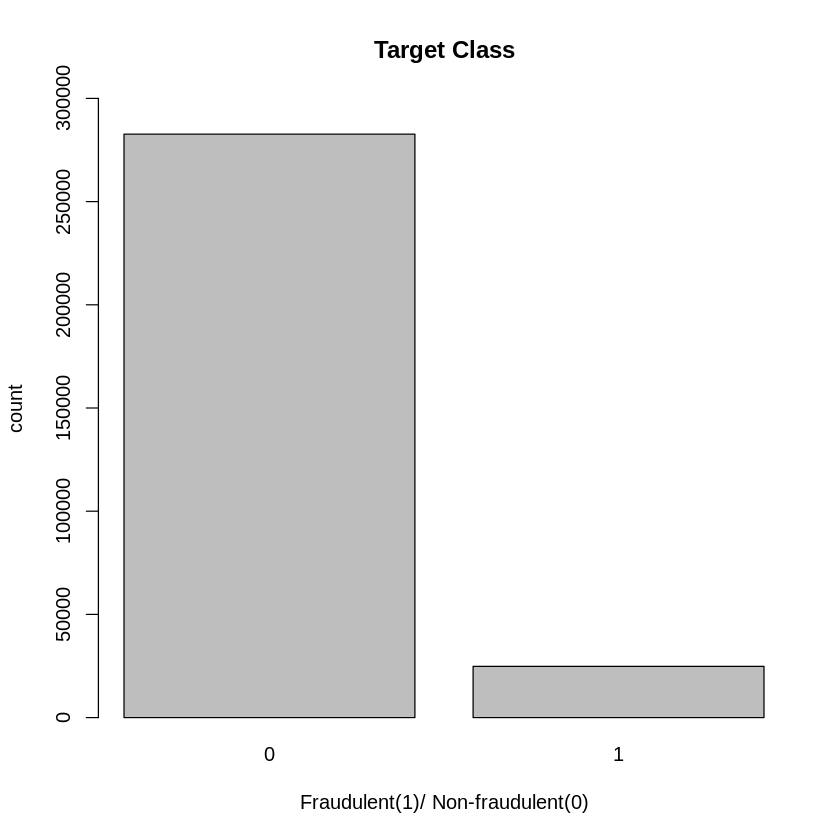

In [ ]:
# Simple Bar Plot
count <- table(cd2$TARGET)
barplot(count, main="Target Class",xlab="Fraudulent(1)/ Non-fraudulent(0)", ylab='count', ylim= c(0,300000))

In [ ]:
#Count Null values in dataset
print(colSums(is.na(cd2)))

                  SK_ID_CURR                       TARGET 
                           0                            0 
          NAME_CONTRACT_TYPE                  CODE_GENDER 
                           0                            0 
                FLAG_OWN_CAR              FLAG_OWN_REALTY 
                           0                            0 
                CNT_CHILDREN             AMT_INCOME_TOTAL 
                           0                            0 
                  AMT_CREDIT                  AMT_ANNUITY 
                           0                           12 
             AMT_GOODS_PRICE              NAME_TYPE_SUITE 
                         278                            0 
            NAME_INCOME_TYPE          NAME_EDUCATION_TYPE 
                           0                            0 
          NAME_FAMILY_STATUS            NAME_HOUSING_TYPE 
                           0                            0 
  REGION_POPULATION_RELATIVE                   DAYS_BIRT

In [ ]:
colnames(cd2)

[1] "SK_ID_CURR"                   "TARGET"                      
  [3] "NAME_CONTRACT_TYPE"           "CODE_GENDER"                 
  [5] "FLAG_OWN_CAR"                 "FLAG_OWN_REALTY"             
  [7] "CNT_CHILDREN"                 "AMT_INCOME_TOTAL"            
  [9] "AMT_CREDIT"                   "AMT_ANNUITY"                 
 [11] "AMT_GOODS_PRICE"              "NAME_TYPE_SUITE"             
 [13] "NAME_INCOME_TYPE"             "NAME_EDUCATION_TYPE"         
 [15] "NAME_FAMILY_STATUS"           "NAME_HOUSING_TYPE"           
 [17] "REGION_POPULATION_RELATIVE"   "DAYS_BIRTH"                  
 [19] "DAYS_EMPLOYED"                "DAYS_REGISTRATION"           
 [21] "DAYS_ID_PUBLISH"              "FLAG_MOBIL"                  
 [23] "FLAG_EMP_PHONE"               "FLAG_WORK_PHONE"             
 [25] "FLAG_CONT_MOBILE"             "FLAG_PHONE"                  
 [27] "FLAG_EMAIL"                   "OCCUPATION_TYPE"             
 [29] "CNT_FAM_MEMBERS"              "REGION_RATING_CLIENT"        
 [31] "REGION_RATING_CLIENT_W_CITY"  "WEEKDAY_APPR_PROCESS_START"  
 [33] "HOUR_APPR_PROCESS_START"      "REG_REGION_NOT_LIVE_REGION"  
 [35] "REG_REGION_NOT_WORK_REGION"   "LIVE_REGION_NOT_WORK_REGION" 
 [37] "REG_CITY_NOT_LIVE_CITY"       "REG_CITY_NOT_WORK_CITY"      
 [39] "LIVE_CITY_NOT_WORK_CITY"      "ORGANIZATION_TYPE"           
 [41] "EXT_SOURCE_2"                 "EXT_SOURCE_3"                
 [43] "APARTMENTS_AVG"               "BASEMENTAREA_AVG"            
 [45] "YEARS_BEGINEXPLUATATION_AVG"  "YEARS_BUILD_AVG"             
 [47] "COMMONAREA_AVG"               "ELEVATORS_AVG"               
 [49] "ENTRANCES_AVG"                "FLOORSMAX_AVG"               
 [51] "FLOORSMIN_AVG"                "LANDAREA_AVG"                
 [53] "LIVINGAPARTMENTS_AVG"         "LIVINGAREA_AVG"              
 [55] "NONLIVINGAPARTMENTS_AVG"      "NONLIVINGAREA_AVG"           
 [57] "APARTMENTS_MODE"              "BASEMENTAREA_MODE"           
 [59] "YEARS_BEGINEXPLUATATION_MODE" "YEARS_BUILD_MODE"            
 [61] "COMMONAREA_MODE"              "ELEVATORS_MODE"              
 [63] "ENTRANCES_MODE"               "FLOORSMAX_MODE"              
 [65] "FLOORSMIN_MODE"               "LANDAREA_MODE"               
 [67] "LIVINGAPARTMENTS_MODE"        "LIVINGAREA_MODE"             
 [69] "NONLIVINGAPARTMENTS_MODE"     "NONLIVINGAREA_MODE"          
 [71] "APARTMENTS_MEDI"              "BASEMENTAREA_MEDI"           
 [73] "YEARS_BEGINEXPLUATATION_MEDI" "YEARS_BUILD_MEDI"            
 [75] "COMMONAREA_MEDI"              "ELEVATORS_MEDI"              
 [77] "ENTRANCES_MEDI"               "FLOORSMAX_MEDI"              
 [79] "FLOORSMIN_MEDI"               "LANDAREA_MEDI"               
 [81] "LIVINGAPARTMENTS_MEDI"        "LIVINGAREA_MEDI"             
 [83] "NONLIVINGAPARTMENTS_MEDI"     "NONLIVINGAREA_MEDI"          
 [85] "FONDKAPREMONT_MODE"           "HOUSETYPE_MODE"              
 [87] "TOTALAREA_MODE"               "WALLSMATERIAL_MODE"          
 [89] "EMERGENCYSTATE_MODE"          "OBS_30_CNT_SOCIAL_CIRCLE"    
 [91] "DEF_30_CNT_SOCIAL_CIRCLE"     "OBS_60_CNT_SOCIAL_CIRCLE"    
 [93] "DEF_60_CNT_SOCIAL_CIRCLE"     "DAYS_LAST_PHONE_CHANGE"      
 [95] "FLAG_DOCUMENT_2"              "FLAG_DOCUMENT_3"             
 [97] "FLAG_DOCUMENT_4"              "FLAG_DOCUMENT_5"             
 [99] "FLAG_DOCUMENT_6"              "FLAG_DOCUMENT_7"             
[101] "FLAG_DOCUMENT_8"              "FLAG_DOCUMENT_9"             
[103] "FLAG_DOCUMENT_10"             "FLAG_DOCUMENT_11"            
[105] "FLAG_DOCUMENT_12"             "FLAG_DOCUMENT_13"            
[107] "FLAG_DOCUMENT_14"             "FLAG_DOCUMENT_15"            
[109] "FLAG_DOCUMENT_16"             "FLAG_DOCUMENT_17"            
[111] "FLAG_DOCUMENT_18"             "FLAG_DOCUMENT_19"            
[113] "FLAG_DOCUMENT_20"             "FLAG_DOCUMENT_21"            
[115] "AMT_REQ_CREDIT_BUREAU_HOUR"   "AMT_REQ_CREDIT_BUREAU_DAY"   
[117] "AMT_REQ_CREDIT_BUREAU_WEEK"   "AMT_REQ_CREDIT_BUREA

In [ ]:
#Drop columns from the dataframe with a large number of null values
cd2 = subset(cd2, select = -c(OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR))

In [ ]:
cd2 = subset(cd2, select = -c(SK_ID_CURR))

In [ ]:
cd2 = subset(cd2, select = -c(CODE_GENDER))

In [ ]:
#Drop rows with null values
cd2 = na.omit(cd2)

In [ ]:
#Count Null values in dataset
print(colSums(is.na(cd2)))

                     TARGET          NAME_CONTRACT_TYPE 
                          0                           0 
               FLAG_OWN_CAR             FLAG_OWN_REALTY 
                          0                           0 
               CNT_CHILDREN            AMT_INCOME_TOTAL 
                          0                           0 
                 AMT_CREDIT                 AMT_ANNUITY 
                          0                           0 
            AMT_GOODS_PRICE             NAME_TYPE_SUITE 
                          0                           0 
           NAME_INCOME_TYPE         NAME_EDUCATION_TYPE 
                          0                           0 
         NAME_FAMILY_STATUS           NAME_HOUSING_TYPE 
                          0                           0 
 REGION_POPULATION_RELATIVE                  DAYS_BIRTH 
                          0                           0 
              DAYS_EMPLOYED           DAYS_REGISTRATION 
                          0    

In [ ]:
sprintf("Number of rows in dataset: %d", nrow(cd2)) 
sprintf("Number of attributes in dataset: %d", ncol(cd2))

[1] "Number of rows in dataset: 306199"

[1] "Number of attributes in dataset: 63"

In [ ]:
sprintf("Data types of attributes in the dataset:")
table(sapply(cd2, class))

[1] "Data types of attributes in the dataset:"


character   integer   numeric 
       11        40        12 

In [ ]:
str(cd2)

'data.frame':	306199 obs. of  63 variables:
 $ TARGET                     : int  1 0 0 0 0 0 0 0 0 0 ...
 $ NAME_CONTRACT_TYPE         : chr  "Cash loans" "Cash loans" "Revolving loans" "Cash loans" ...
 $ FLAG_OWN_CAR               : chr  "N" "N" "Y" "N" ...
 $ FLAG_OWN_REALTY            : chr  "Y" "N" "Y" "Y" ...
 $ CNT_CHILDREN               : int  0 0 0 0 0 0 1 0 0 0 ...
 $ AMT_INCOME_TOTAL           : num  202500 270000 67500 135000 121500 ...
 $ AMT_CREDIT                 : num  406598 1293502 135000 312682 513000 ...
 $ AMT_ANNUITY                : num  24700 35698 6750 29686 21866 ...
 $ AMT_GOODS_PRICE            : num  351000 1129500 135000 297000 513000 ...
 $ NAME_TYPE_SUITE            : chr  "Unaccompanied" "Family" "Unaccompanied" "Unaccompanied" ...
 $ NAME_INCOME_TYPE           : chr  "Working" "State servant" "Working" "Working" ...
 $ NAME_EDUCATION_TYPE        : chr  "Secondary / secondary special" "Higher education" "Secondary / secondary special" "Secondary / secon

In [ ]:
sprintf("Target Class Distribution: 0: Non-Fraudulent, 1: Fraudulent")
table(cd2$TARGET)

[1] "Target Class Distribution: 0: Non-Fraudulent, 1: Fraudulent"


     0      1 
281431  24768 

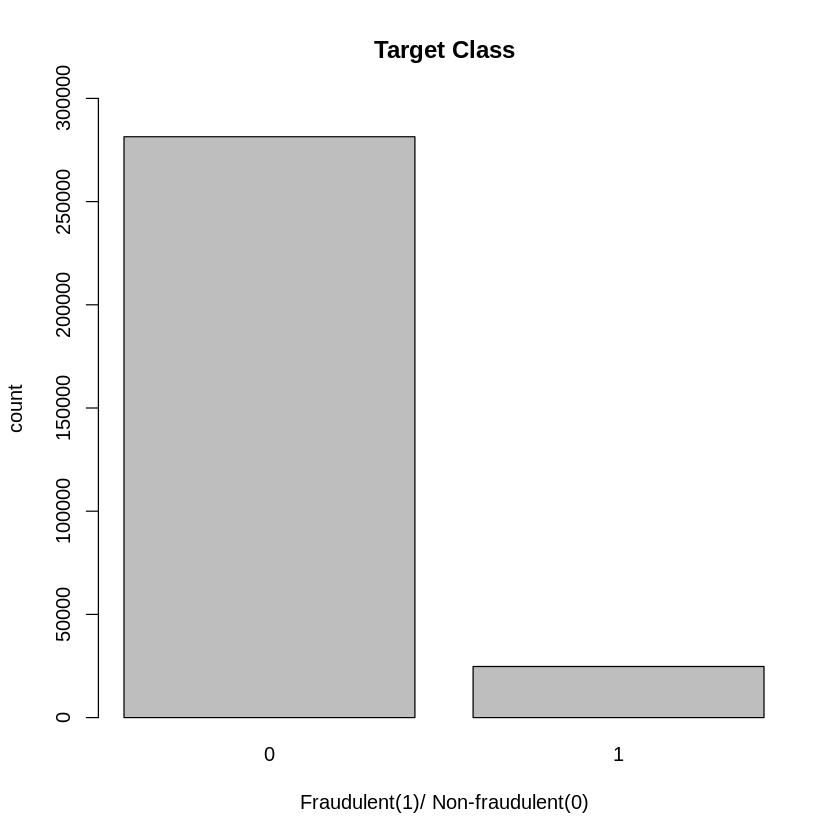

In [ ]:
# Simple Bar Plot
count <- table(cd2$TARGET)
barplot(count, main="Target Class",xlab="Fraudulent(1)/ Non-fraudulent(0)", ylab='count', ylim= c(0,300000))

In [ ]:
#Convert all chr datatype columns to factor
cd2 = as.data.frame(unclass(cd2),stringsAsFactors = TRUE)

In [ ]:
str(cd2)

'data.frame':	306199 obs. of  63 variables:
 $ TARGET                     : int  1 0 0 0 0 0 0 0 0 0 ...
 $ NAME_CONTRACT_TYPE         : Factor w/ 2 levels "Cash loans","Revolving loans": 1 1 2 1 1 1 1 1 1 2 ...
 $ FLAG_OWN_CAR               : Factor w/ 2 levels "N","Y": 1 1 2 1 1 1 2 2 1 1 ...
 $ FLAG_OWN_REALTY            : Factor w/ 2 levels "N","Y": 2 1 2 2 2 2 2 2 2 2 ...
 $ CNT_CHILDREN               : int  0 0 0 0 0 0 1 0 0 0 ...
 $ AMT_INCOME_TOTAL           : num  202500 270000 67500 135000 121500 ...
 $ AMT_CREDIT                 : num  406598 1293502 135000 312682 513000 ...
 $ AMT_ANNUITY                : num  24700 35698 6750 29686 21866 ...
 $ AMT_GOODS_PRICE            : num  351000 1129500 135000 297000 513000 ...
 $ NAME_TYPE_SUITE            : Factor w/ 8 levels "","Children",..: 8 3 8 8 8 7 8 8 2 8 ...
 $ NAME_INCOME_TYPE           : Factor w/ 8 levels "Businessman",..: 8 5 8 8 8 5 2 5 4 8 ...
 $ NAME_EDUCATION_TYPE        : Factor w/ 5 levels "Academic degree",..: 5

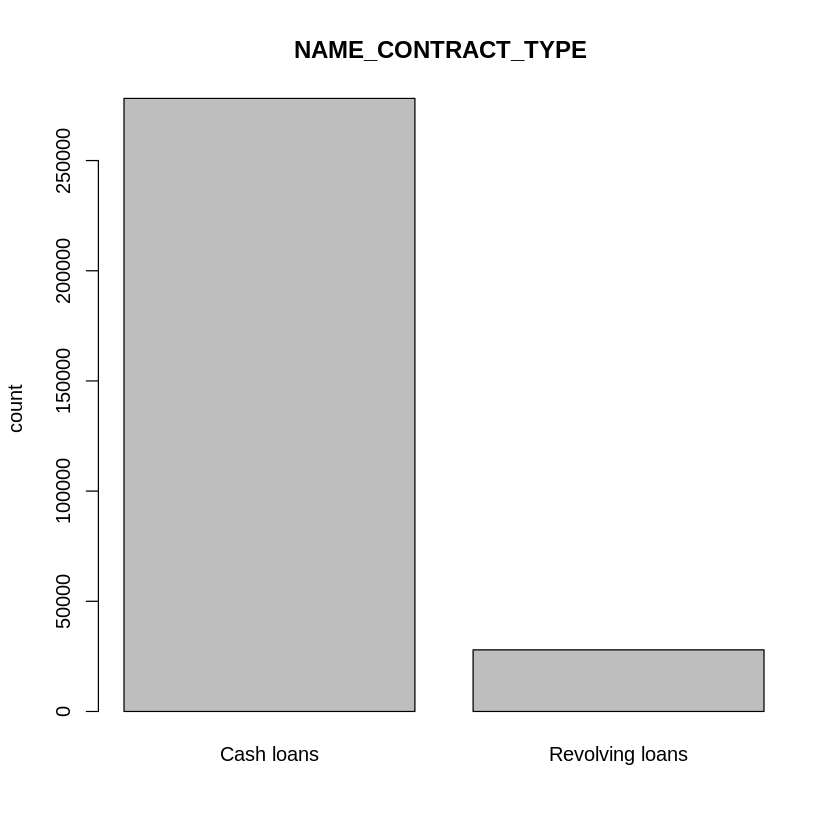

In [ ]:
count <- table(cd2$NAME_CONTRACT_TYPE)
barplot(count, main="NAME_CONTRACT_TYPE", ylab='count')

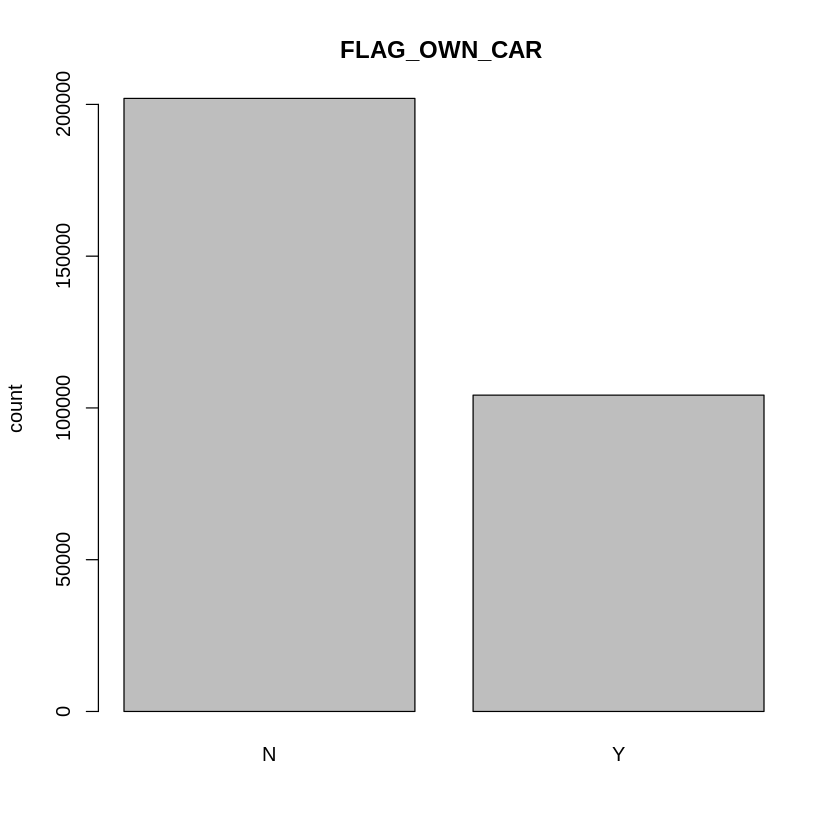

In [ ]:
count <- table(cd2$FLAG_OWN_CAR)
barplot(count, main="FLAG_OWN_CAR", ylab='count')

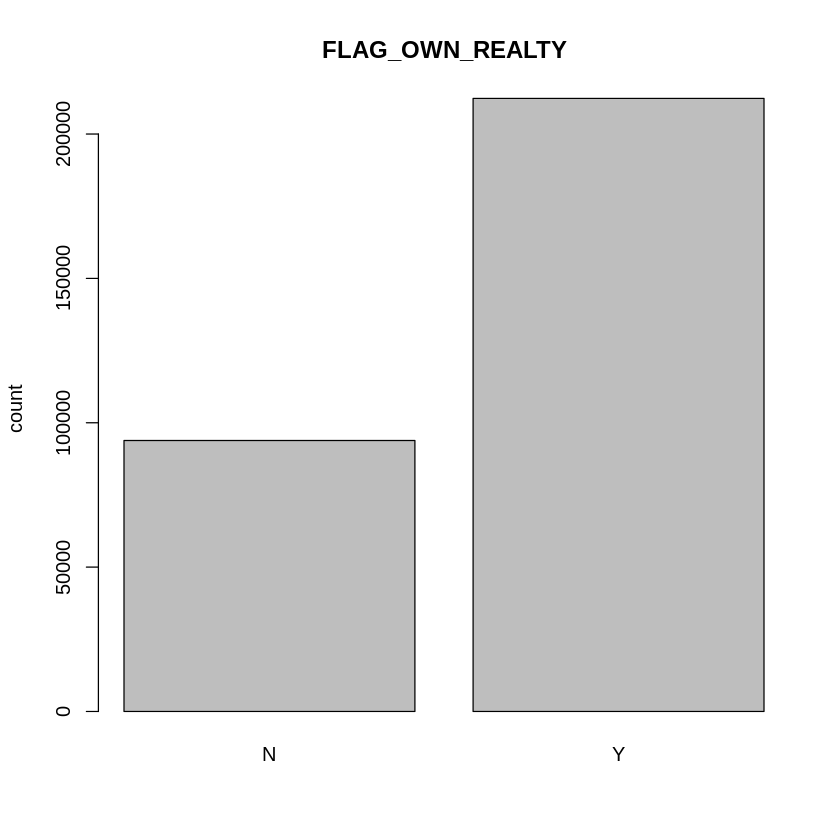

In [ ]:
count <- table(cd2$FLAG_OWN_REALTY)
barplot(count, main="FLAG_OWN_REALTY", ylab='count')

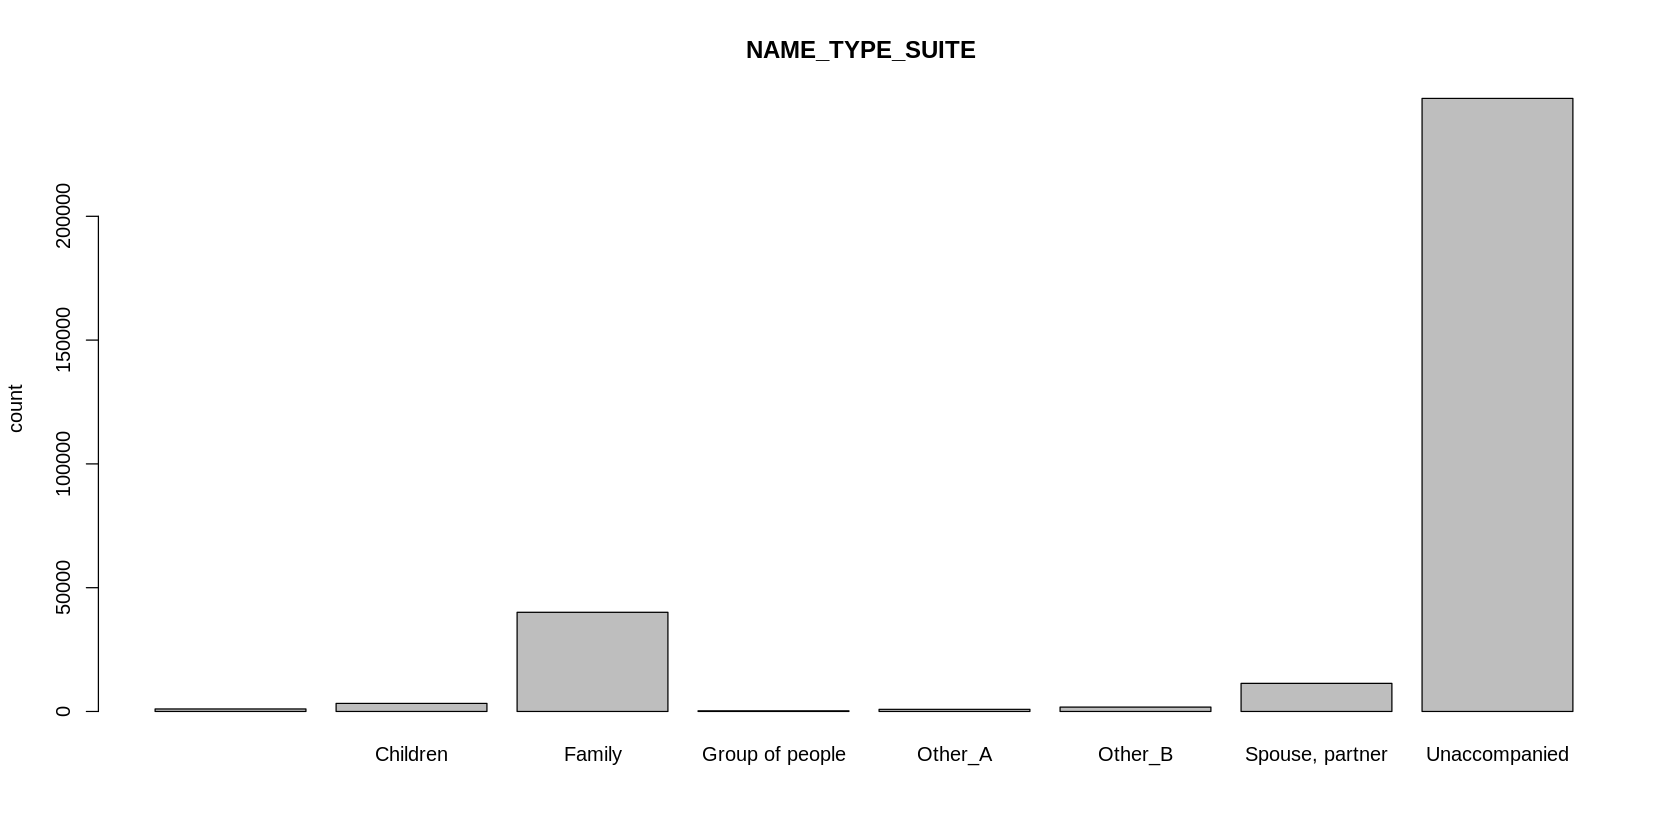

In [ ]:
library(repr)
options(repr.plot.width=14, repr.plot.height=7)
count <- table(cd2$NAME_TYPE_SUITE)
barplot(count, main="NAME_TYPE_SUITE", ylab='count')

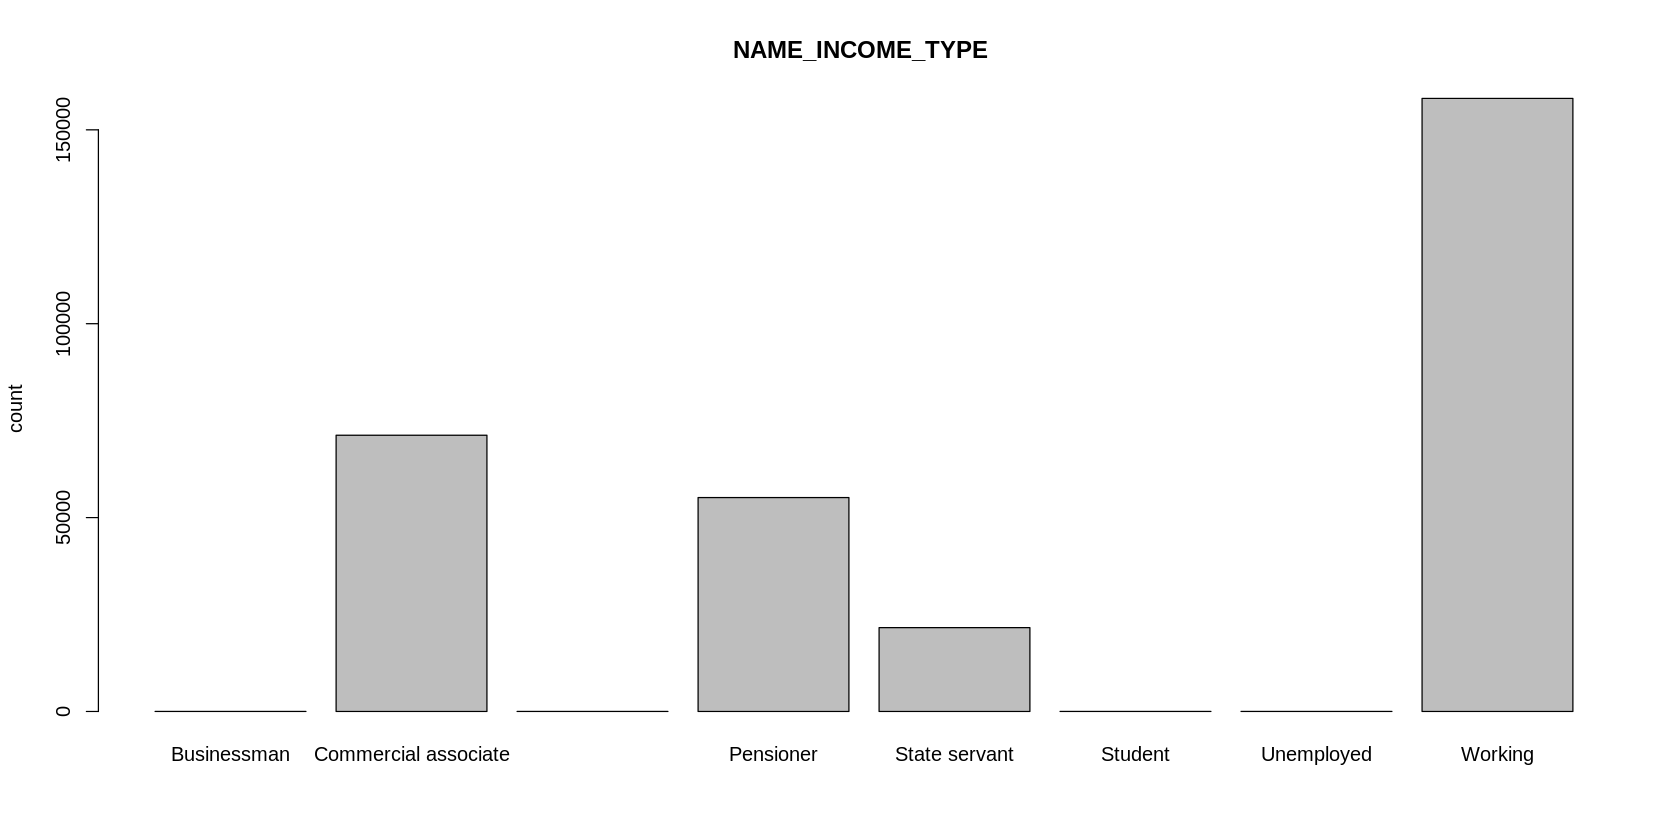

In [ ]:
options(repr.plot.width=14, repr.plot.height=7)
count <- table(cd2$NAME_INCOME_TYPE)
barplot(count, main="NAME_INCOME_TYPE", ylab='count')

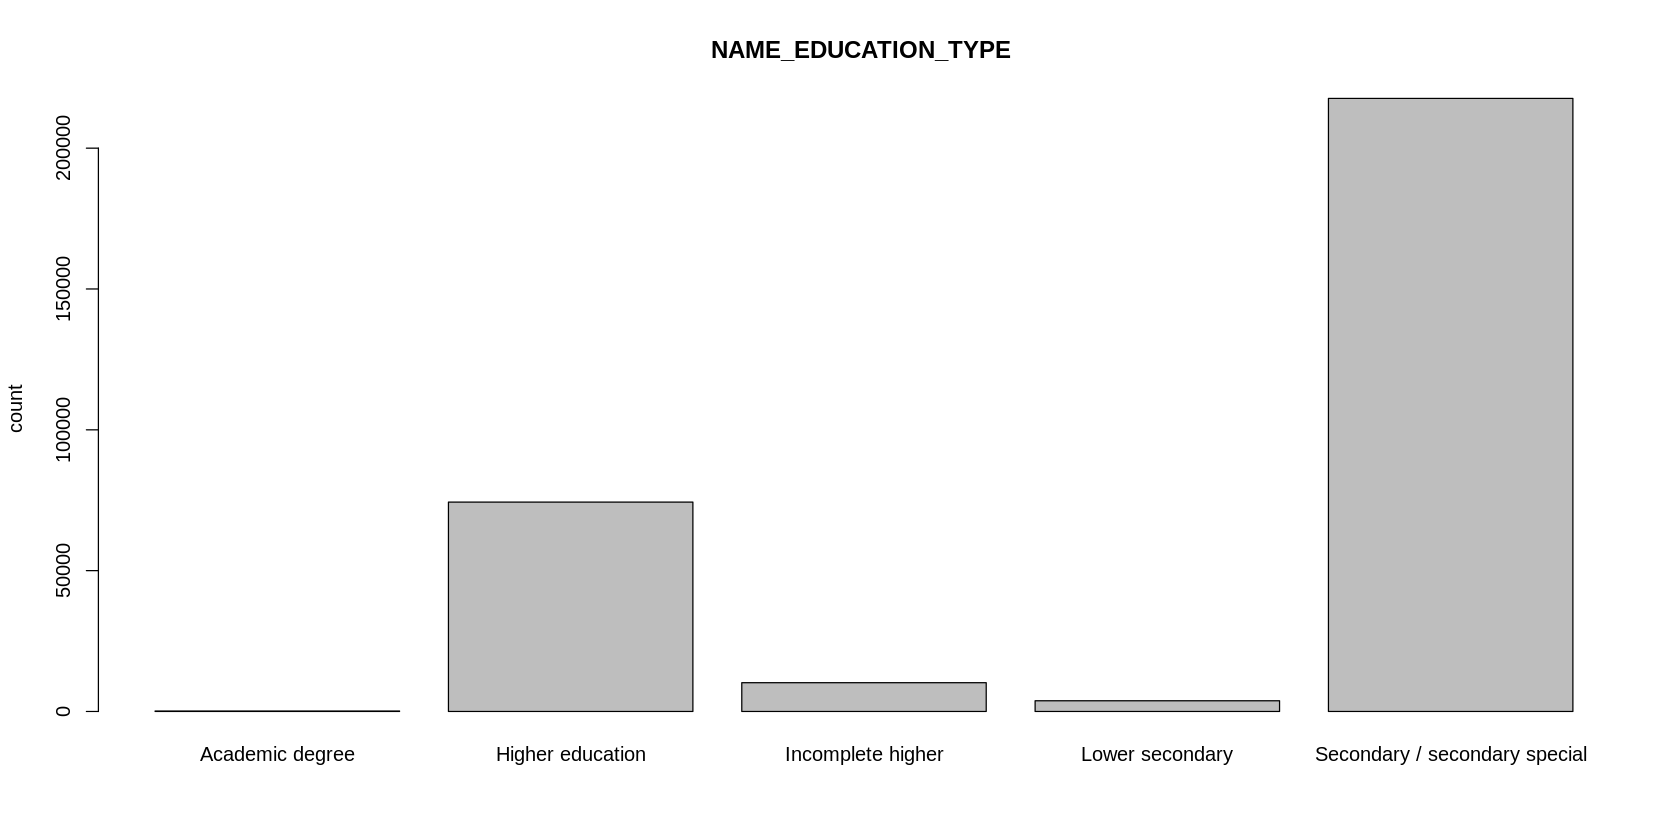

In [ ]:
options(repr.plot.width=14, repr.plot.height=7)
count <- table(cd2$NAME_EDUCATION_TYPE)
barplot(count, main="NAME_EDUCATION_TYPE", ylab='count')

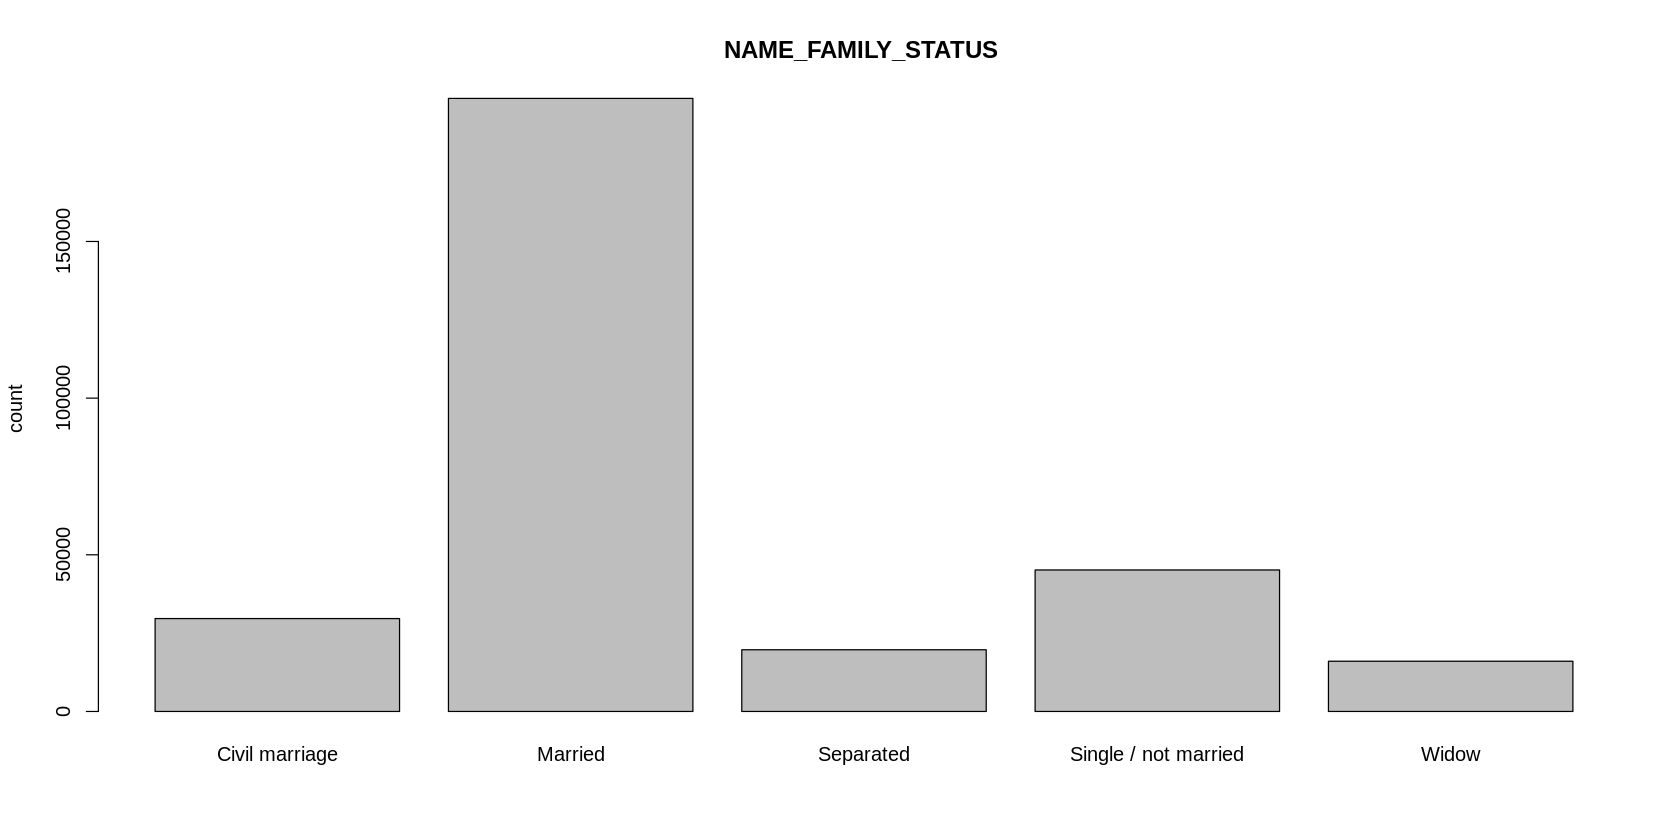

In [ ]:
options(repr.plot.width=14, repr.plot.height=7)
count <- table(cd2$NAME_FAMILY_STATUS)
barplot(count, main="NAME_FAMILY_STATUS", ylab='count')

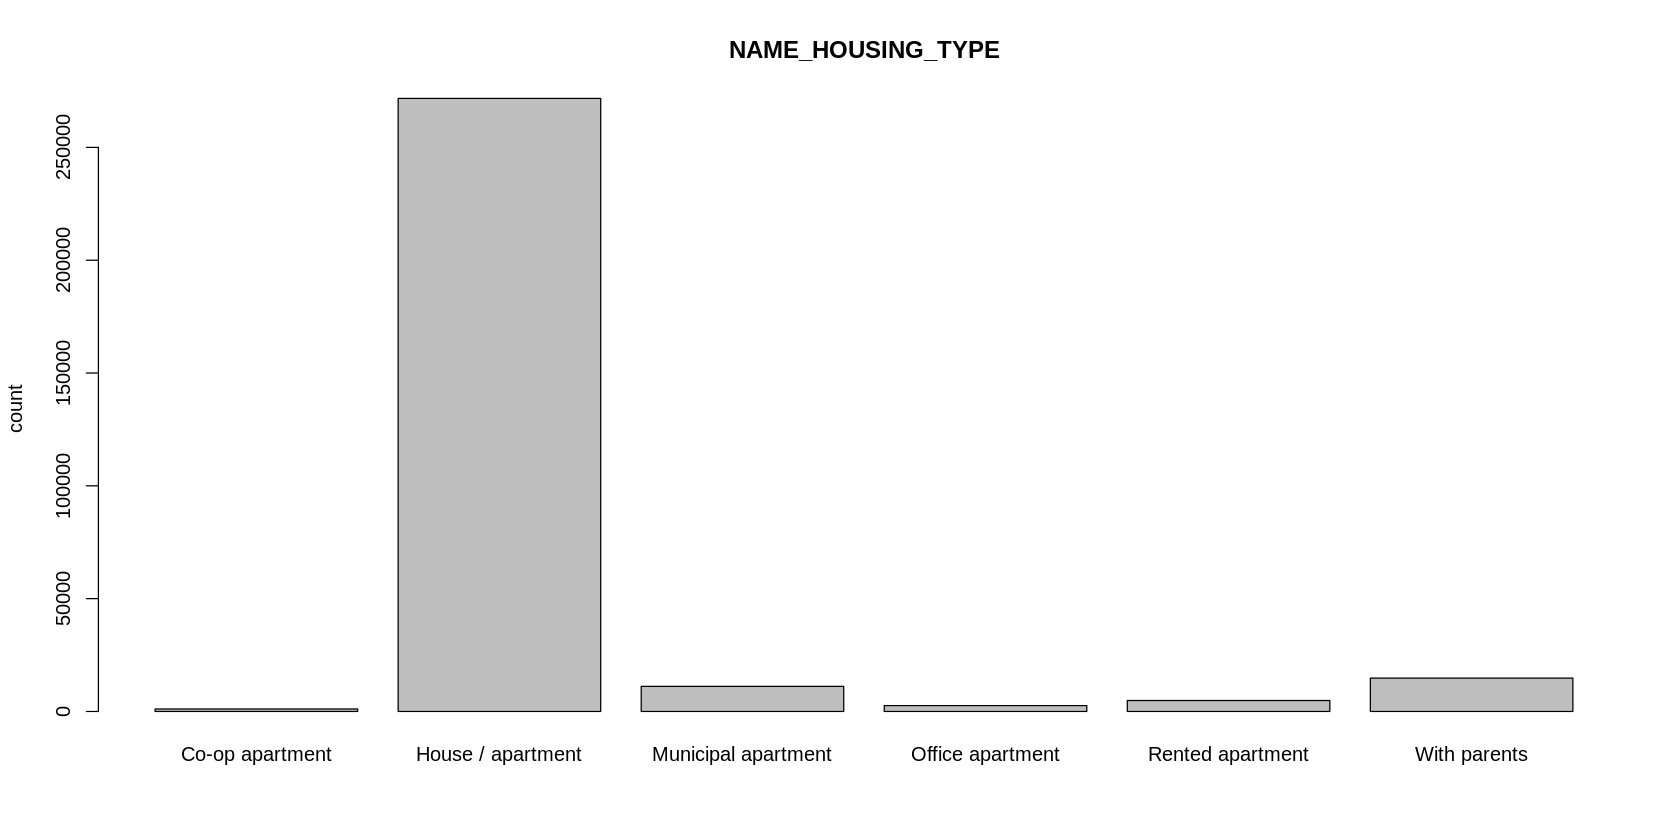

In [ ]:
options(repr.plot.width=14, repr.plot.height=7)
count <- table(cd2$NAME_HOUSING_TYPE)
barplot(count, main="NAME_HOUSING_TYPE", ylab='count')

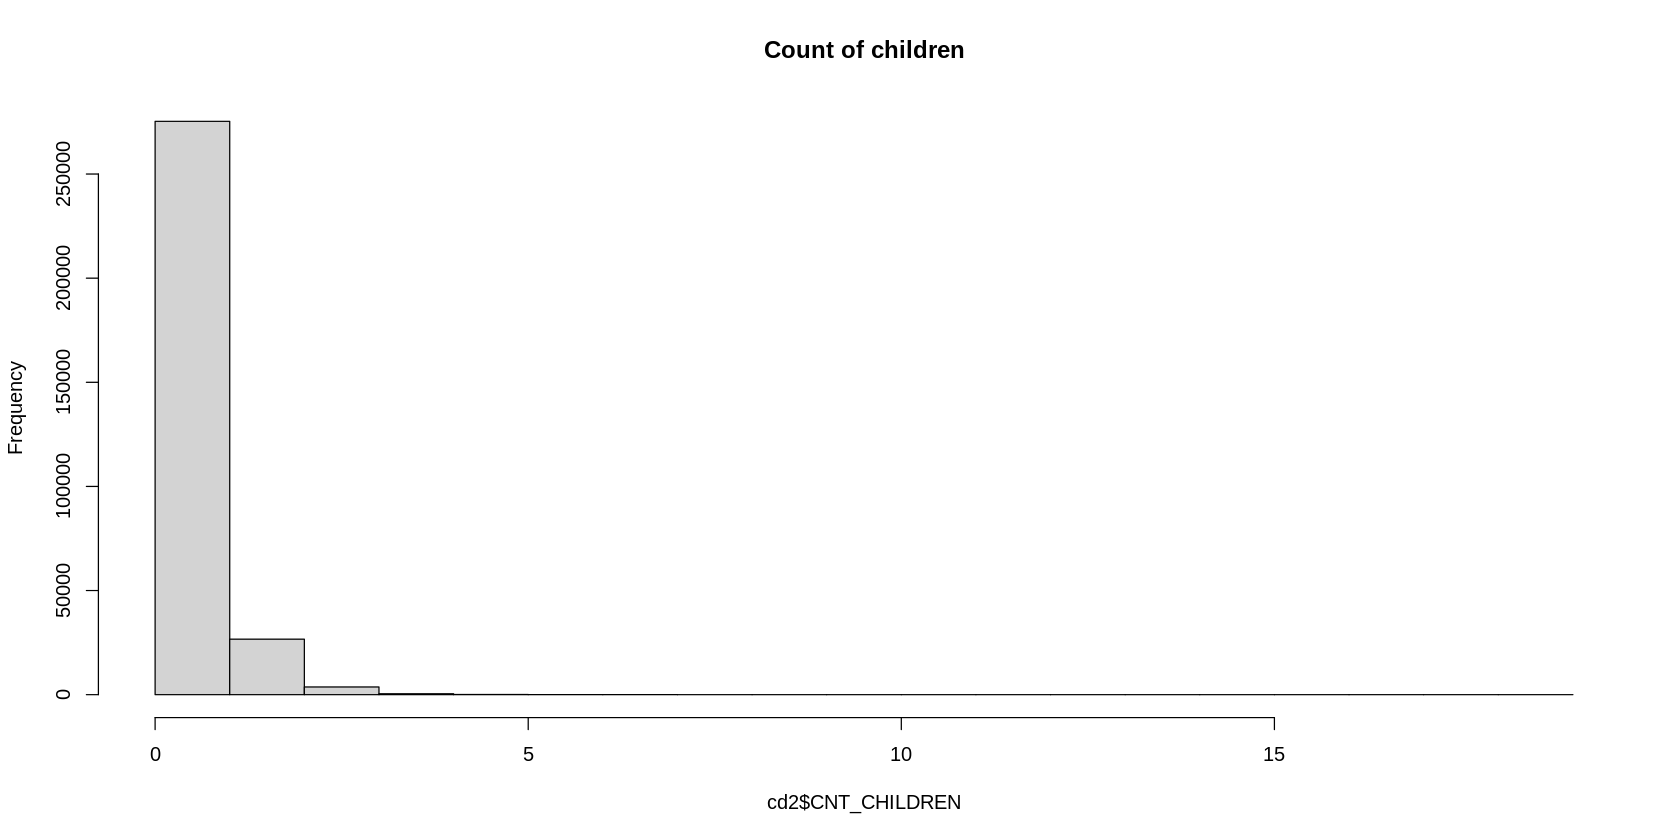

In [ ]:
options(repr.plot.width=14, repr.plot.height=7)
hist(cd2$CNT_CHILDREN,main='Count of children')

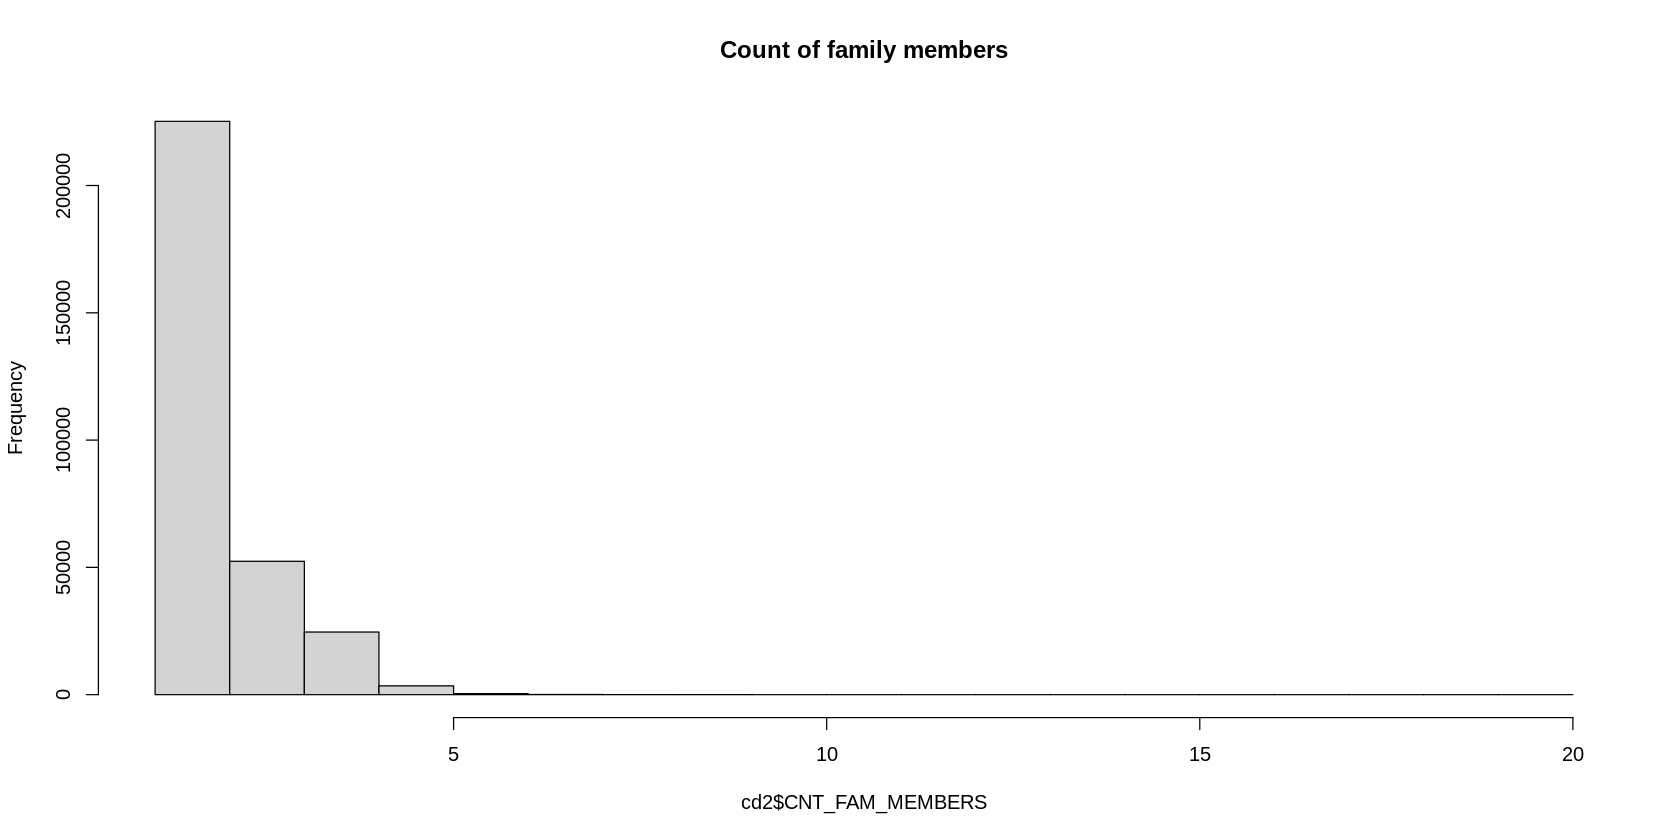

In [ ]:
hist(cd2$CNT_FAM_MEMBERS,main='Count of family members')

In [ ]:
install.packages('rpart')
install.packages('rpart.plot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rpart)
library(rpart.plot)

In [ ]:
cd2$TARGET = as.factor(cd2$TARGET)

In [ ]:
#Using the caret package, use createDataPartition to perform an 80/20 test-train split (80% training and 20% testing)
datapart = createDataPartition(y=cd2$TARGET,p=0.8,list=FALSE)
#Training Data
traindata = cd2[datapart,]
#Testing Data
testdata = cd2[-datapart,]

In [ ]:
table(traindata$TARGET)


     0      1 
225145  19815 

In [ ]:
table(testdata$TARGET)


    0     1 
56286  4953 

In [ ]:
logistic_model <- glm(TARGET ~ ., traindata, family='binomial')

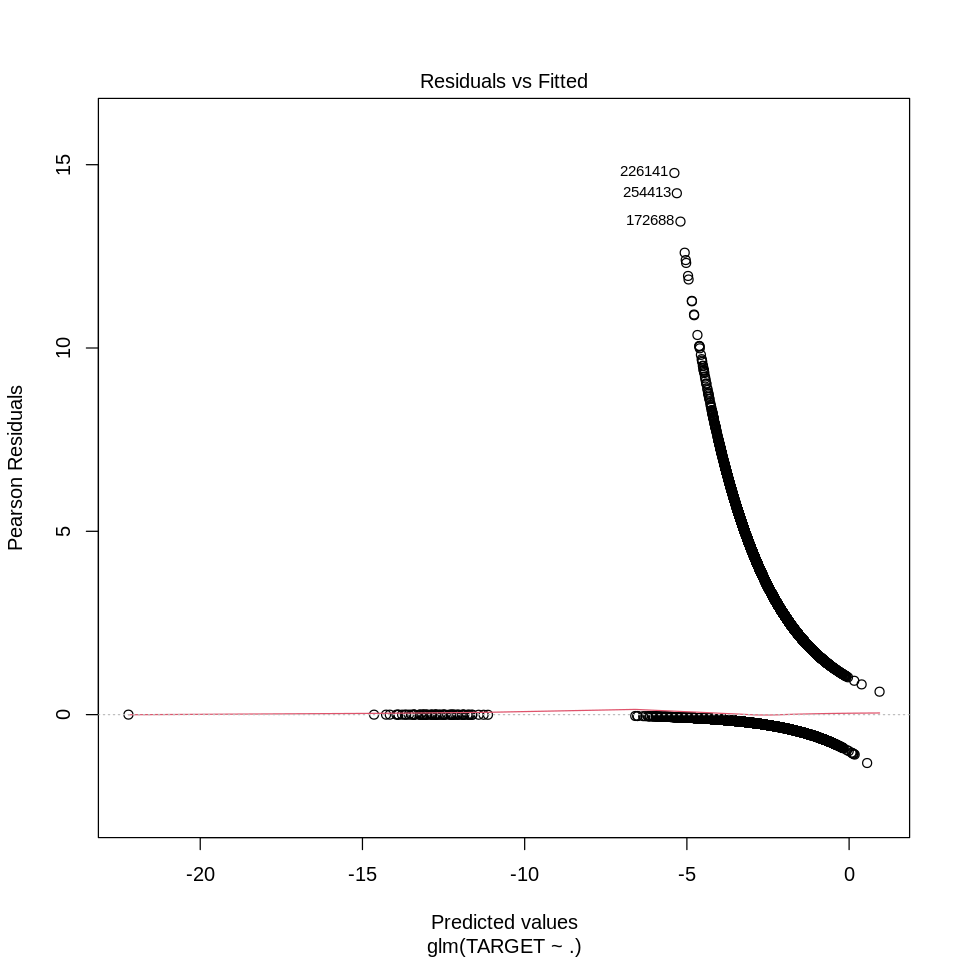

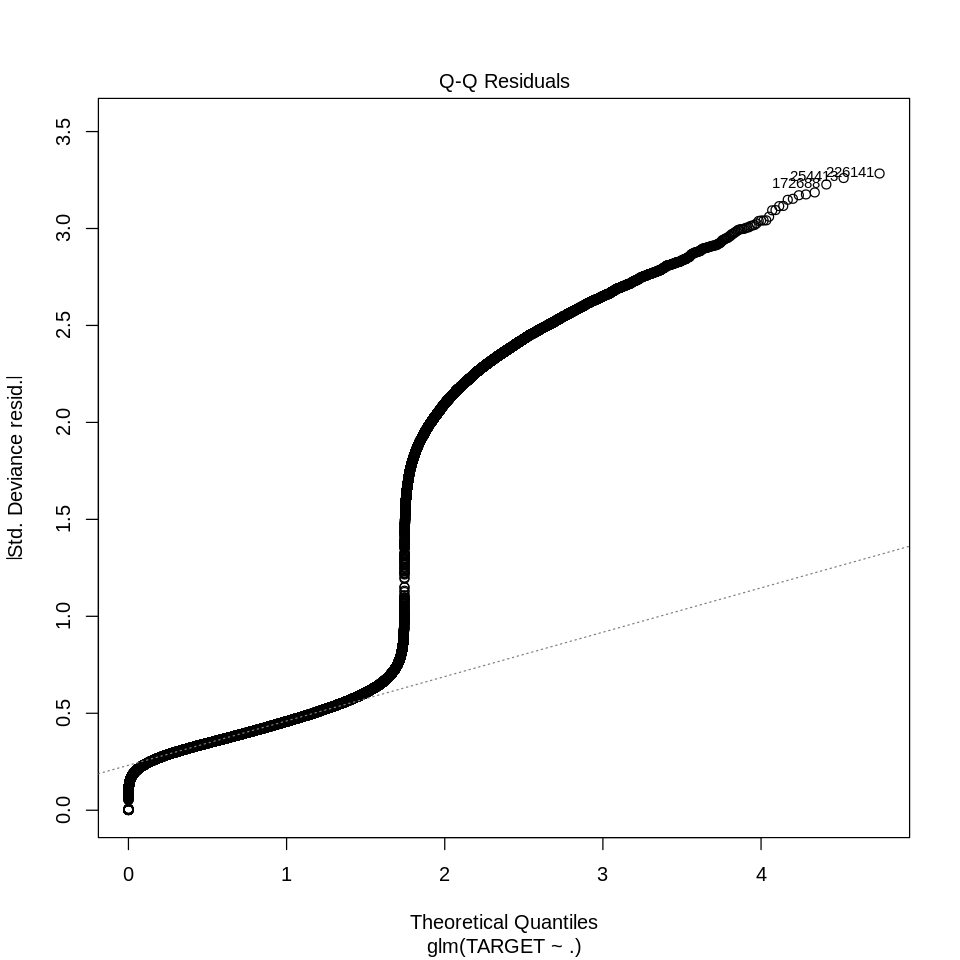

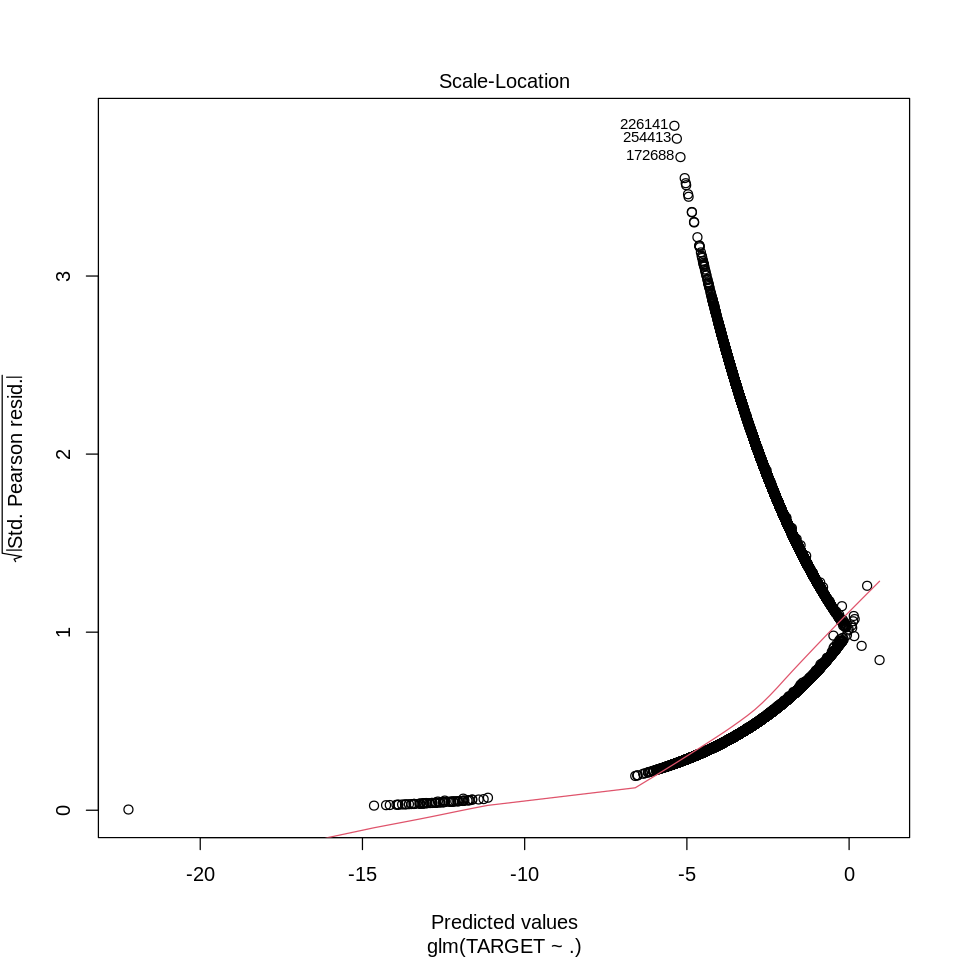

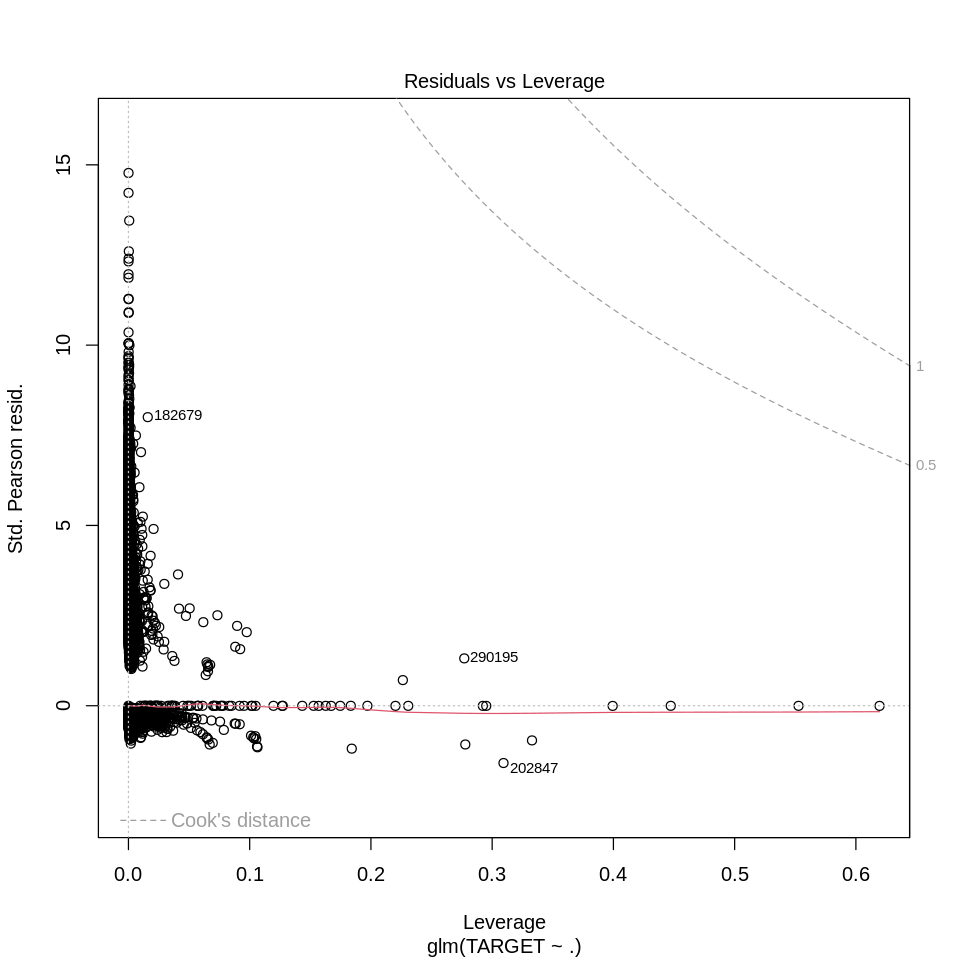

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
plot(logistic_model)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



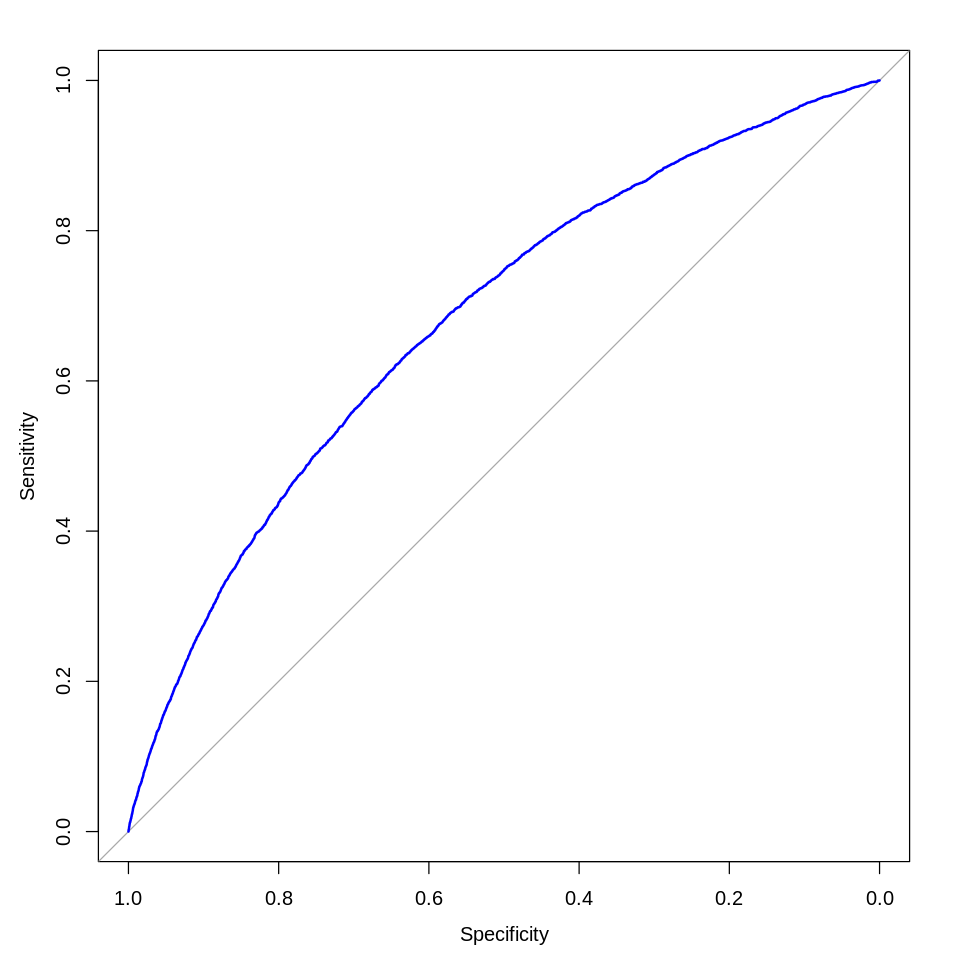

In [ ]:
library(pROC)
options(repr.plot.width=8, repr.plot.height=8)
lr.predict = predict(logistic_model,testdata, probability = TRUE)
auc.gbm = roc(testdata$TARGET, lr.predict, plot = TRUE, col = "blue", print.auc = TRUE)

In [ ]:
prob=predict(logistic_model,testdata,type='response')
ans=ifelse(prob>0.5,'1','0')
confusionMatrix(as.factor(ans),testdata$TARGET)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 56282  4952
         1     4     1
                                          
               Accuracy : 0.9191          
                 95% CI : (0.9169, 0.9212)
    No Information Rate : 0.9191          
    P-Value [Acc > NIR] : 0.5215          
                                          
                  Kappa : 2e-04           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9999289       
            Specificity : 0.0002019       
         Pos Pred Value : 0.9191299       
         Neg Pred Value : 0.2000000       
             Prevalence : 0.9191202       
         Detection Rate : 0.9190549       
   Detection Prevalence : 0.9999184       
      Balanced Accuracy : 0.5000654       
                                          
       'Positive' Class : 0               
                  

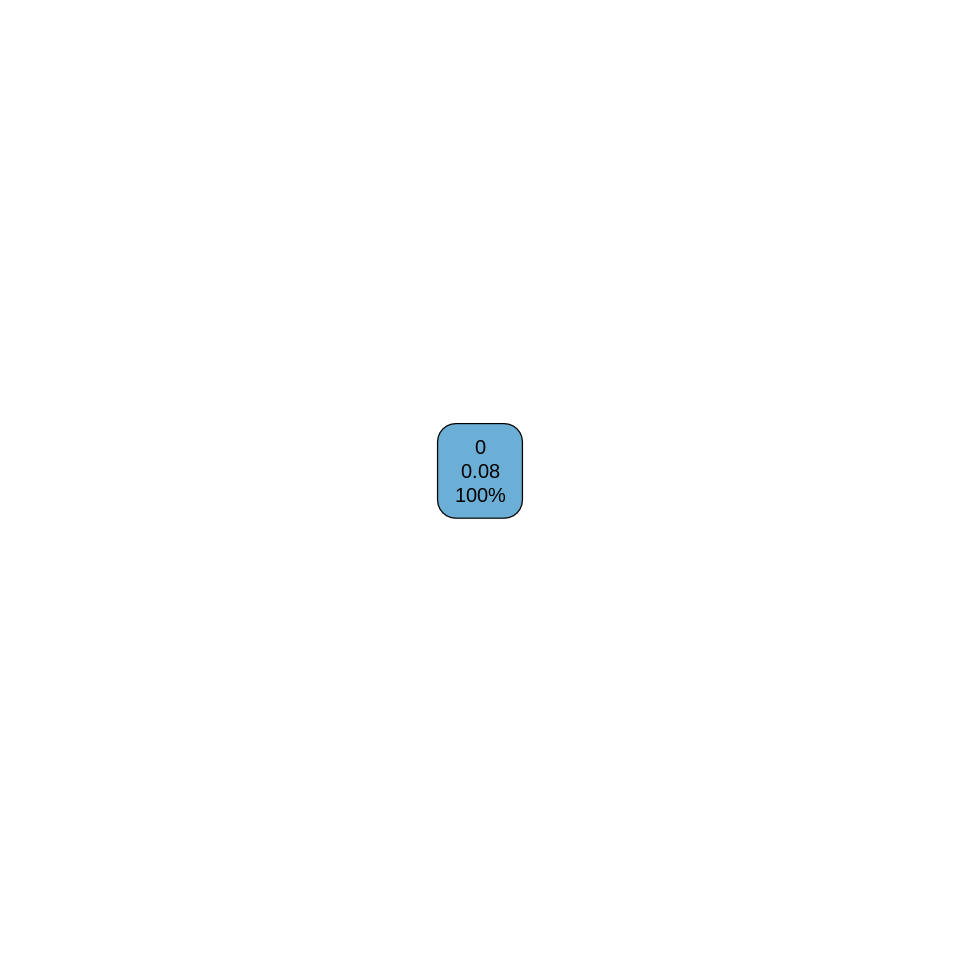

In [ ]:
dt <- rpart(TARGET ~ . , traindata, method = 'class')
predicted_val <- predict(dt, traindata, type = 'class')
probability <- predict(dt, traindata, type = 'prob')
rpart.plot(dt)

In [ ]:
#Convert All Categorical Variables to Numeric
cd2[sapply(cd2, is.factor)] = data.matrix(cd2[sapply(cd2, is.factor)])

In [ ]:
str(cd2)

'data.frame':	306199 obs. of  63 variables:
 $ TARGET                     : int  2 1 1 1 1 1 1 1 1 1 ...
 $ NAME_CONTRACT_TYPE         : int  1 1 2 1 1 1 1 1 1 2 ...
 $ FLAG_OWN_CAR               : int  1 1 2 1 1 1 2 2 1 1 ...
 $ FLAG_OWN_REALTY            : int  2 1 2 2 2 2 2 2 2 2 ...
 $ CNT_CHILDREN               : int  0 0 0 0 0 0 1 0 0 0 ...
 $ AMT_INCOME_TOTAL           : num  202500 270000 67500 135000 121500 ...
 $ AMT_CREDIT                 : num  406598 1293502 135000 312682 513000 ...
 $ AMT_ANNUITY                : num  24700 35698 6750 29686 21866 ...
 $ AMT_GOODS_PRICE            : num  351000 1129500 135000 297000 513000 ...
 $ NAME_TYPE_SUITE            : int  8 3 8 8 8 7 8 8 2 8 ...
 $ NAME_INCOME_TYPE           : int  8 5 8 8 8 5 2 5 4 8 ...
 $ NAME_EDUCATION_TYPE        : int  5 2 5 5 5 5 2 2 5 5 ...
 $ NAME_FAMILY_STATUS         : int  4 2 4 1 4 2 2 2 2 4 ...
 $ NAME_HOUSING_TYPE          : int  2 2 2 2 2 2 2 2 2 2 ...
 $ REGION_POPULATION_RELATIVE : num  0.0188 0.0

In [ ]:
train_smote = SMOTE(cd2[,-1],cd2$TARGET)

In [ ]:
smotecd2 = train_smote$data

In [ ]:
smotecd2$class = as.factor(smotecd2$class)

In [ ]:
table(smotecd2$class)


     1      2 
281431 272448 

In [ ]:
write.csv(smotecd2,'/content/smotecd2.csv')

In [ ]:
str(smotecd2)

'data.frame':	553879 obs. of  63 variables:
 $ NAME_CONTRACT_TYPE         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ FLAG_OWN_CAR               : num  1 1 1 2 2 2 1 1 2 1 ...
 $ FLAG_OWN_REALTY            : num  2 2 2 2 2 1 2 2 2 2 ...
 $ CNT_CHILDREN               : num  1 0 0 0 0 1 0 1 0 0 ...
 $ AMT_INCOME_TOTAL           : num  135000 90000 252000 157500 202500 ...
 $ AMT_CREDIT                 : num  863226 675000 906660 497520 540000 ...
 $ AMT_ANNUITY                : num  36702 19071 36531 36184 33034 ...
 $ AMT_GOODS_PRICE            : num  697500 675000 675000 450000 540000 ...
 $ NAME_TYPE_SUITE            : num  3 8 3 8 3 8 8 8 8 8 ...
 $ NAME_INCOME_TYPE           : num  8 2 4 2 2 8 8 8 2 8 ...
 $ NAME_EDUCATION_TYPE        : num  5 5 5 5 5 5 5 5 5 5 ...
 $ NAME_FAMILY_STATUS         : num  2 4 1 1 2 1 2 3 4 2 ...
 $ NAME_HOUSING_TYPE          : num  4 2 2 2 2 6 2 2 2 2 ...
 $ REGION_POPULATION_RELATIVE : num  0.01863 0.03133 0.00496 0.00251 0.02516 ...
 $ DAYS_BIRTH               

In [ ]:
#Using the caret package, use createDataPartition to perform an 80/20 test-train split (80% training and 20% testing)
datapartsmote = createDataPartition(y=smotecd2$class,p=0.8,list=FALSE)
#Training Data
traindatasmote = smotecd2[datapartsmote,]
#Testing Data
testdatasmote = smotecd2[-datapartsmote,]

In [ ]:
table(traindatasmote$class)


     1      2 
225173 217931 

In [ ]:
table(testdatasmote$class)


    1     2 
56258 54517 

In [ ]:
logistic_model_smote <- glm(traindatasmote$class ~ ., traindatasmote, family='binomial')

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


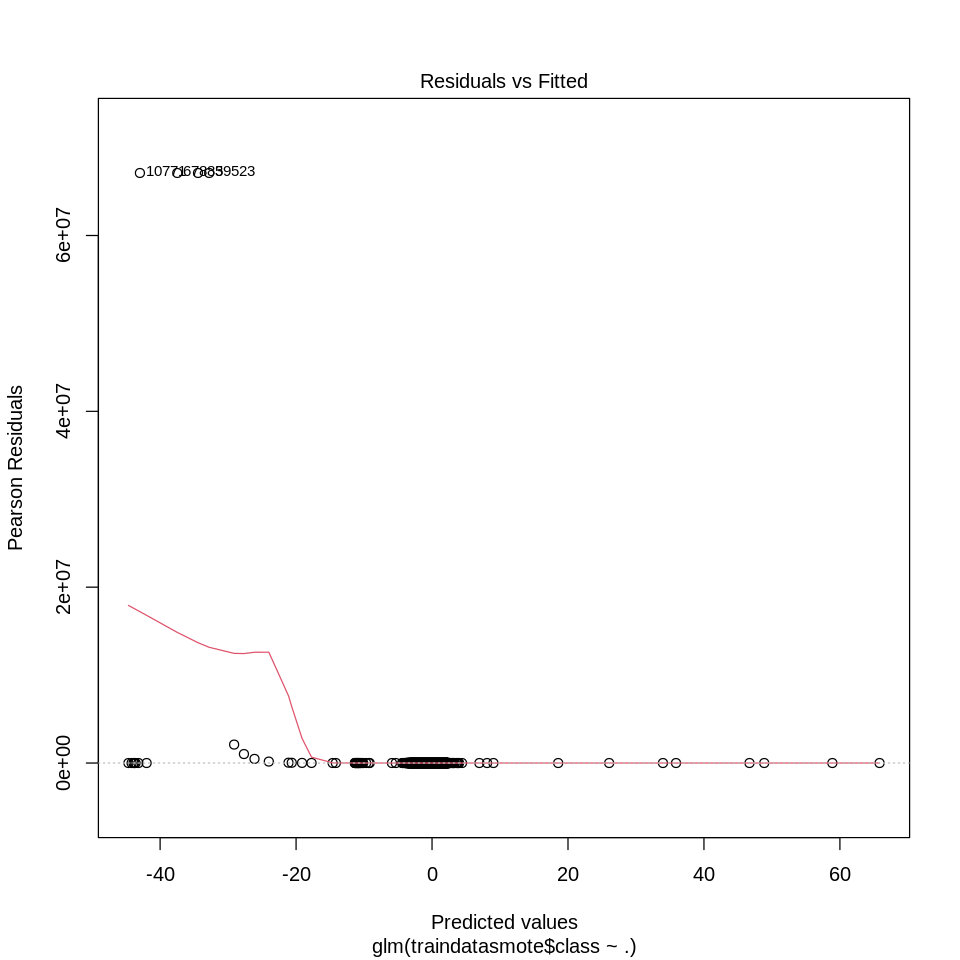

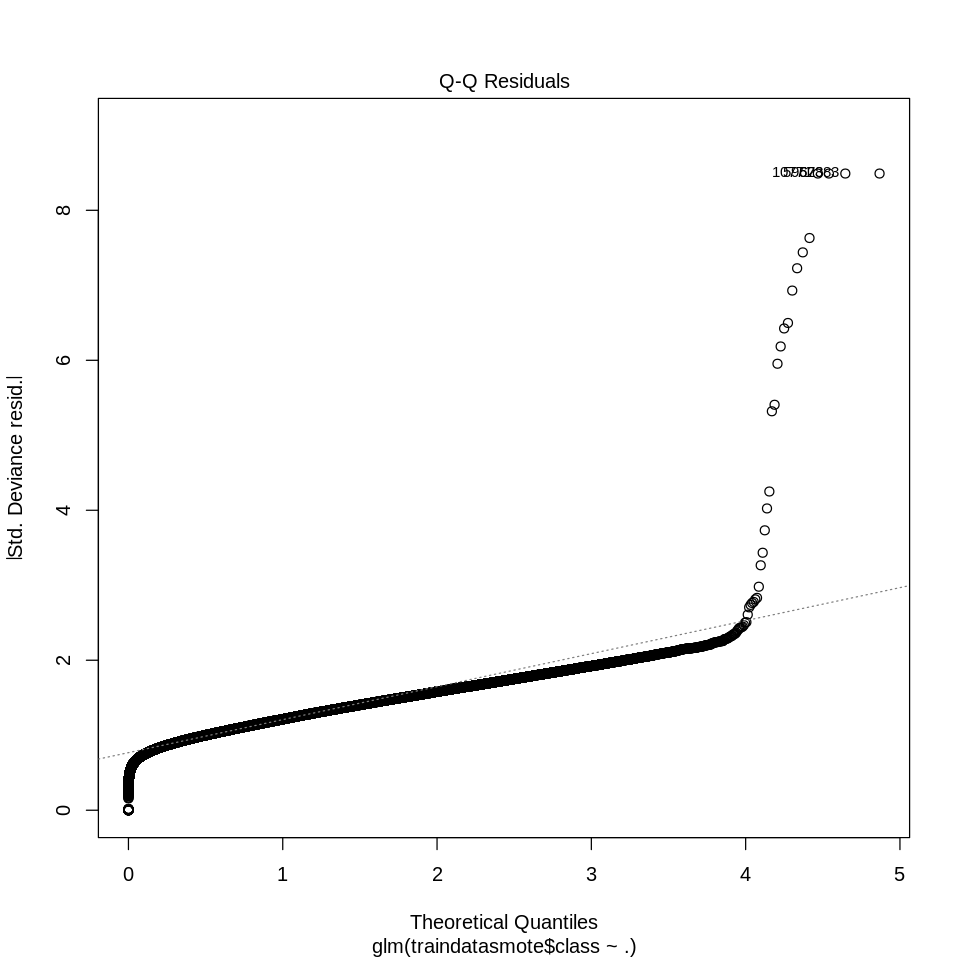

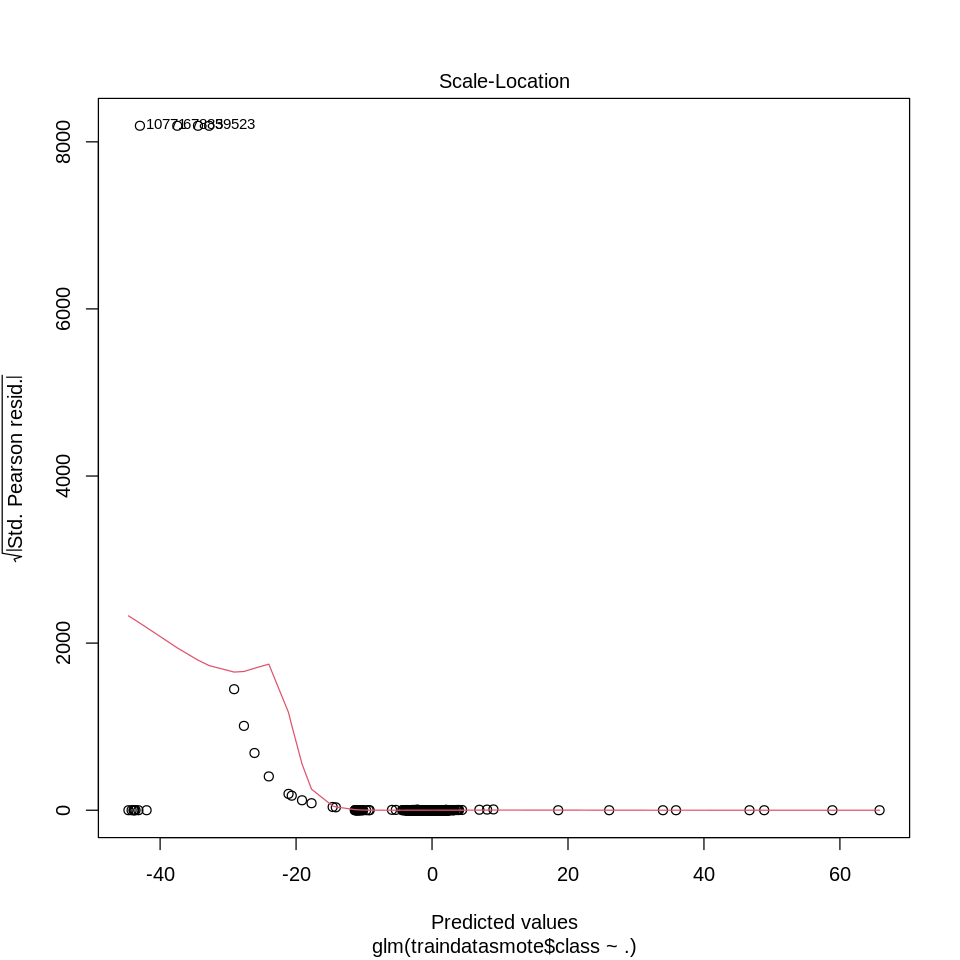

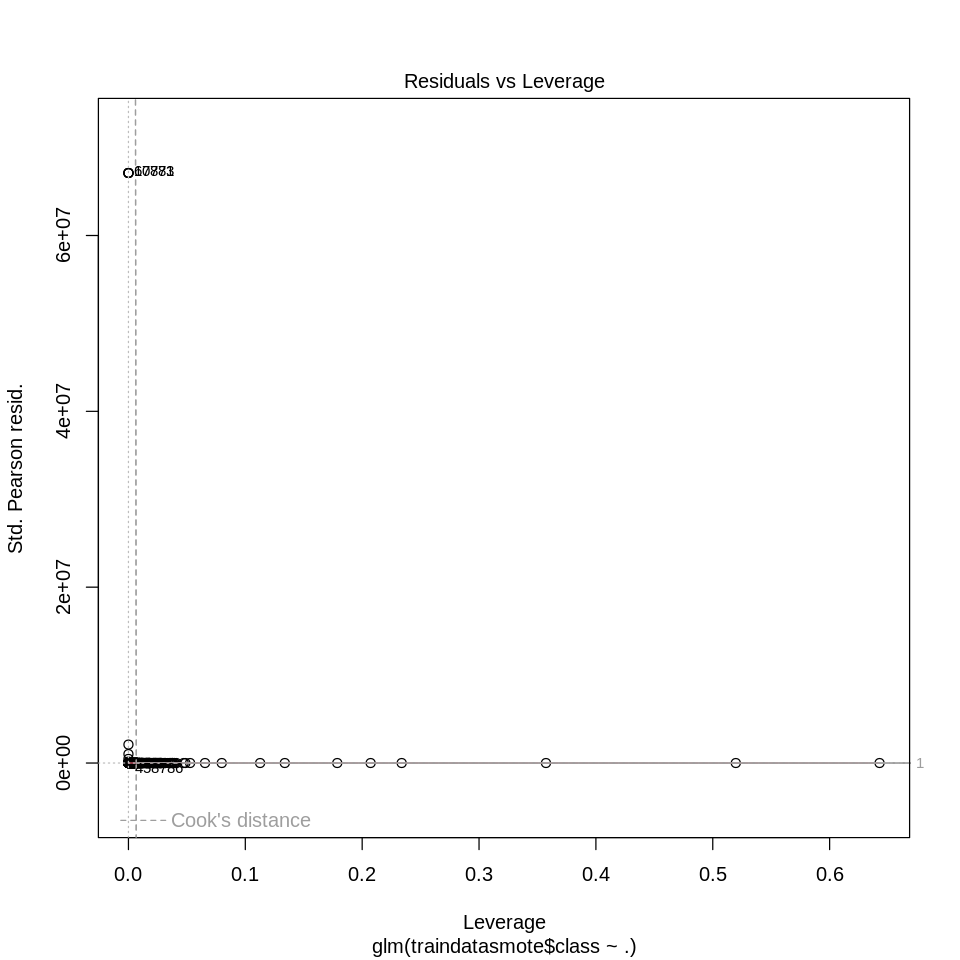

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
plot(logistic_model_smote)

Setting levels: control = 1, case = 2

Setting direction: controls < cases



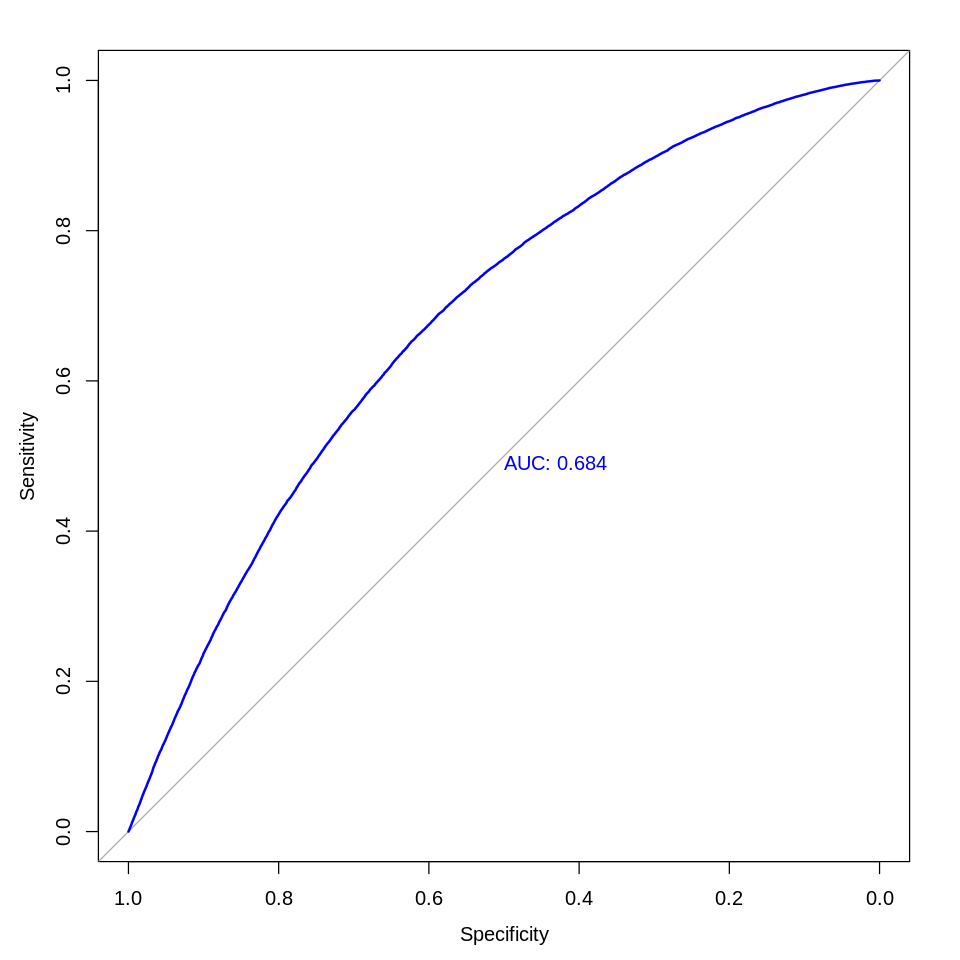

In [ ]:
library(pROC)
options(repr.plot.width=8, repr.plot.height=8)
lr.predict = predict(logistic_model_smote,testdatasmote, probability = TRUE)
auc.gbm = roc(testdatasmote$class, lr.predict, plot = TRUE, col = "blue", print.auc = TRUE)

In [ ]:
prob=predict(logistic_model_smote,testdatasmote,type='response')
ans=ifelse(prob>0.5,'2','1')
confusionMatrix(as.factor(ans),testdatasmote$class)

Confusion Matrix and Statistics

          Reference
Prediction     1     2
         1 36096 20082
         2 20190 34407
                                          
               Accuracy : 0.6365          
                 95% CI : (0.6336, 0.6393)
    No Information Rate : 0.5081          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.2727          
                                          
 Mcnemar's Test P-Value : 0.5939          
                                          
            Sensitivity : 0.6413          
            Specificity : 0.6314          
         Pos Pred Value : 0.6425          
         Neg Pred Value : 0.6302          
             Prevalence : 0.5081          
         Detection Rate : 0.3258          
   Detection Prevalence : 0.5071          
      Balanced Accuracy : 0.6364          
                                          
       'Positive' Class : 1               
                  

In [ ]:
dt_smote = rpart(class ~ . , traindatasmote, method = 'class')

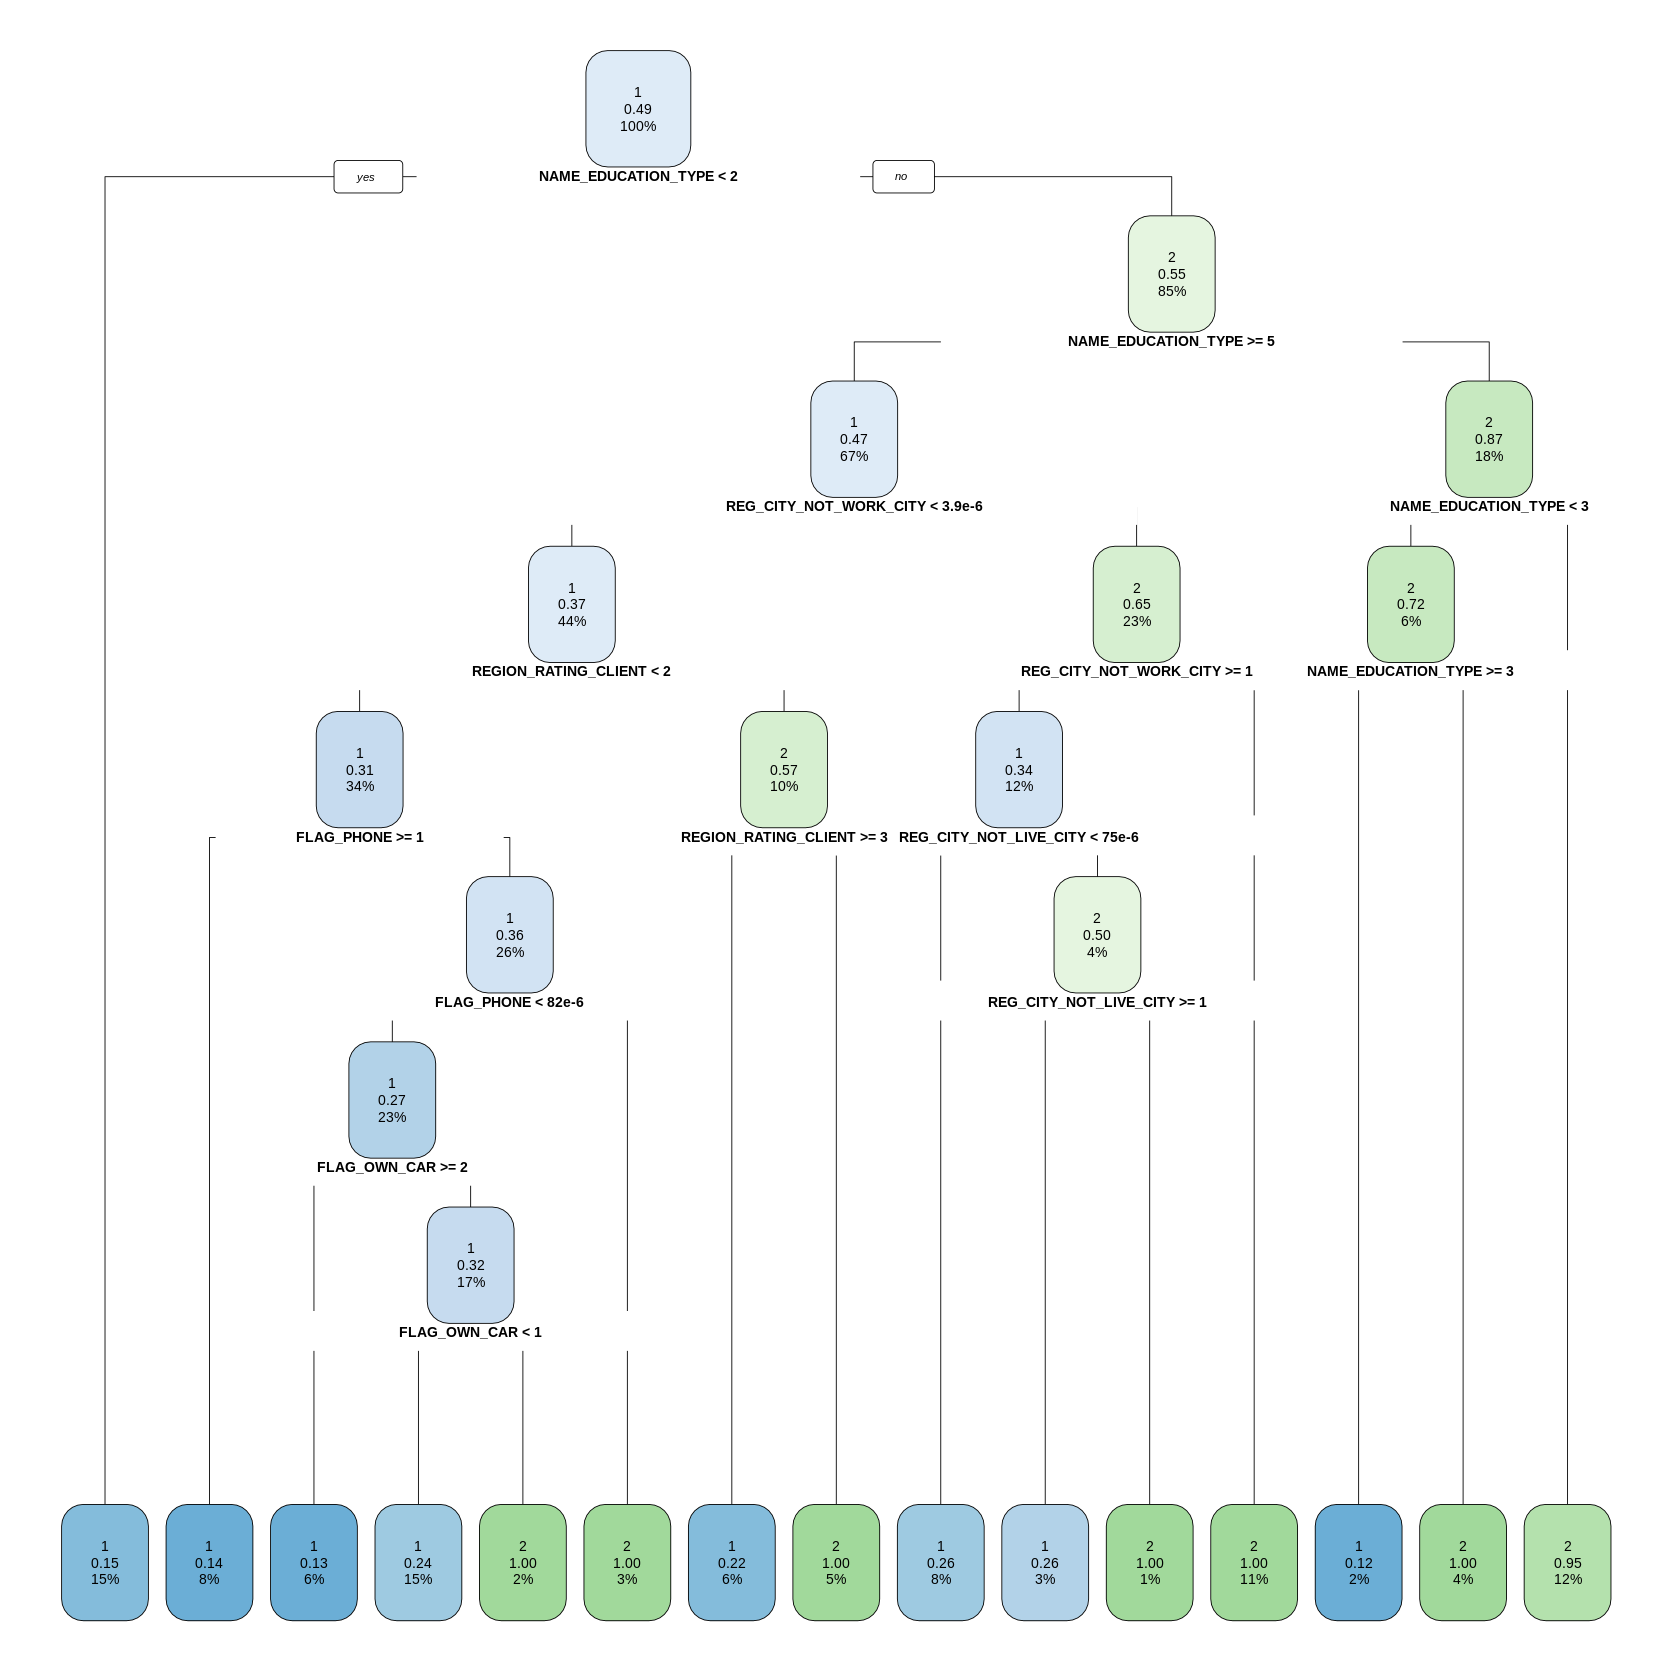

In [ ]:
options(repr.plot.width=14, repr.plot.height=14)
rpart.plot(dt_smote, cex = .7)

In [ ]:
install.packages('vip')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(vip)


Attaching package: ‘vip’


The following object is masked from ‘package:utils’:

    vi




In [ ]:
vi(dt_smote)

Variable,Importance
<chr>,<dbl>
NAME_EDUCATION_TYPE,4.950860e+04
REG_CITY_NOT_WORK_CITY,3.303368e+04
LIVE_CITY_NOT_WORK_CITY,2.682830e+04
REGION_RATING_CLIENT,2.267733e+04
FLAG_PHONE,1.725110e+04
REGION_RATING_CLIENT_W_CITY,1.699629e+04
REG_CITY_NOT_LIVE_CITY,1.244447e+04
FLAG_OWN_CAR,1.242587e+04
REGION_POPULATION_RELATIVE,3.878306e+03


In [ ]:
dt_pred = predict(dt_smote, testdatasmote, type = 'class')
confusionMatrix(dt_pred, testdatasmote$class)

Confusion Matrix and Statistics

          Reference
Prediction     1     2
         1 55630 13389
         2   656 41100
                                          
               Accuracy : 0.8732          
                 95% CI : (0.8712, 0.8752)
    No Information Rate : 0.5081          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7454          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9883          
            Specificity : 0.7543          
         Pos Pred Value : 0.8060          
         Neg Pred Value : 0.9843          
             Prevalence : 0.5081          
         Detection Rate : 0.5022          
   Detection Prevalence : 0.6231          
      Balanced Accuracy : 0.8713          
                                          
       'Positive' Class : 1               
                  

Setting direction: controls < cases



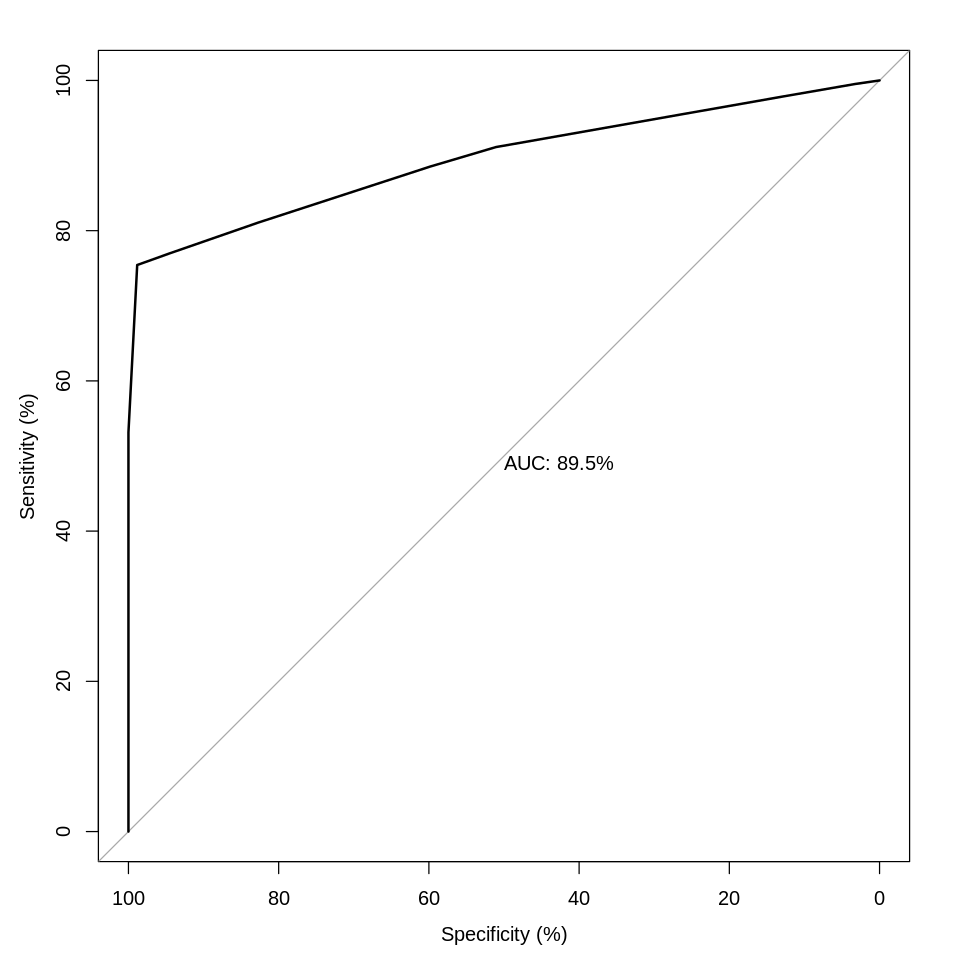

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
dt_prob = predict(dt_smote, testdatasmote,  probability = TRUE)
dt_prob <- dt_prob[,2]
r = multiclass.roc(testdatasmote$class, dt_prob, percent = TRUE)
roc <- r[['rocs']]
r1 <- roc[[1]]
plot.roc(r1, print.auc = TRUE)

In [ ]:
smotecd2=read.csv('/content/smotecd2.csv')

In [ ]:
#Using the caret package, use createDataPartition to perform an 80/20 test-train split (80% training and 20% testing)
datapartsmote = createDataPartition(y=smotecd2$class,p=0.8,list=FALSE)
#Training Data
traindatasmote = smotecd2[datapartsmote,]
#Testing Data
testdatasmote = smotecd2[-datapartsmote,]

In [ ]:
install.packages('Boruta')
library(Boruta)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘ranger’




In [ ]:
boruta.train = Boruta(class~., data = testdatasmote, doTrace = 2, maxRuns = 11)

 1. run of importance source...



Growing trees.. Progress: 19%. Estimated remaining time: 2 minutes, 13 seconds.
Growing trees.. Progress: 38%. Estimated remaining time: 1 minute, 42 seconds.
Growing trees.. Progress: 58%. Estimated remaining time: 1 minute, 8 seconds.
Growing trees.. Progress: 77%. Estimated remaining time: 36 seconds.
Growing trees.. Progress: 99%. Estimated remaining time: 1 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 39 seconds.
Computing permutation importance.. Progress: 20%. Estimated remaining time: 4 minutes, 11 seconds.
Computing permutation importance.. Progress: 29%. Estimated remaining time: 3 minutes, 52 seconds.
Computing permutation importance.. Progress: 39%. Estimated remaining time: 3 minutes, 17 seconds.
Computing permutation importance.. Progress: 50%. Estimated remaining time: 2 minutes, 38 seconds.
Computing permutation importance.. Progress: 61%. Estimated remaining time: 2 minutes, 0 seconds.
Computing permutation importance.

 2. run of importance source...



Growing trees.. Progress: 19%. Estimated remaining time: 2 minutes, 12 seconds.
Growing trees.. Progress: 38%. Estimated remaining time: 1 minute, 39 seconds.
Growing trees.. Progress: 57%. Estimated remaining time: 1 minute, 9 seconds.
Growing trees.. Progress: 76%. Estimated remaining time: 38 seconds.
Growing trees.. Progress: 94%. Estimated remaining time: 9 seconds.
Computing permutation importance.. Progress: 11%. Estimated remaining time: 4 minutes, 0 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 3 minutes, 47 seconds.
Computing permutation importance.. Progress: 33%. Estimated remaining time: 3 minutes, 10 seconds.
Computing permutation importance.. Progress: 44%. Estimated remaining time: 2 minutes, 42 seconds.
Computing permutation importance.. Progress: 55%. Estimated remaining time: 2 minutes, 10 seconds.
Computing permutation importance.. Progress: 66%. Estimated remaining time: 1 minute, 36 seconds.
Computing permutation importance..

 3. run of importance source...



Growing trees.. Progress: 20%. Estimated remaining time: 2 minutes, 5 seconds.
Growing trees.. Progress: 38%. Estimated remaining time: 1 minute, 41 seconds.
Growing trees.. Progress: 58%. Estimated remaining time: 1 minute, 8 seconds.
Growing trees.. Progress: 77%. Estimated remaining time: 37 seconds.
Growing trees.. Progress: 96%. Estimated remaining time: 7 seconds.
Computing permutation importance.. Progress: 11%. Estimated remaining time: 4 minutes, 21 seconds.
Computing permutation importance.. Progress: 23%. Estimated remaining time: 3 minutes, 32 seconds.
Computing permutation importance.. Progress: 33%. Estimated remaining time: 3 minutes, 14 seconds.
Computing permutation importance.. Progress: 43%. Estimated remaining time: 2 minutes, 43 seconds.
Computing permutation importance.. Progress: 55%. Estimated remaining time: 2 minutes, 8 seconds.
Computing permutation importance.. Progress: 66%. Estimated remaining time: 1 minute, 36 seconds.
Computing permutation importance.. 

 4. run of importance source...



Growing trees.. Progress: 19%. Estimated remaining time: 2 minutes, 10 seconds.
Growing trees.. Progress: 41%. Estimated remaining time: 1 minute, 27 seconds.
Growing trees.. Progress: 62%. Estimated remaining time: 56 seconds.
Growing trees.. Progress: 83%. Estimated remaining time: 25 seconds.
Computing permutation importance.. Progress: 11%. Estimated remaining time: 4 minutes, 5 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 3 minutes, 50 seconds.
Computing permutation importance.. Progress: 34%. Estimated remaining time: 2 minutes, 59 seconds.
Computing permutation importance.. Progress: 46%. Estimated remaining time: 2 minutes, 25 seconds.
Computing permutation importance.. Progress: 59%. Estimated remaining time: 1 minute, 50 seconds.
Computing permutation importance.. Progress: 73%. Estimated remaining time: 1 minute, 9 seconds.
Computing permutation importance.. Progress: 83%. Estimated remaining time: 44 seconds.
Computing permutation imp

 5. run of importance source...



Growing trees.. Progress: 18%. Estimated remaining time: 2 minutes, 23 seconds.
Growing trees.. Progress: 38%. Estimated remaining time: 1 minute, 39 seconds.
Growing trees.. Progress: 58%. Estimated remaining time: 1 minute, 6 seconds.
Growing trees.. Progress: 78%. Estimated remaining time: 34 seconds.
Growing trees.. Progress: 98%. Estimated remaining time: 3 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 27 seconds.
Computing permutation importance.. Progress: 22%. Estimated remaining time: 3 minutes, 45 seconds.
Computing permutation importance.. Progress: 35%. Estimated remaining time: 2 minutes, 57 seconds.
Computing permutation importance.. Progress: 45%. Estimated remaining time: 2 minutes, 34 seconds.
Computing permutation importance.. Progress: 57%. Estimated remaining time: 1 minute, 59 seconds.
Computing permutation importance.. Progress: 68%. Estimated remaining time: 1 minute, 28 seconds.
Computing permutation importance..

 6. run of importance source...



Growing trees.. Progress: 19%. Estimated remaining time: 2 minutes, 10 seconds.
Growing trees.. Progress: 40%. Estimated remaining time: 1 minute, 34 seconds.
Growing trees.. Progress: 59%. Estimated remaining time: 1 minute, 4 seconds.
Growing trees.. Progress: 80%. Estimated remaining time: 31 seconds.
Growing trees.. Progress: 100%. Estimated remaining time: 0 seconds.
Computing permutation importance.. Progress: 11%. Estimated remaining time: 4 minutes, 0 seconds.
Computing permutation importance.. Progress: 24%. Estimated remaining time: 3 minutes, 21 seconds.
Computing permutation importance.. Progress: 36%. Estimated remaining time: 2 minutes, 50 seconds.
Computing permutation importance.. Progress: 45%. Estimated remaining time: 2 minutes, 35 seconds.
Computing permutation importance.. Progress: 56%. Estimated remaining time: 2 minutes, 1 seconds.
Computing permutation importance.. Progress: 69%. Estimated remaining time: 1 minute, 24 seconds.
Computing permutation importance..

 7. run of importance source...



Growing trees.. Progress: 18%. Estimated remaining time: 2 minutes, 21 seconds.
Growing trees.. Progress: 37%. Estimated remaining time: 1 minute, 44 seconds.
Growing trees.. Progress: 55%. Estimated remaining time: 1 minute, 14 seconds.
Growing trees.. Progress: 75%. Estimated remaining time: 41 seconds.
Growing trees.. Progress: 94%. Estimated remaining time: 10 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 39 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 3 minutes, 58 seconds.
Computing permutation importance.. Progress: 33%. Estimated remaining time: 3 minutes, 12 seconds.
Computing permutation importance.. Progress: 43%. Estimated remaining time: 2 minutes, 43 seconds.
Computing permutation importance.. Progress: 54%. Estimated remaining time: 2 minutes, 13 seconds.
Computing permutation importance.. Progress: 65%. Estimated remaining time: 1 minute, 42 seconds.
Computing permutation importanc

 8. run of importance source...



Growing trees.. Progress: 20%. Estimated remaining time: 2 minutes, 5 seconds.
Growing trees.. Progress: 38%. Estimated remaining time: 1 minute, 40 seconds.
Growing trees.. Progress: 59%. Estimated remaining time: 1 minute, 5 seconds.
Growing trees.. Progress: 77%. Estimated remaining time: 36 seconds.
Growing trees.. Progress: 96%. Estimated remaining time: 6 seconds.
Computing permutation importance.. Progress: 11%. Estimated remaining time: 4 minutes, 16 seconds.
Computing permutation importance.. Progress: 23%. Estimated remaining time: 3 minutes, 32 seconds.
Computing permutation importance.. Progress: 33%. Estimated remaining time: 3 minutes, 5 seconds.
Computing permutation importance.. Progress: 45%. Estimated remaining time: 2 minutes, 31 seconds.
Computing permutation importance.. Progress: 57%. Estimated remaining time: 1 minute, 59 seconds.
Computing permutation importance.. Progress: 69%. Estimated remaining time: 1 minute, 23 seconds.
Computing permutation importance.. P

 9. run of importance source...



Growing trees.. Progress: 20%. Estimated remaining time: 2 minutes, 0 seconds.
Growing trees.. Progress: 40%. Estimated remaining time: 1 minute, 32 seconds.
Growing trees.. Progress: 61%. Estimated remaining time: 1 minute, 0 seconds.
Growing trees.. Progress: 81%. Estimated remaining time: 29 seconds.
Computing permutation importance.. Progress: 12%. Estimated remaining time: 3 minutes, 56 seconds.
Computing permutation importance.. Progress: 24%. Estimated remaining time: 3 minutes, 20 seconds.
Computing permutation importance.. Progress: 36%. Estimated remaining time: 2 minutes, 46 seconds.
Computing permutation importance.. Progress: 48%. Estimated remaining time: 2 minutes, 16 seconds.
Computing permutation importance.. Progress: 59%. Estimated remaining time: 1 minute, 47 seconds.
Computing permutation importance.. Progress: 70%. Estimated remaining time: 1 minute, 18 seconds.
Computing permutation importance.. Progress: 83%. Estimated remaining time: 46 seconds.
Computing permu

 10. run of importance source...



Growing trees.. Progress: 19%. Estimated remaining time: 2 minutes, 13 seconds.
Growing trees.. Progress: 39%. Estimated remaining time: 1 minute, 35 seconds.
Growing trees.. Progress: 59%. Estimated remaining time: 1 minute, 4 seconds.
Growing trees.. Progress: 78%. Estimated remaining time: 34 seconds.
Growing trees.. Progress: 98%. Estimated remaining time: 3 seconds.
Computing permutation importance.. Progress: 12%. Estimated remaining time: 3 minutes, 56 seconds.
Computing permutation importance.. Progress: 24%. Estimated remaining time: 3 minutes, 23 seconds.
Computing permutation importance.. Progress: 36%. Estimated remaining time: 2 minutes, 48 seconds.
Computing permutation importance.. Progress: 47%. Estimated remaining time: 2 minutes, 22 seconds.
Computing permutation importance.. Progress: 59%. Estimated remaining time: 1 minute, 50 seconds.
Computing permutation importance.. Progress: 70%. Estimated remaining time: 1 minute, 22 seconds.
Computing permutation importance..

In [ ]:
boruta.train

Boruta performed 10 iterations in 1.234625 hours.
 No attributes deemed important.
 No attributes deemed unimportant.
 63 tentative attributes left: AMT_ANNUITY, AMT_CREDIT,
AMT_GOODS_PRICE, AMT_INCOME_TOTAL, CNT_CHILDREN and 58 more;

In [ ]:
traindatasmote = subset(traindatasmote, select = c(NAME_EDUCATION_TYPE,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,FLAG_PHONE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,CNT_CHILDREN,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS,FLAG_OWN_REALTY,NAME_INCOME_TYPE,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,class))
testdatasmote = subset(testdatasmote, select = c(NAME_EDUCATION_TYPE,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,FLAG_PHONE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,CNT_CHILDREN,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS,FLAG_OWN_REALTY,NAME_INCOME_TYPE,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,class))

In [ ]:
boruta_train = Boruta(class~., data = testdatasmote, doTrace = 2, maxRuns = 11)

 1. run of importance source...



Growing trees.. Progress: 18%. Estimated remaining time: 2 minutes, 23 seconds.
Growing trees.. Progress: 35%. Estimated remaining time: 1 minute, 56 seconds.
Growing trees.. Progress: 53%. Estimated remaining time: 1 minute, 22 seconds.
Growing trees.. Progress: 70%. Estimated remaining time: 52 seconds.
Growing trees.. Progress: 88%. Estimated remaining time: 20 seconds.
Computing permutation importance.. Progress: 18%. Estimated remaining time: 2 minutes, 19 seconds.
Computing permutation importance.. Progress: 36%. Estimated remaining time: 1 minute, 51 seconds.
Computing permutation importance.. Progress: 54%. Estimated remaining time: 1 minute, 20 seconds.
Computing permutation importance.. Progress: 72%. Estimated remaining time: 49 seconds.
Computing permutation importance.. Progress: 90%. Estimated remaining time: 17 seconds.


 2. run of importance source...



Growing trees.. Progress: 18%. Estimated remaining time: 2 minutes, 19 seconds.
Growing trees.. Progress: 35%. Estimated remaining time: 1 minute, 53 seconds.
Growing trees.. Progress: 53%. Estimated remaining time: 1 minute, 23 seconds.
Growing trees.. Progress: 71%. Estimated remaining time: 50 seconds.
Growing trees.. Progress: 89%. Estimated remaining time: 19 seconds.
Computing permutation importance.. Progress: 18%. Estimated remaining time: 2 minutes, 17 seconds.
Computing permutation importance.. Progress: 36%. Estimated remaining time: 1 minute, 48 seconds.
Computing permutation importance.. Progress: 55%. Estimated remaining time: 1 minute, 16 seconds.
Computing permutation importance.. Progress: 74%. Estimated remaining time: 44 seconds.
Computing permutation importance.. Progress: 92%. Estimated remaining time: 14 seconds.


 3. run of importance source...



Growing trees.. Progress: 18%. Estimated remaining time: 2 minutes, 19 seconds.
Growing trees.. Progress: 35%. Estimated remaining time: 1 minute, 54 seconds.
Growing trees.. Progress: 53%. Estimated remaining time: 1 minute, 21 seconds.
Growing trees.. Progress: 71%. Estimated remaining time: 50 seconds.
Growing trees.. Progress: 89%. Estimated remaining time: 19 seconds.
Computing permutation importance.. Progress: 18%. Estimated remaining time: 2 minutes, 19 seconds.
Computing permutation importance.. Progress: 36%. Estimated remaining time: 1 minute, 52 seconds.
Computing permutation importance.. Progress: 54%. Estimated remaining time: 1 minute, 19 seconds.
Computing permutation importance.. Progress: 72%. Estimated remaining time: 49 seconds.
Computing permutation importance.. Progress: 90%. Estimated remaining time: 17 seconds.


 4. run of importance source...



Growing trees.. Progress: 17%. Estimated remaining time: 2 minutes, 29 seconds.
Growing trees.. Progress: 35%. Estimated remaining time: 1 minute, 55 seconds.
Growing trees.. Progress: 52%. Estimated remaining time: 1 minute, 24 seconds.
Growing trees.. Progress: 70%. Estimated remaining time: 52 seconds.
Growing trees.. Progress: 88%. Estimated remaining time: 22 seconds.
Computing permutation importance.. Progress: 18%. Estimated remaining time: 2 minutes, 21 seconds.
Computing permutation importance.. Progress: 36%. Estimated remaining time: 1 minute, 49 seconds.
Computing permutation importance.. Progress: 54%. Estimated remaining time: 1 minute, 19 seconds.
Computing permutation importance.. Progress: 72%. Estimated remaining time: 47 seconds.
Computing permutation importance.. Progress: 90%. Estimated remaining time: 16 seconds.


 5. run of importance source...



Growing trees.. Progress: 17%. Estimated remaining time: 2 minutes, 27 seconds.
Growing trees.. Progress: 35%. Estimated remaining time: 1 minute, 53 seconds.
Growing trees.. Progress: 52%. Estimated remaining time: 1 minute, 24 seconds.
Growing trees.. Progress: 70%. Estimated remaining time: 52 seconds.
Growing trees.. Progress: 87%. Estimated remaining time: 22 seconds.
Computing permutation importance.. Progress: 18%. Estimated remaining time: 2 minutes, 19 seconds.
Computing permutation importance.. Progress: 37%. Estimated remaining time: 1 minute, 46 seconds.
Computing permutation importance.. Progress: 55%. Estimated remaining time: 1 minute, 15 seconds.
Computing permutation importance.. Progress: 74%. Estimated remaining time: 43 seconds.
Computing permutation importance.. Progress: 92%. Estimated remaining time: 13 seconds.


 6. run of importance source...



Growing trees.. Progress: 18%. Estimated remaining time: 2 minutes, 25 seconds.
Growing trees.. Progress: 36%. Estimated remaining time: 1 minute, 50 seconds.
Growing trees.. Progress: 54%. Estimated remaining time: 1 minute, 20 seconds.
Growing trees.. Progress: 71%. Estimated remaining time: 49 seconds.
Growing trees.. Progress: 89%. Estimated remaining time: 19 seconds.
Computing permutation importance.. Progress: 19%. Estimated remaining time: 2 minutes, 13 seconds.
Computing permutation importance.. Progress: 37%. Estimated remaining time: 1 minute, 44 seconds.
Computing permutation importance.. Progress: 56%. Estimated remaining time: 1 minute, 12 seconds.
Computing permutation importance.. Progress: 75%. Estimated remaining time: 41 seconds.
Computing permutation importance.. Progress: 94%. Estimated remaining time: 10 seconds.


 7. run of importance source...



Growing trees.. Progress: 18%. Estimated remaining time: 2 minutes, 25 seconds.
Growing trees.. Progress: 35%. Estimated remaining time: 1 minute, 53 seconds.
Growing trees.. Progress: 54%. Estimated remaining time: 1 minute, 20 seconds.
Growing trees.. Progress: 72%. Estimated remaining time: 49 seconds.
Growing trees.. Progress: 90%. Estimated remaining time: 17 seconds.
Computing permutation importance.. Progress: 18%. Estimated remaining time: 2 minutes, 21 seconds.
Computing permutation importance.. Progress: 37%. Estimated remaining time: 1 minute, 45 seconds.
Computing permutation importance.. Progress: 55%. Estimated remaining time: 1 minute, 16 seconds.
Computing permutation importance.. Progress: 74%. Estimated remaining time: 43 seconds.
Computing permutation importance.. Progress: 92%. Estimated remaining time: 13 seconds.


 8. run of importance source...



Growing trees.. Progress: 18%. Estimated remaining time: 2 minutes, 25 seconds.
Growing trees.. Progress: 36%. Estimated remaining time: 1 minute, 52 seconds.
Growing trees.. Progress: 53%. Estimated remaining time: 1 minute, 22 seconds.
Growing trees.. Progress: 71%. Estimated remaining time: 50 seconds.
Growing trees.. Progress: 89%. Estimated remaining time: 20 seconds.
Computing permutation importance.. Progress: 18%. Estimated remaining time: 2 minutes, 17 seconds.
Computing permutation importance.. Progress: 36%. Estimated remaining time: 1 minute, 49 seconds.
Computing permutation importance.. Progress: 55%. Estimated remaining time: 1 minute, 18 seconds.
Computing permutation importance.. Progress: 73%. Estimated remaining time: 45 seconds.
Computing permutation importance.. Progress: 91%. Estimated remaining time: 15 seconds.


 9. run of importance source...



Growing trees.. Progress: 18%. Estimated remaining time: 2 minutes, 23 seconds.
Growing trees.. Progress: 36%. Estimated remaining time: 1 minute, 51 seconds.
Growing trees.. Progress: 54%. Estimated remaining time: 1 minute, 20 seconds.
Growing trees.. Progress: 72%. Estimated remaining time: 48 seconds.
Growing trees.. Progress: 90%. Estimated remaining time: 17 seconds.
Computing permutation importance.. Progress: 18%. Estimated remaining time: 2 minutes, 17 seconds.
Computing permutation importance.. Progress: 37%. Estimated remaining time: 1 minute, 44 seconds.
Computing permutation importance.. Progress: 56%. Estimated remaining time: 1 minute, 12 seconds.
Computing permutation importance.. Progress: 75%. Estimated remaining time: 41 seconds.
Computing permutation importance.. Progress: 94%. Estimated remaining time: 10 seconds.


 10. run of importance source...



Growing trees.. Progress: 17%. Estimated remaining time: 2 minutes, 27 seconds.
Growing trees.. Progress: 35%. Estimated remaining time: 1 minute, 54 seconds.
Growing trees.. Progress: 53%. Estimated remaining time: 1 minute, 23 seconds.
Growing trees.. Progress: 71%. Estimated remaining time: 51 seconds.
Growing trees.. Progress: 88%. Estimated remaining time: 20 seconds.
Computing permutation importance.. Progress: 18%. Estimated remaining time: 2 minutes, 23 seconds.
Computing permutation importance.. Progress: 36%. Estimated remaining time: 1 minute, 52 seconds.
Computing permutation importance.. Progress: 54%. Estimated remaining time: 1 minute, 20 seconds.
Computing permutation importance.. Progress: 72%. Estimated remaining time: 48 seconds.
Computing permutation importance.. Progress: 90%. Estimated remaining time: 17 seconds.


In [ ]:
boruta_train

Boruta performed 10 iterations in 58.74955 mins.
 No attributes deemed important.
 No attributes deemed unimportant.
 18 tentative attributes left: CNT_CHILDREN, CNT_FAM_MEMBERS,
FLAG_OWN_CAR, FLAG_OWN_REALTY, FLAG_PHONE and 13 more;

In [ ]:
#boruta.train = Boruta(class~., data = smotecd2, doTrace = 2)

 1. run of importance source...



Growing trees.. Progress: 2%. Estimated remaining time: 37 minutes, 55 seconds.
Growing trees.. Progress: 3%. Estimated remaining time: 32 minutes, 12 seconds.
Growing trees.. Progress: 5%. Estimated remaining time: 29 minutes, 11 seconds.
Growing trees.. Progress: 7%. Estimated remaining time: 29 minutes, 13 seconds.
Growing trees.. Progress: 9%. Estimated remaining time: 29 minutes, 34 seconds.
Growing trees.. Progress: 10%. Estimated remaining time: 28 minutes, 25 seconds.
Growing trees.. Progress: 12%. Estimated remaining time: 28 minutes, 21 seconds.
Growing trees.. Progress: 15%. Estimated remaining time: 25 minutes, 55 seconds.
Growing trees.. Progress: 16%. Estimated remaining time: 26 minutes, 9 seconds.
Growing trees.. Progress: 17%. Estimated remaining time: 26 minutes, 11 seconds.
Growing trees.. Progress: 19%. Estimated remaining time: 26 minutes, 0 seconds.
Growing trees.. Progress: 21%. Estimated remaining time: 24 minutes, 46 seconds.
Growing trees.. Progress: 23%. Esti

 2. run of importance source...



Growing trees.. Progress: 2%. Estimated remaining time: 33 minutes, 38 seconds.
Growing trees.. Progress: 4%. Estimated remaining time: 29 minutes, 32 seconds.
Growing trees.. Progress: 5%. Estimated remaining time: 30 minutes, 59 seconds.
Growing trees.. Progress: 7%. Estimated remaining time: 30 minutes, 17 seconds.
Growing trees.. Progress: 9%. Estimated remaining time: 31 minutes, 10 seconds.
Growing trees.. Progress: 10%. Estimated remaining time: 30 minutes, 31 seconds.
Growing trees.. Progress: 12%. Estimated remaining time: 30 minutes, 36 seconds.
Growing trees.. Progress: 13%. Estimated remaining time: 29 minutes, 50 seconds.


ERROR: ignored

In [ ]:
traindatasmote = subset(traindatasmote, select = c(NAME_EDUCATION_TYPE,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,FLAG_PHONE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,CNT_CHILDREN,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS,FLAG_OWN_REALTY,NAME_INCOME_TYPE,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,class))
testdatasmote = subset(testdatasmote, select = c(NAME_EDUCATION_TYPE,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,FLAG_PHONE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,CNT_CHILDREN,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS,FLAG_OWN_REALTY,NAME_INCOME_TYPE,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,class))

In [ ]:
#boruta.train = Boruta(class~., data = traindatasmote, doTrace = 2, maxRuns = 11)

 1. run of importance source...



Growing trees.. Progress: 3%. Estimated remaining time: 19 minutes, 58 seconds.
Growing trees.. Progress: 5%. Estimated remaining time: 18 minutes, 41 seconds.
Growing trees.. Progress: 8%. Estimated remaining time: 18 minutes, 17 seconds.
Growing trees.. Progress: 11%. Estimated remaining time: 17 minutes, 39 seconds.
Growing trees.. Progress: 14%. Estimated remaining time: 16 minutes, 58 seconds.
Growing trees.. Progress: 17%. Estimated remaining time: 16 minutes, 29 seconds.
Growing trees.. Progress: 19%. Estimated remaining time: 15 minutes, 51 seconds.
Growing trees.. Progress: 22%. Estimated remaining time: 15 minutes, 14 seconds.
Growing trees.. Progress: 25%. Estimated remaining time: 14 minutes, 42 seconds.
Growing trees.. Progress: 28%. Estimated remaining time: 14 minutes, 6 seconds.
Growing trees.. Progress: 31%. Estimated remaining time: 13 minutes, 29 seconds.
Growing trees.. Progress: 33%. Estimated remaining time: 12 minutes, 57 seconds.
Growing trees.. Progress: 36%. E

 2. run of importance source...



Growing trees.. Progress: 3%. Estimated remaining time: 20 minutes, 36 seconds.
Growing trees.. Progress: 5%. Estimated remaining time: 19 minutes, 16 seconds.
Growing trees.. Progress: 8%. Estimated remaining time: 19 minutes, 6 seconds.
Growing trees.. Progress: 11%. Estimated remaining time: 18 minutes, 33 seconds.
Growing trees.. Progress: 13%. Estimated remaining time: 17 minutes, 39 seconds.
Growing trees.. Progress: 16%. Estimated remaining time: 17 minutes, 9 seconds.
Growing trees.. Progress: 19%. Estimated remaining time: 16 minutes, 37 seconds.
Growing trees.. Progress: 21%. Estimated remaining time: 16 minutes, 6 seconds.
Growing trees.. Progress: 24%. Estimated remaining time: 15 minutes, 38 seconds.
Growing trees.. Progress: 27%. Estimated remaining time: 15 minutes, 5 seconds.
Growing trees.. Progress: 29%. Estimated remaining time: 14 minutes, 38 seconds.
Growing trees.. Progress: 32%. Estimated remaining time: 14 minutes, 4 seconds.
Growing trees.. Progress: 35%. Estim

 3. run of importance source...



Growing trees.. Progress: 3%. Estimated remaining time: 21 minutes, 13 seconds.
Growing trees.. Progress: 5%. Estimated remaining time: 20 minutes, 8 seconds.
Growing trees.. Progress: 8%. Estimated remaining time: 19 minutes, 24 seconds.
Growing trees.. Progress: 11%. Estimated remaining time: 18 minutes, 36 seconds.
Growing trees.. Progress: 14%. Estimated remaining time: 18 minutes, 0 seconds.
Growing trees.. Progress: 17%. Estimated remaining time: 17 minutes, 25 seconds.
Growing trees.. Progress: 19%. Estimated remaining time: 16 minutes, 49 seconds.
Growing trees.. Progress: 22%. Estimated remaining time: 16 minutes, 22 seconds.
Growing trees.. Progress: 25%. Estimated remaining time: 15 minutes, 47 seconds.
Growing trees.. Progress: 27%. Estimated remaining time: 15 minutes, 9 seconds.
Growing trees.. Progress: 30%. Estimated remaining time: 14 minutes, 38 seconds.
Growing trees.. Progress: 32%. Estimated remaining time: 14 minutes, 5 seconds.
Growing trees.. Progress: 35%. Esti

 4. run of importance source...



Growing trees.. Progress: 3%. Estimated remaining time: 21 minutes, 13 seconds.
Growing trees.. Progress: 5%. Estimated remaining time: 19 minutes, 45 seconds.
Growing trees.. Progress: 8%. Estimated remaining time: 19 minutes, 30 seconds.
Growing trees.. Progress: 11%. Estimated remaining time: 18 minutes, 33 seconds.
Growing trees.. Progress: 13%. Estimated remaining time: 17 minutes, 58 seconds.
Growing trees.. Progress: 16%. Estimated remaining time: 17 minutes, 14 seconds.
Growing trees.. Progress: 19%. Estimated remaining time: 16 minutes, 37 seconds.
Growing trees.. Progress: 22%. Estimated remaining time: 15 minutes, 54 seconds.
Growing trees.. Progress: 24%. Estimated remaining time: 15 minutes, 27 seconds.
Growing trees.. Progress: 27%. Estimated remaining time: 14 minutes, 46 seconds.
Growing trees.. Progress: 30%. Estimated remaining time: 14 minutes, 12 seconds.
Growing trees.. Progress: 32%. Estimated remaining time: 13 minutes, 39 seconds.
Growing trees.. Progress: 35%. 

 5. run of importance source...



In [ ]:
traindatasmote$class = as.factor(traindatasmote$class)
testdatasmote$class = as.factor(testdatasmote$class)

In [ ]:
str(traindatasmote)
str(testdatasmote)

'data.frame':	443104 obs. of  19 variables:
 $ NAME_EDUCATION_TYPE        : num  5 5 5 5 5 4 5 2 5 5 ...
 $ REG_CITY_NOT_WORK_CITY     : num  1 0 0 1 0 0 1 0 0 1 ...
 $ LIVE_CITY_NOT_WORK_CITY    : num  1 0 0 1 0 0 1 0 0 1 ...
 $ REGION_RATING_CLIENT       : num  1 2 2 3 2 3 2 2 2 2 ...
 $ FLAG_PHONE                 : num  1 0 0 0 1 0 0 0 0 0 ...
 $ REGION_RATING_CLIENT_W_CITY: num  1 2 2 3 2 3 2 2 2 2 ...
 $ REG_CITY_NOT_LIVE_CITY     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ FLAG_OWN_CAR               : num  1 1 1 1 1 1 1 2 2 1 ...
 $ REGION_POPULATION_RELATIVE : num  0.04622 0.00727 0.03133 0.01803 0.0188 ...
 $ CNT_CHILDREN               : num  0 1 1 0 0 0 1 0 1 0 ...
 $ OBS_60_CNT_SOCIAL_CIRCLE   : num  0 1 0 0 0 0 2 1 0 0 ...
 $ OBS_30_CNT_SOCIAL_CIRCLE   : num  0 1 0 0 0 0 2 1 0 0 ...
 $ CNT_FAM_MEMBERS            : num  2 3 3 2 2 1 3 1 3 1 ...
 $ FLAG_OWN_REALTY            : num  1 2 1 1 2 1 2 2 2 2 ...
 $ NAME_INCOME_TYPE           : num  8 2 8 8 8 4 2 2 8 5 ...
 $ REG_REGION_NOT_WORK

In [ ]:
logistic_model_smote <- glm(traindatasmote$class ~ ., traindatasmote, family='binomial')

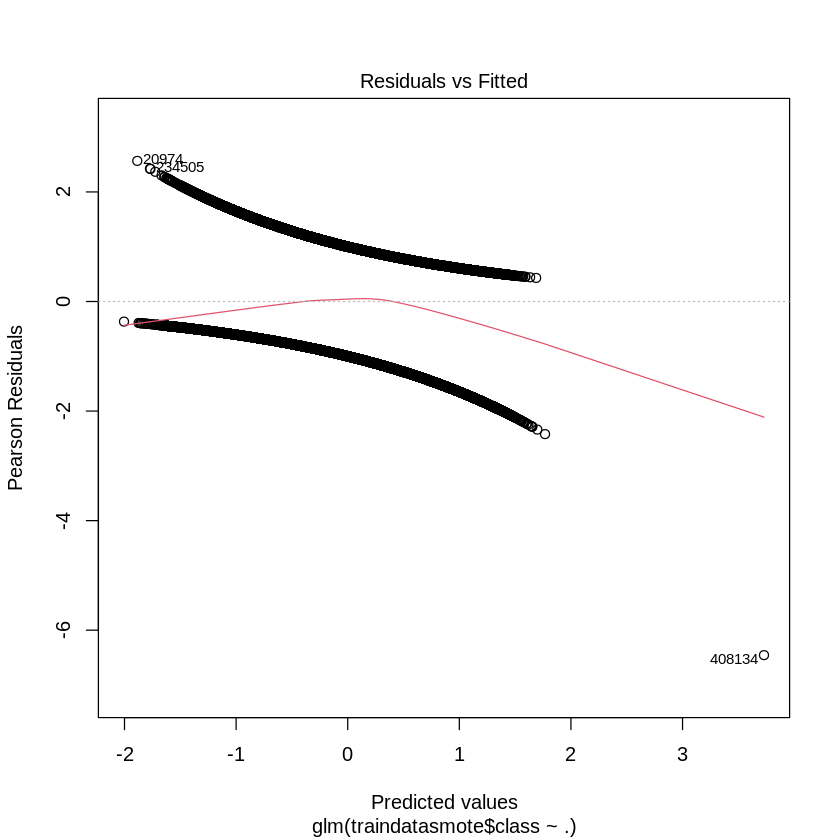

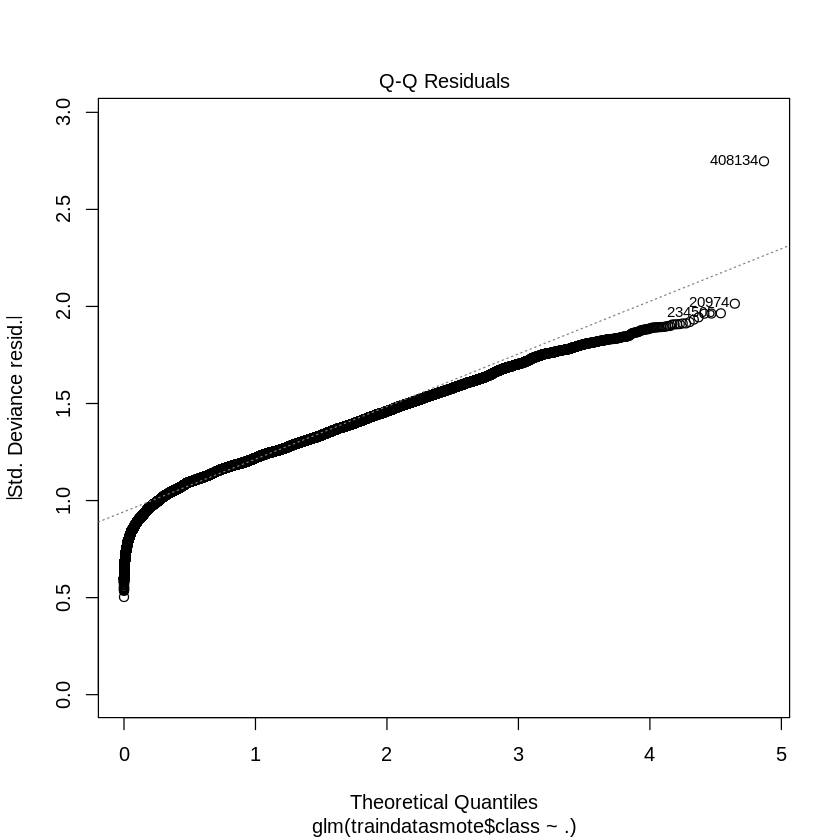

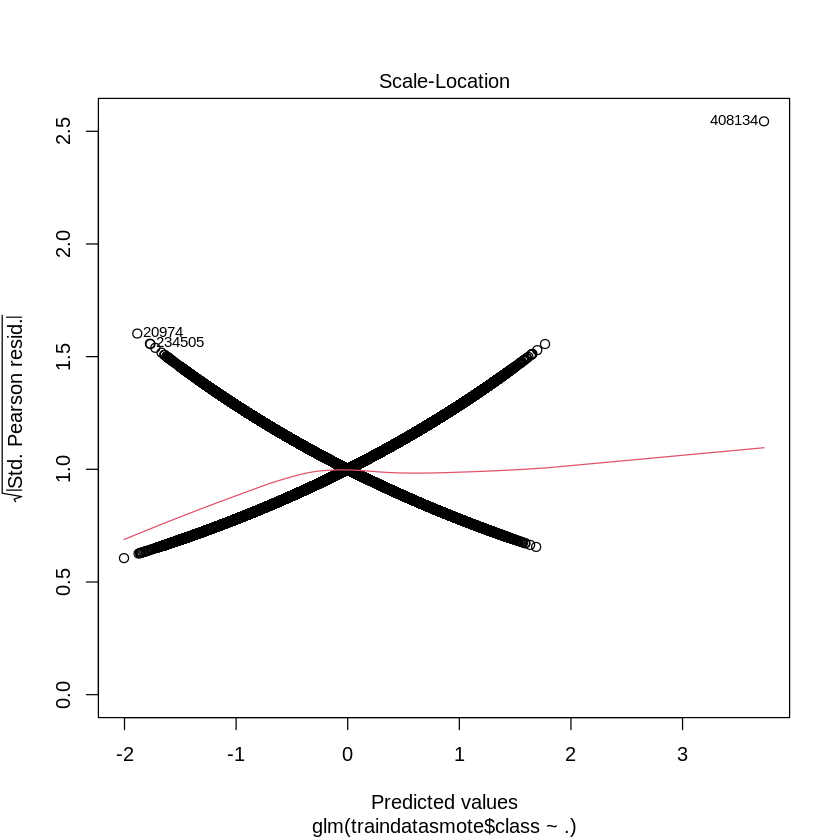

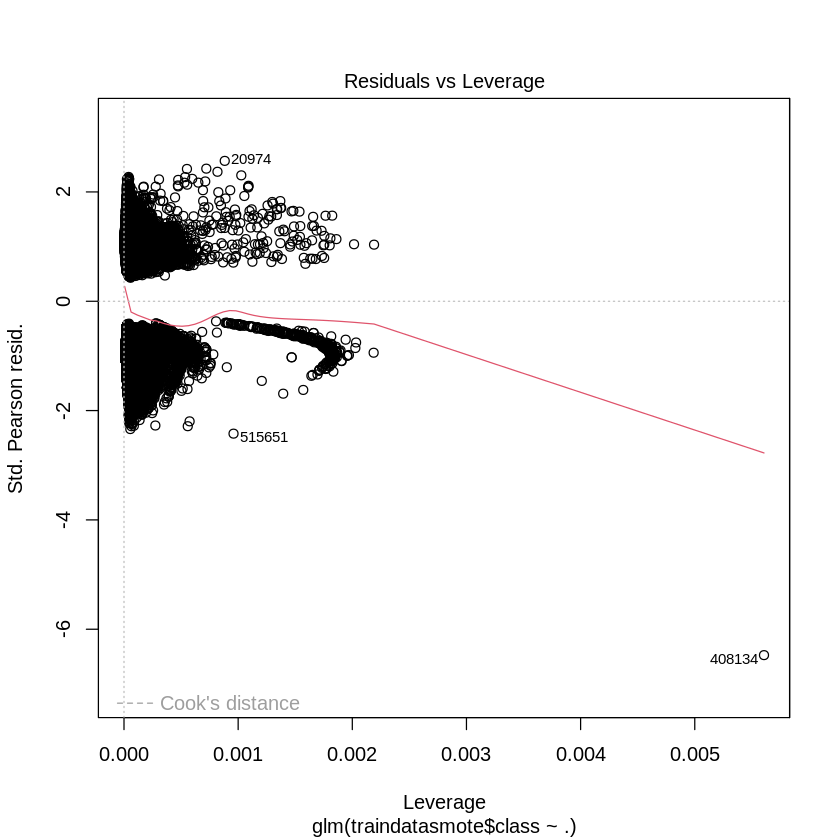

In [ ]:
plot(logistic_model_smote)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 1, case = 2

Setting direction: controls < cases



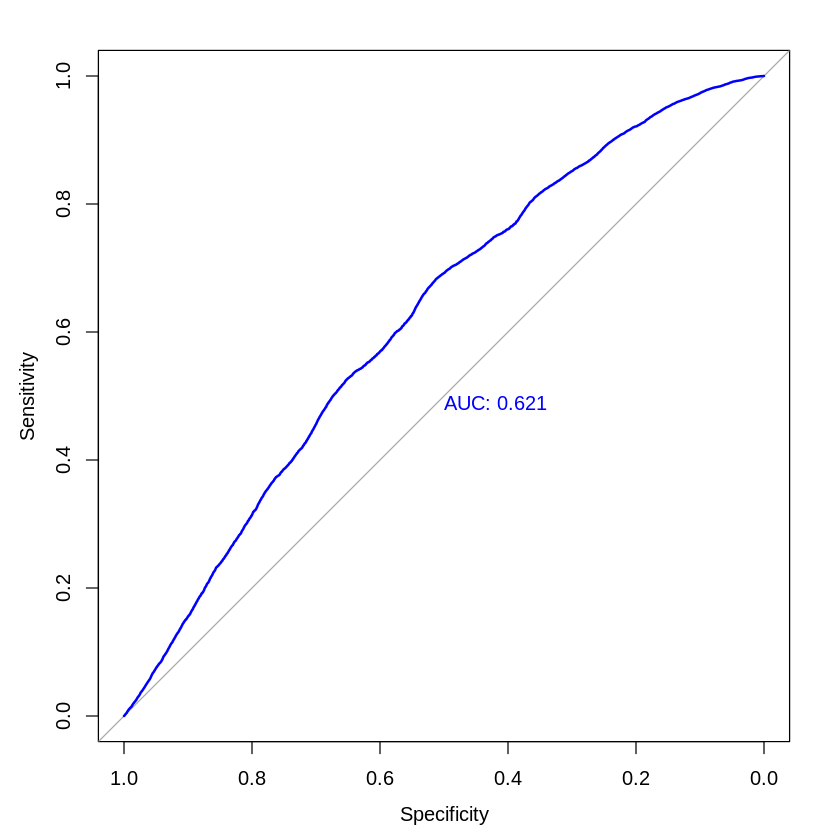

In [ ]:
library(pROC)
lr.predict = predict(logistic_model_smote,testdatasmote, probability = TRUE)
auc.gbm = roc(testdatasmote$class, lr.predict, plot = TRUE, col = "blue", print.auc = TRUE)

In [ ]:
prob=predict(logistic_model_smote,testdatasmote,type='response')
ans=ifelse(prob>0.5,'2','1')
confusionMatrix(as.factor(ans),testdatasmote$class)

Confusion Matrix and Statistics

          Reference
Prediction     1     2
         1 33813 23524
         2 22465 30973
                                          
               Accuracy : 0.5848          
                 95% CI : (0.5819, 0.5877)
    No Information Rate : 0.508           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.1692          
                                          
 Mcnemar's Test P-Value : 8.075e-07       
                                          
            Sensitivity : 0.6008          
            Specificity : 0.5683          
         Pos Pred Value : 0.5897          
         Neg Pred Value : 0.5796          
             Prevalence : 0.5080          
         Detection Rate : 0.3052          
   Detection Prevalence : 0.5176          
      Balanced Accuracy : 0.5846          
                                          
       'Positive' Class : 1               
                  

In [ ]:
dt_smote = rpart(class ~ . , traindatasmote, method = 'class')

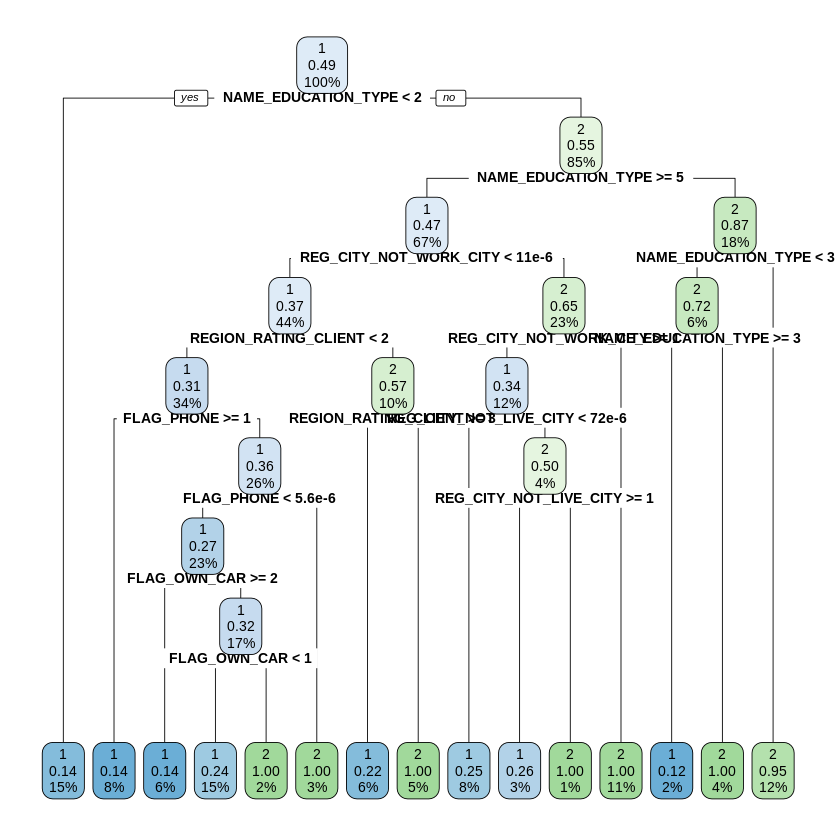

In [ ]:
rpart.plot(dt_smote, cex = .7)

In [ ]:
dt_pred = predict(dt_smote, testdatasmote, type = 'class')
confusionMatrix(dt_pred, testdatasmote$class)

Confusion Matrix and Statistics

          Reference
Prediction     1     2
         1 55589 13383
         2   689 41114
                                         
               Accuracy : 0.873          
                 95% CI : (0.871, 0.8749)
    No Information Rate : 0.508          
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7449         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9878         
            Specificity : 0.7544         
         Pos Pred Value : 0.8060         
         Neg Pred Value : 0.9835         
             Prevalence : 0.5080         
         Detection Rate : 0.5018         
   Detection Prevalence : 0.6226         
      Balanced Accuracy : 0.8711         
                                         
       'Positive' Class : 1              
                                      

Setting direction: controls < cases



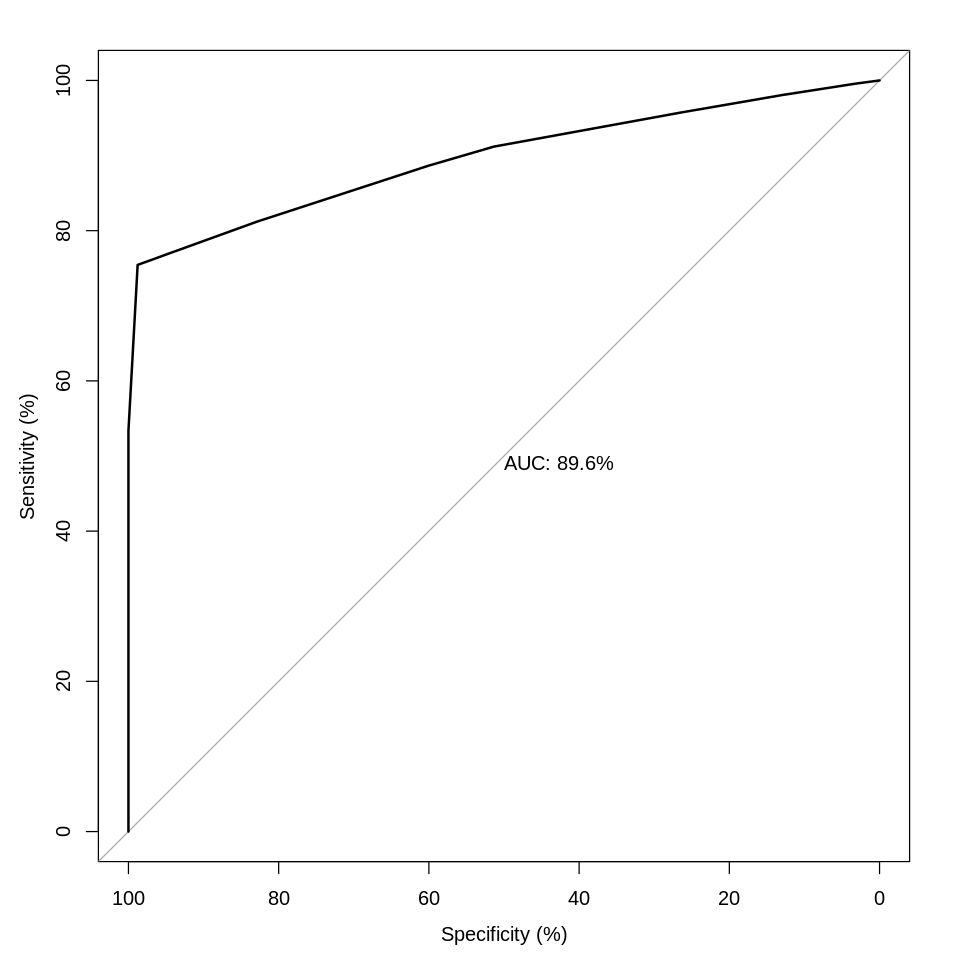

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
dt_prob = predict(dt_smote, testdatasmote,  probability = TRUE)
dt_prob <- dt_prob[,2]
r = multiclass.roc(testdatasmote$class, dt_prob, percent = TRUE)
roc <- r[['rocs']]
r1 <- roc[[1]]
plot.roc(r1, print.auc = TRUE)